In [1]:
import os
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

%load_ext lab_black

In [2]:
def histogram(array, nbins=100):
    """
    Draw histogram from distribution and identify centers.
    Parameters
    ---------
    array: `class::np.array`
            Scores distribution
    nbins: int
            Number of bins to use in the histogram
    Return
    ---------
    float
            Histogram values and bin centers.
    """
    array = array.ravel().flatten()
    hist, bin_edges = np.histogram(array, bins=nbins, range=None)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    return hist, bin_centers


def threshold_otsu(array, nbins=100):
    """
    Apply Otsu threshold on topic-region distributions [Otsu, 1979].
    Parameters
    ---------
    array: `class::np.array`
            Array containing the region values for the topic to be binarized.
    nbins: int
            Number of bins to use in the binarization histogram
    Return
    ---------
    float
            Binarization threshold.
    Reference
    ---------
    Otsu, N., 1979. A threshold selection method from gray-level histograms. IEEE transactions on systems, man, and
    cybernetics, 9(1), pp.62-66.
    """
    hist, bin_centers = histogram(array, nbins)
    hist = hist.astype(float)
    # Class probabilities for all possible thresholds
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    # Class means for all possible thresholds
    mean1 = np.cumsum(hist * bin_centers) / weight1
    mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]
    # Clip ends to align class 1 and class 2 variables:
    # The last value of ``weight1``/``mean1`` should pair with zero values in
    # ``weight2``/``mean2``, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    idx = np.argmax(variance12)
    threshold = bin_centers[:-1][idx]
    return threshold

check difference between chrm and no chrm included in the calculation of barcard

Calculate the threshols and write a tsv file with barcodes to merge:

BIO_ddseq_1.FULL
plts_scratch/BIO_ddseq_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


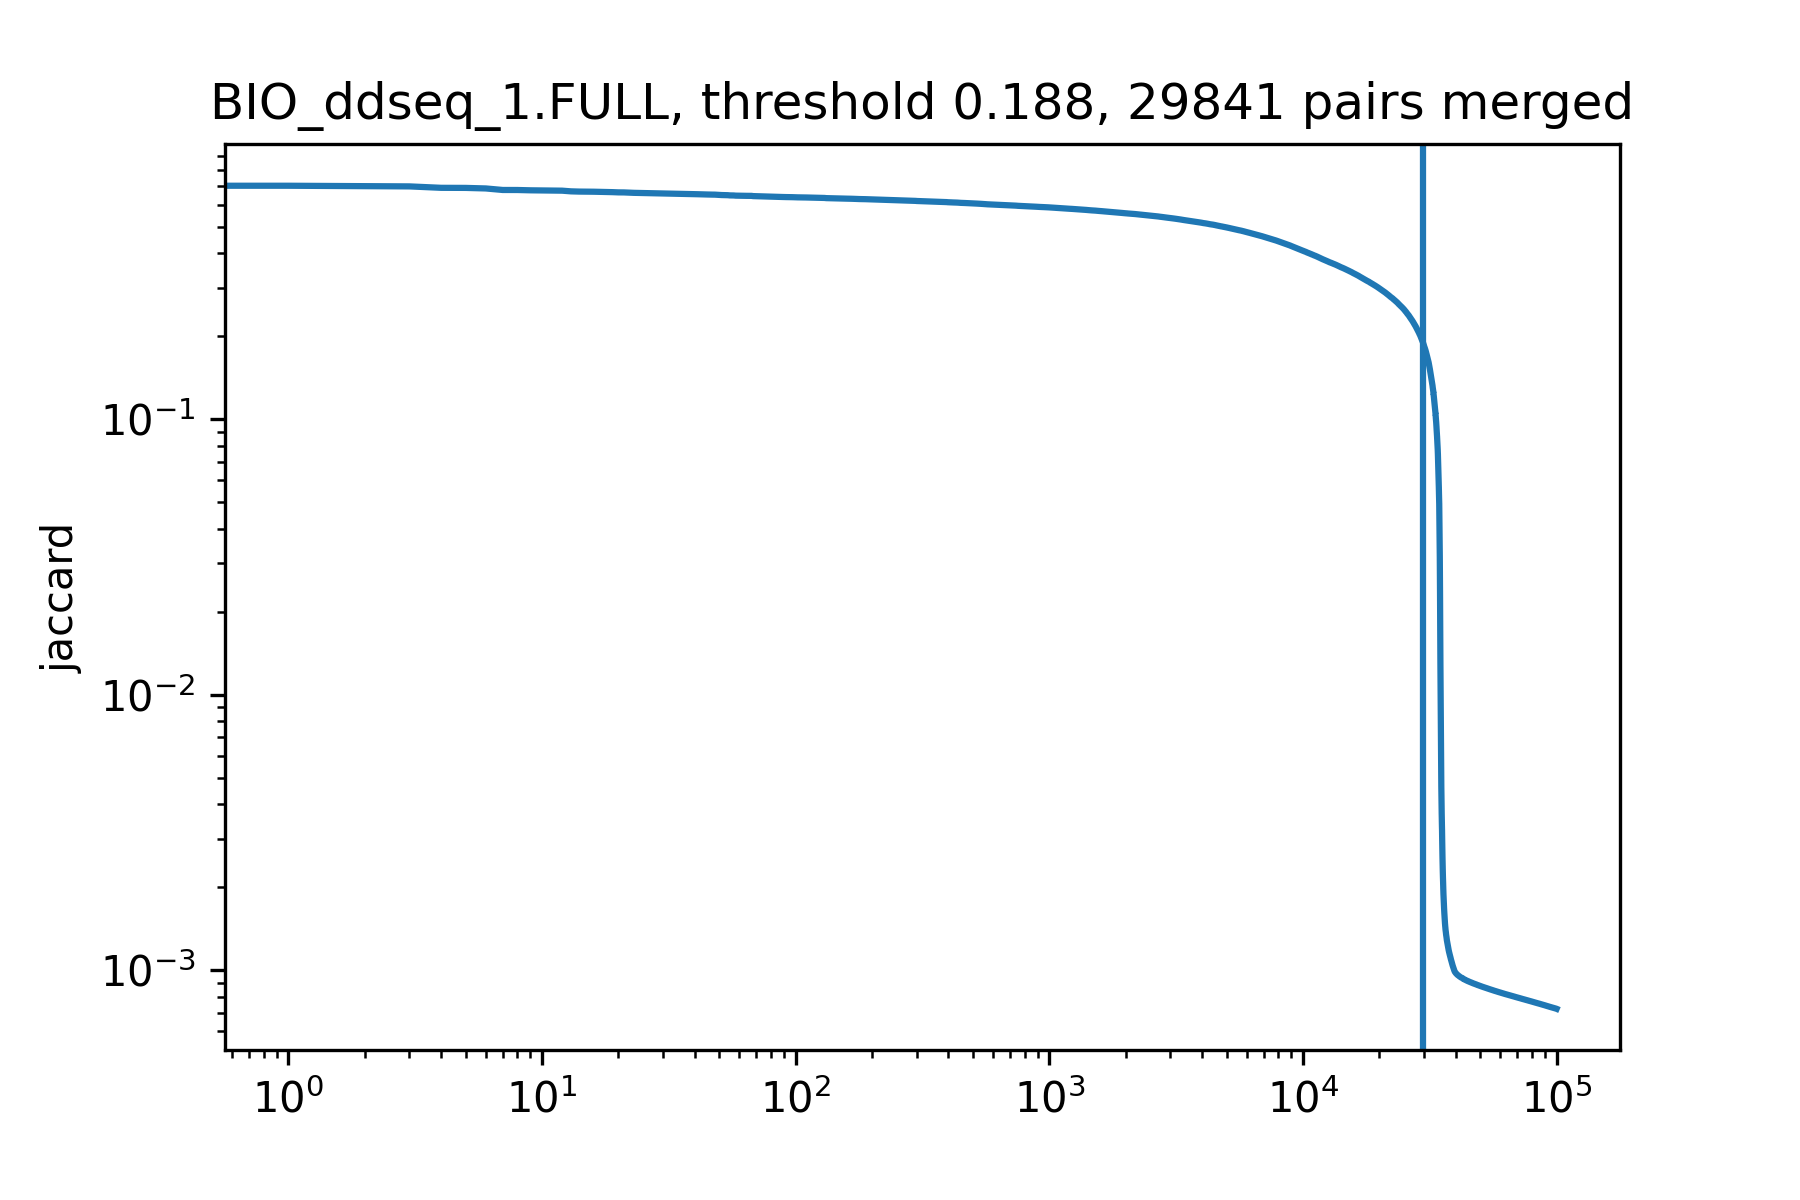

BIO_ddseq_1
plts_scratch/BIO_ddseq_1.barcard_jaccard_kneeplot.png exists, printing img and skipping


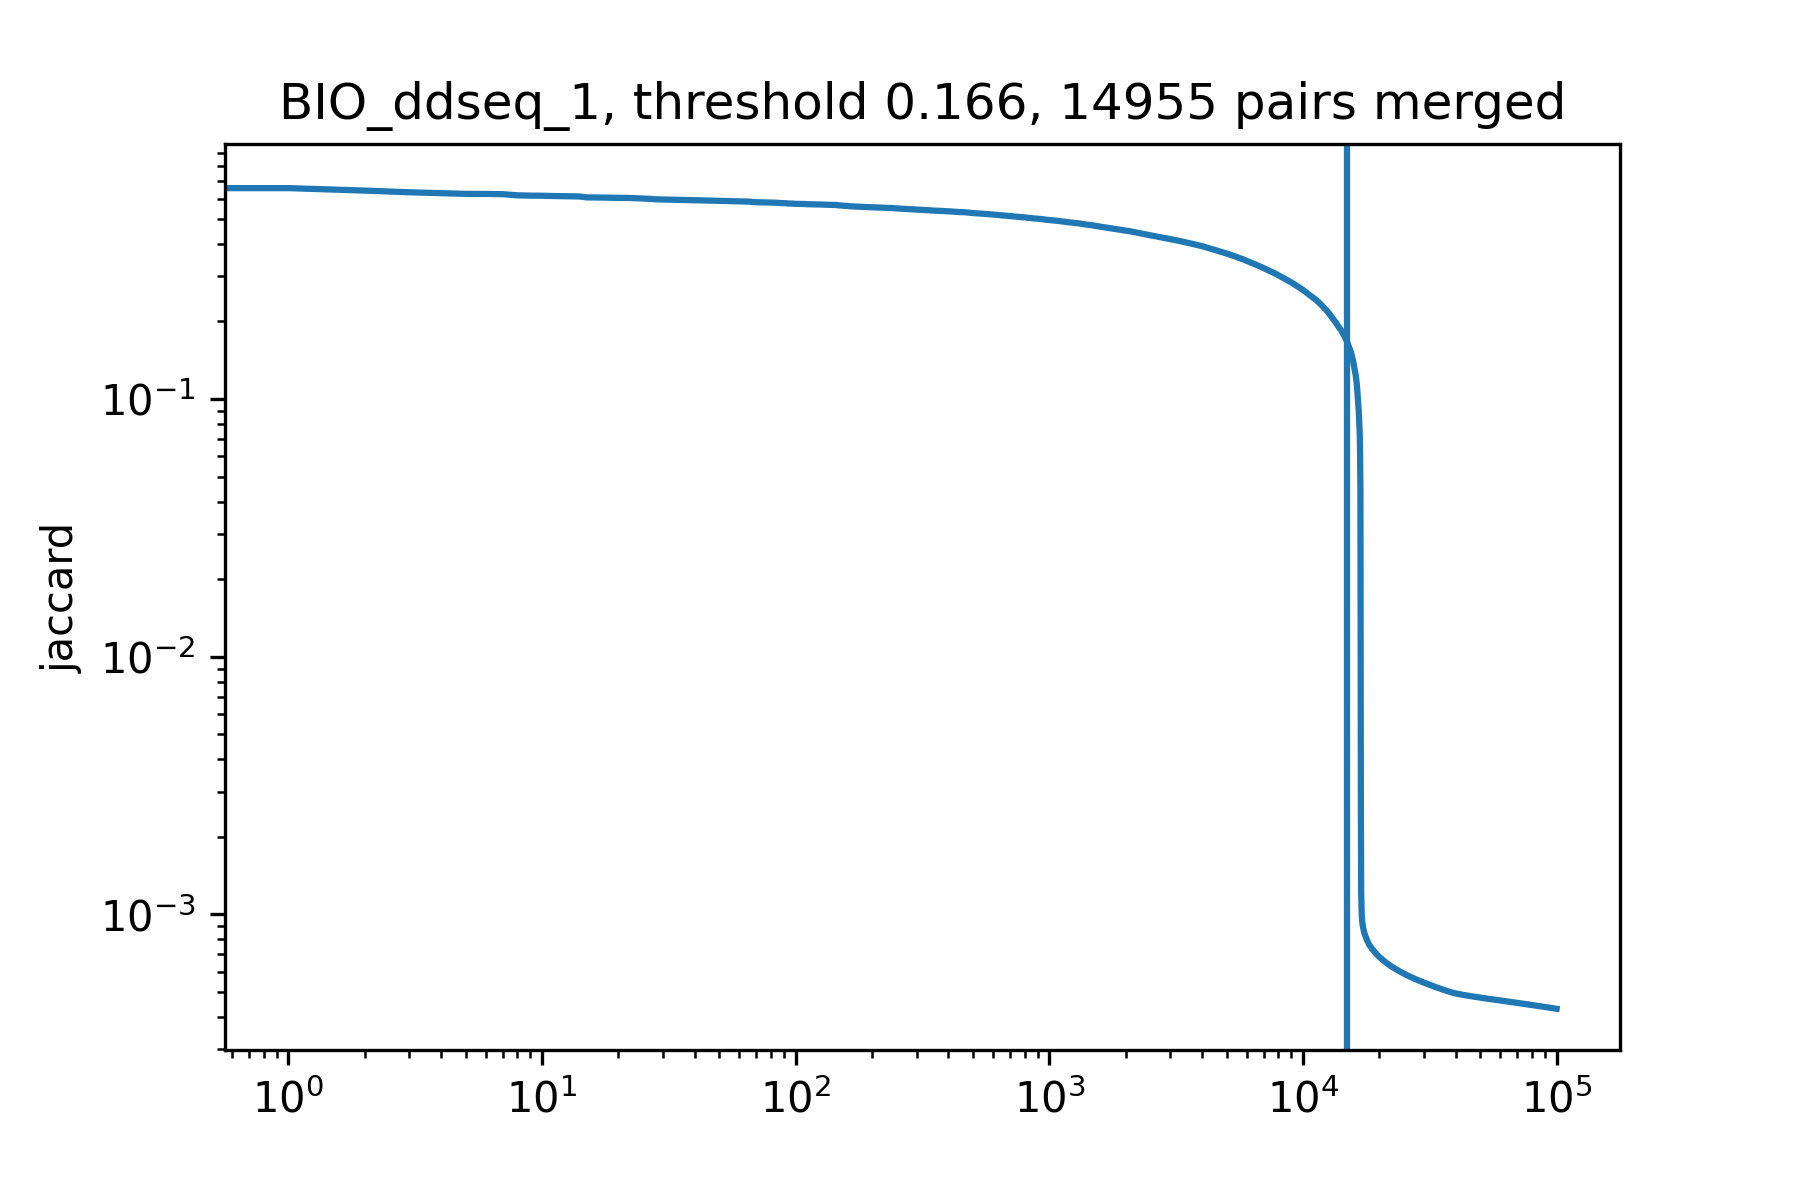

BIO_ddseq_2.FULL
plts_scratch/BIO_ddseq_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


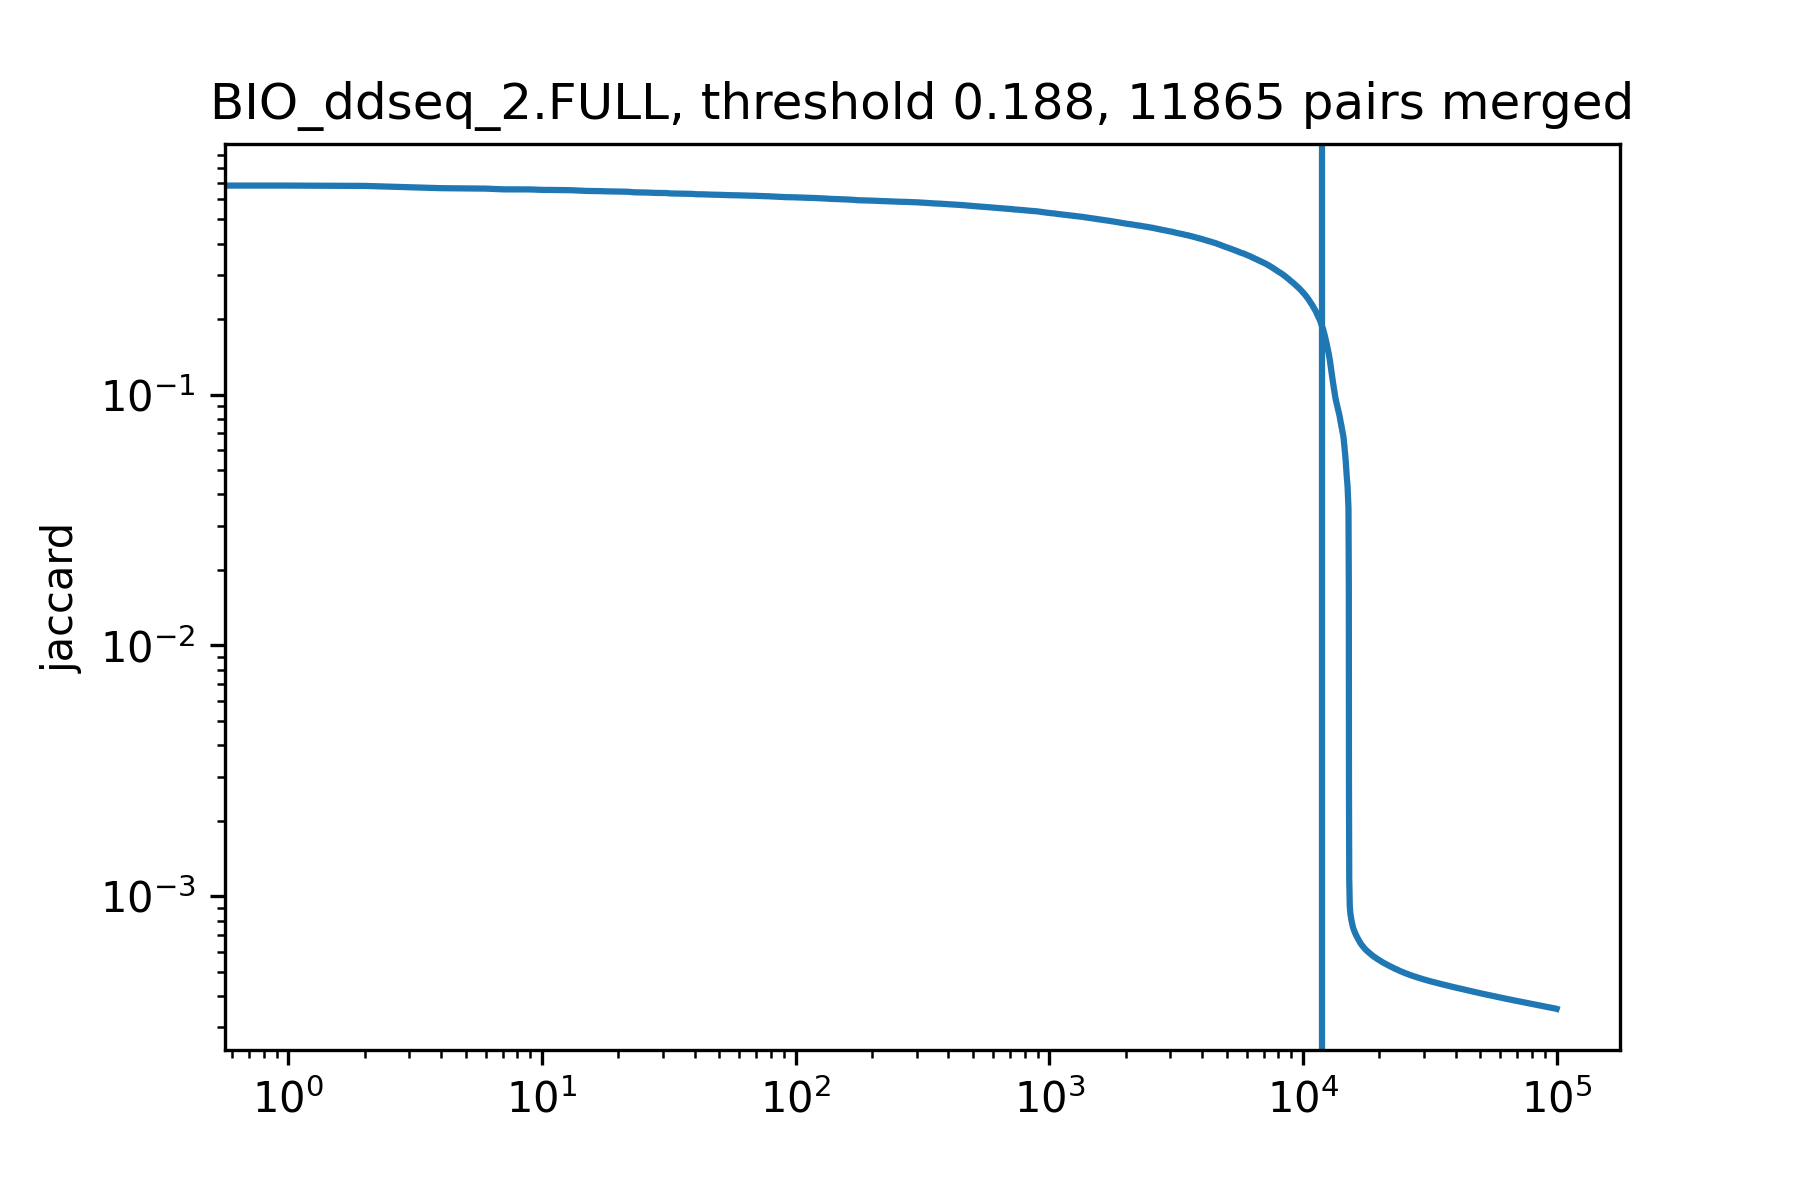

BIO_ddseq_3.FULL
plts_scratch/BIO_ddseq_3.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


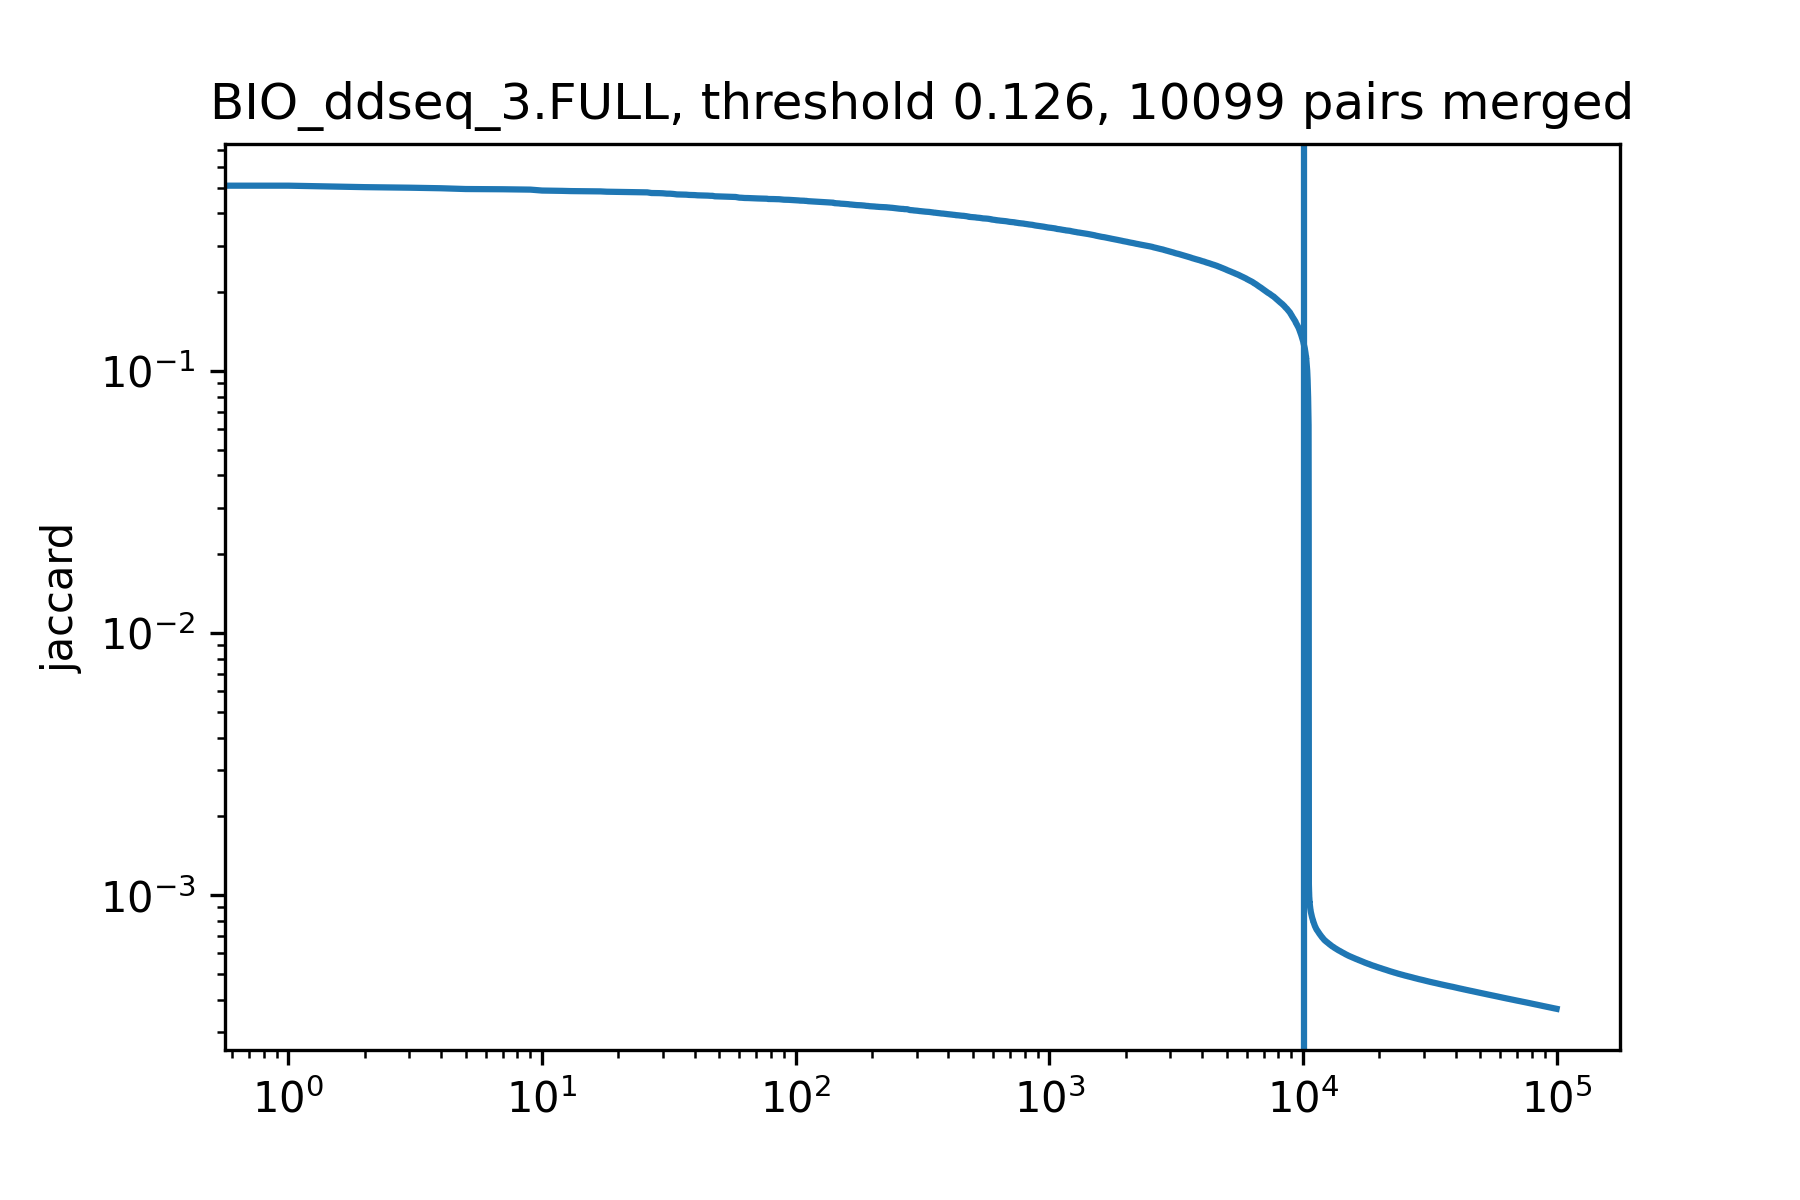

BIO_ddseq_4.FULL
plts_scratch/BIO_ddseq_4.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


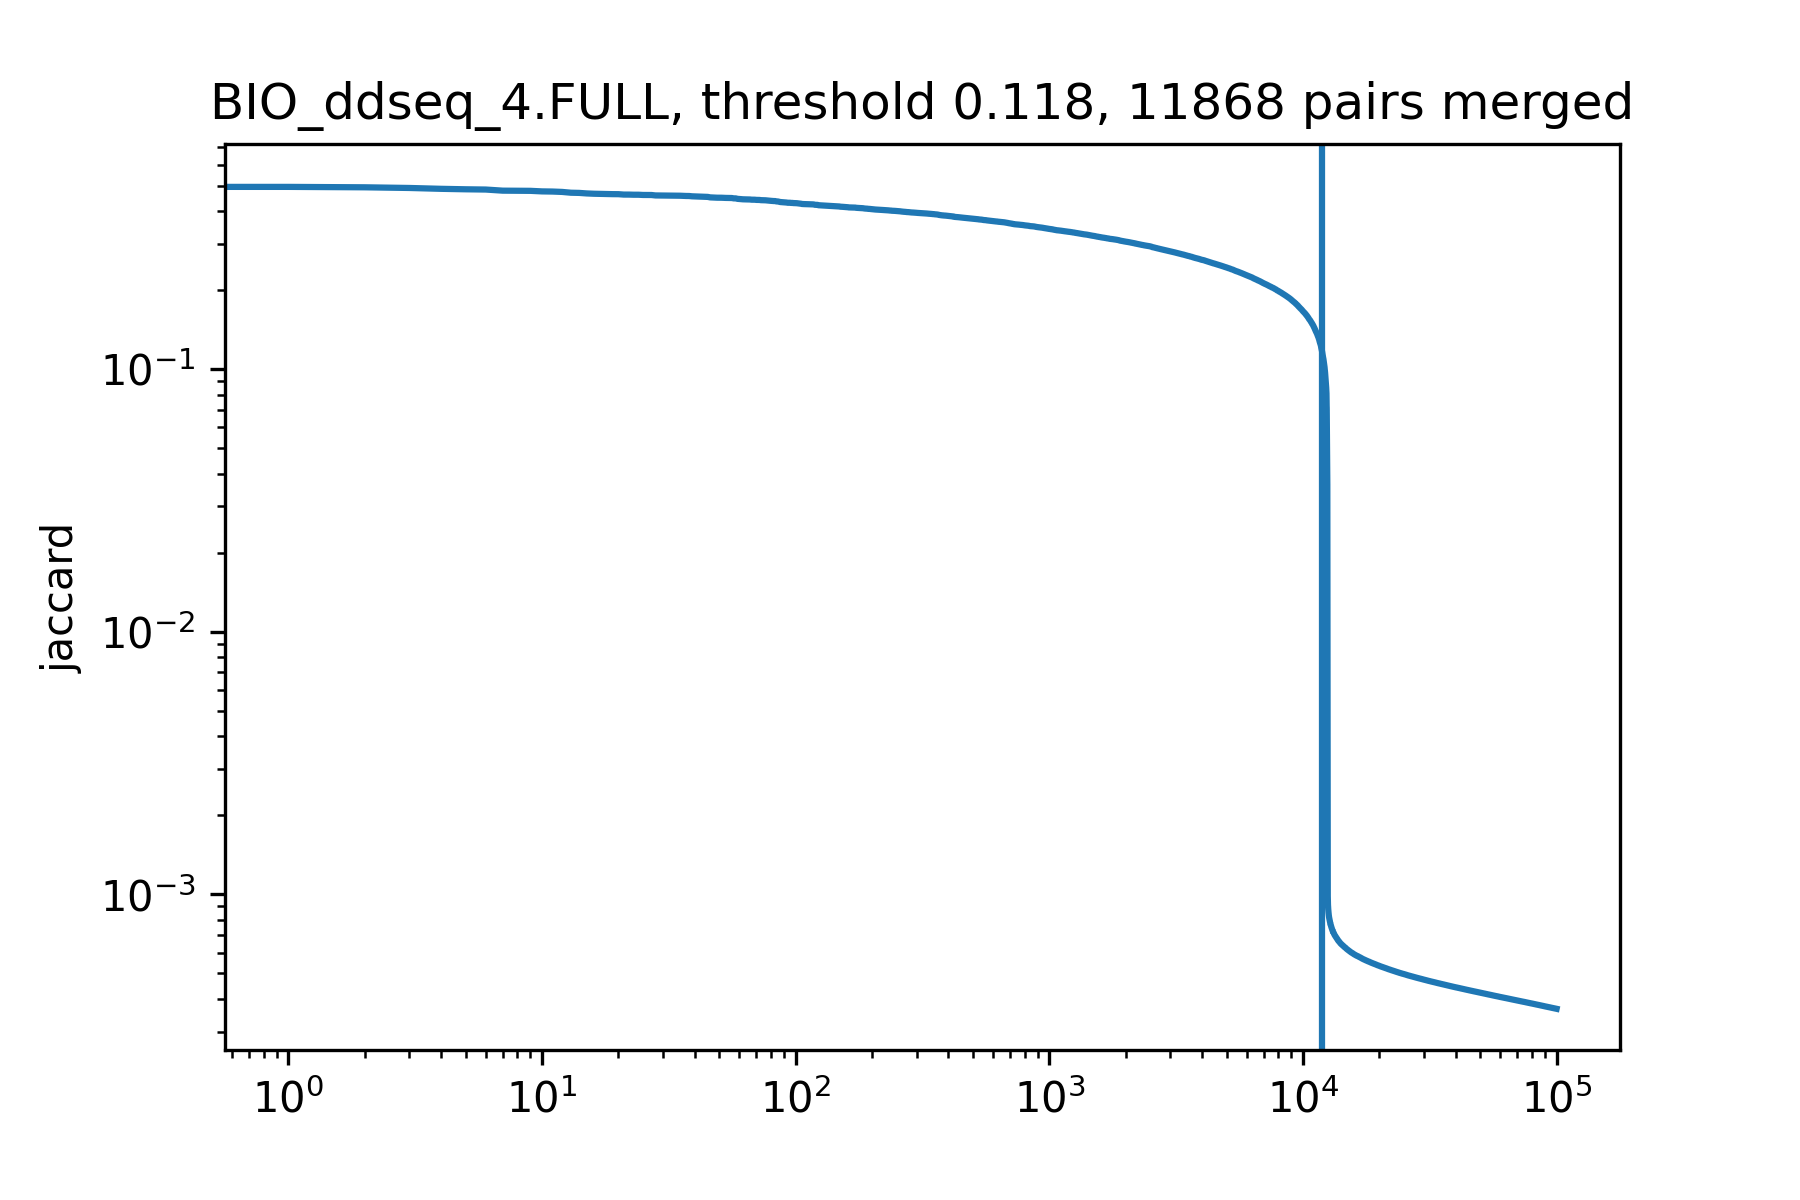

BRO_mtscatac_1.FULL
plts_scratch/BRO_mtscatac_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


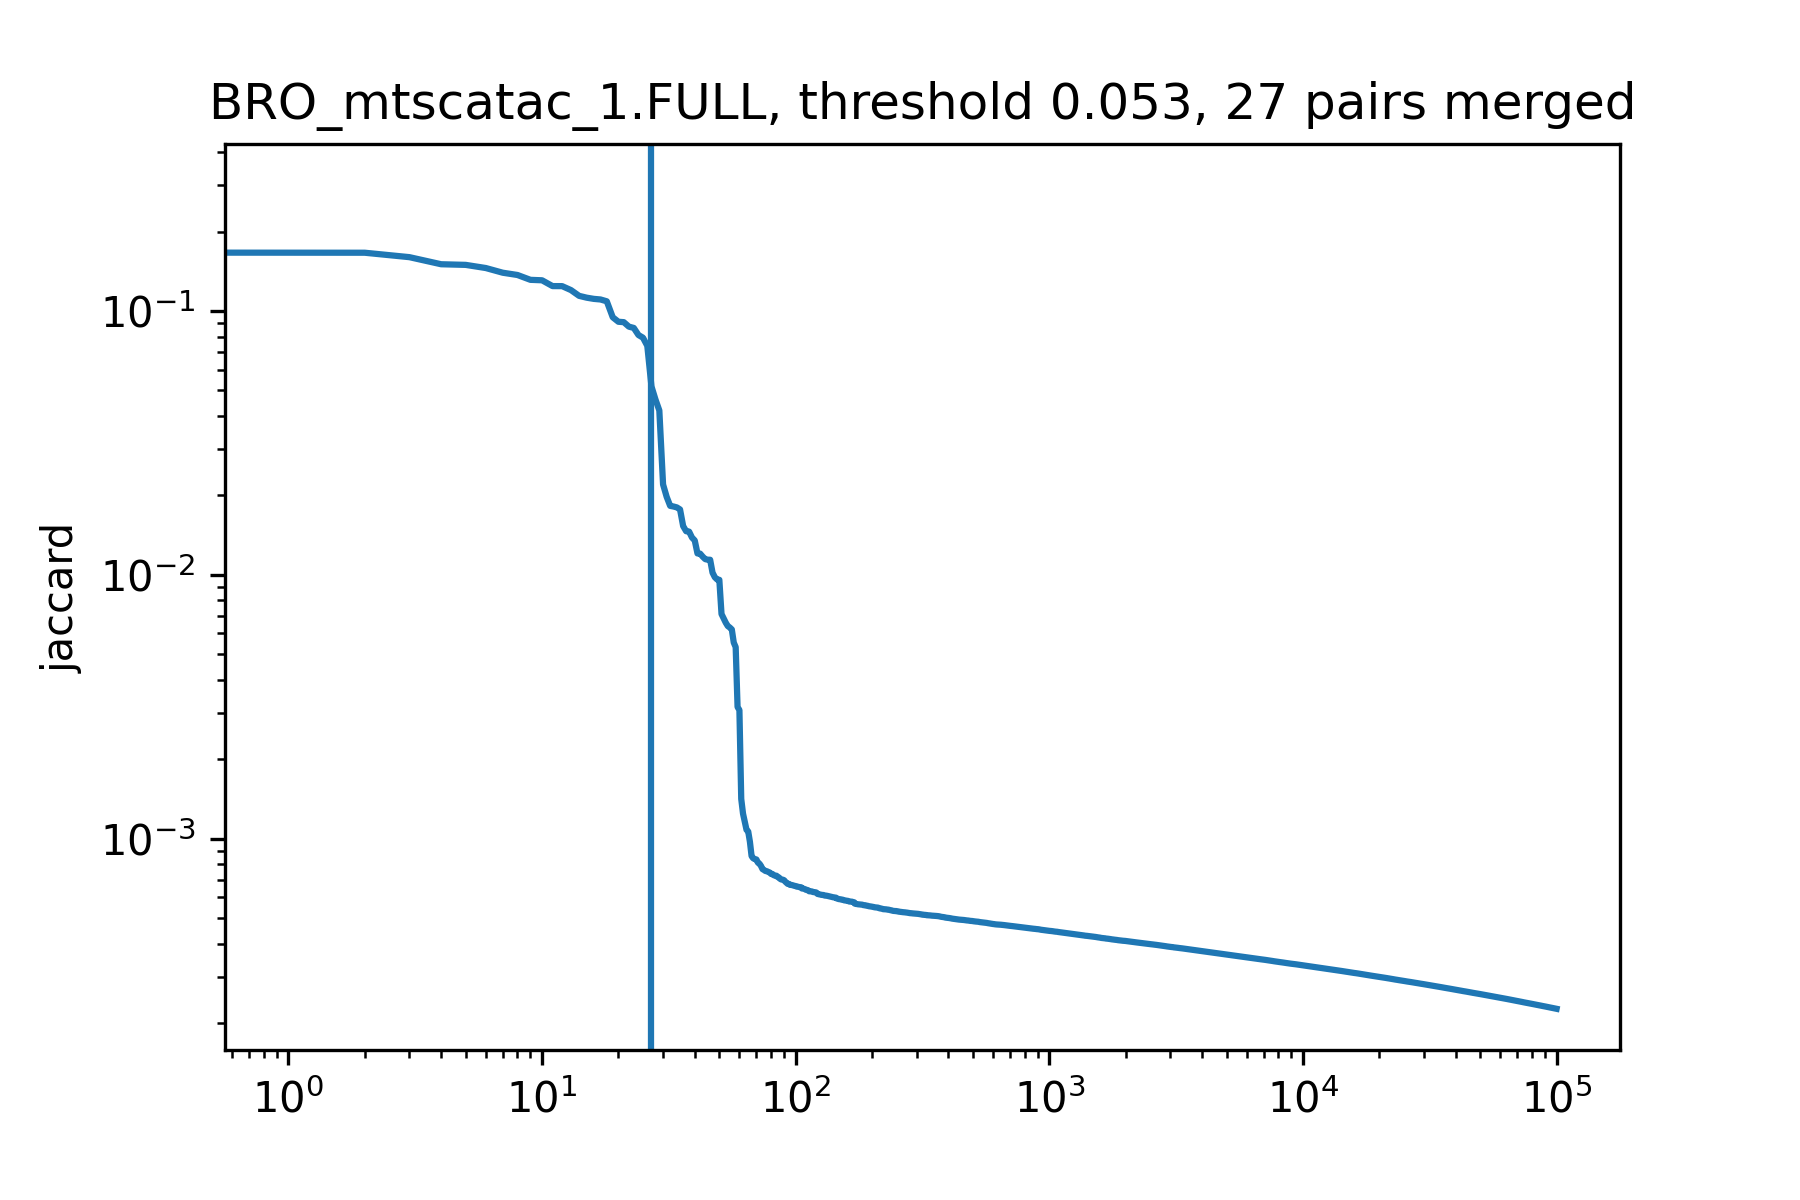

BRO_mtscatac_2.FULL
plts_scratch/BRO_mtscatac_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


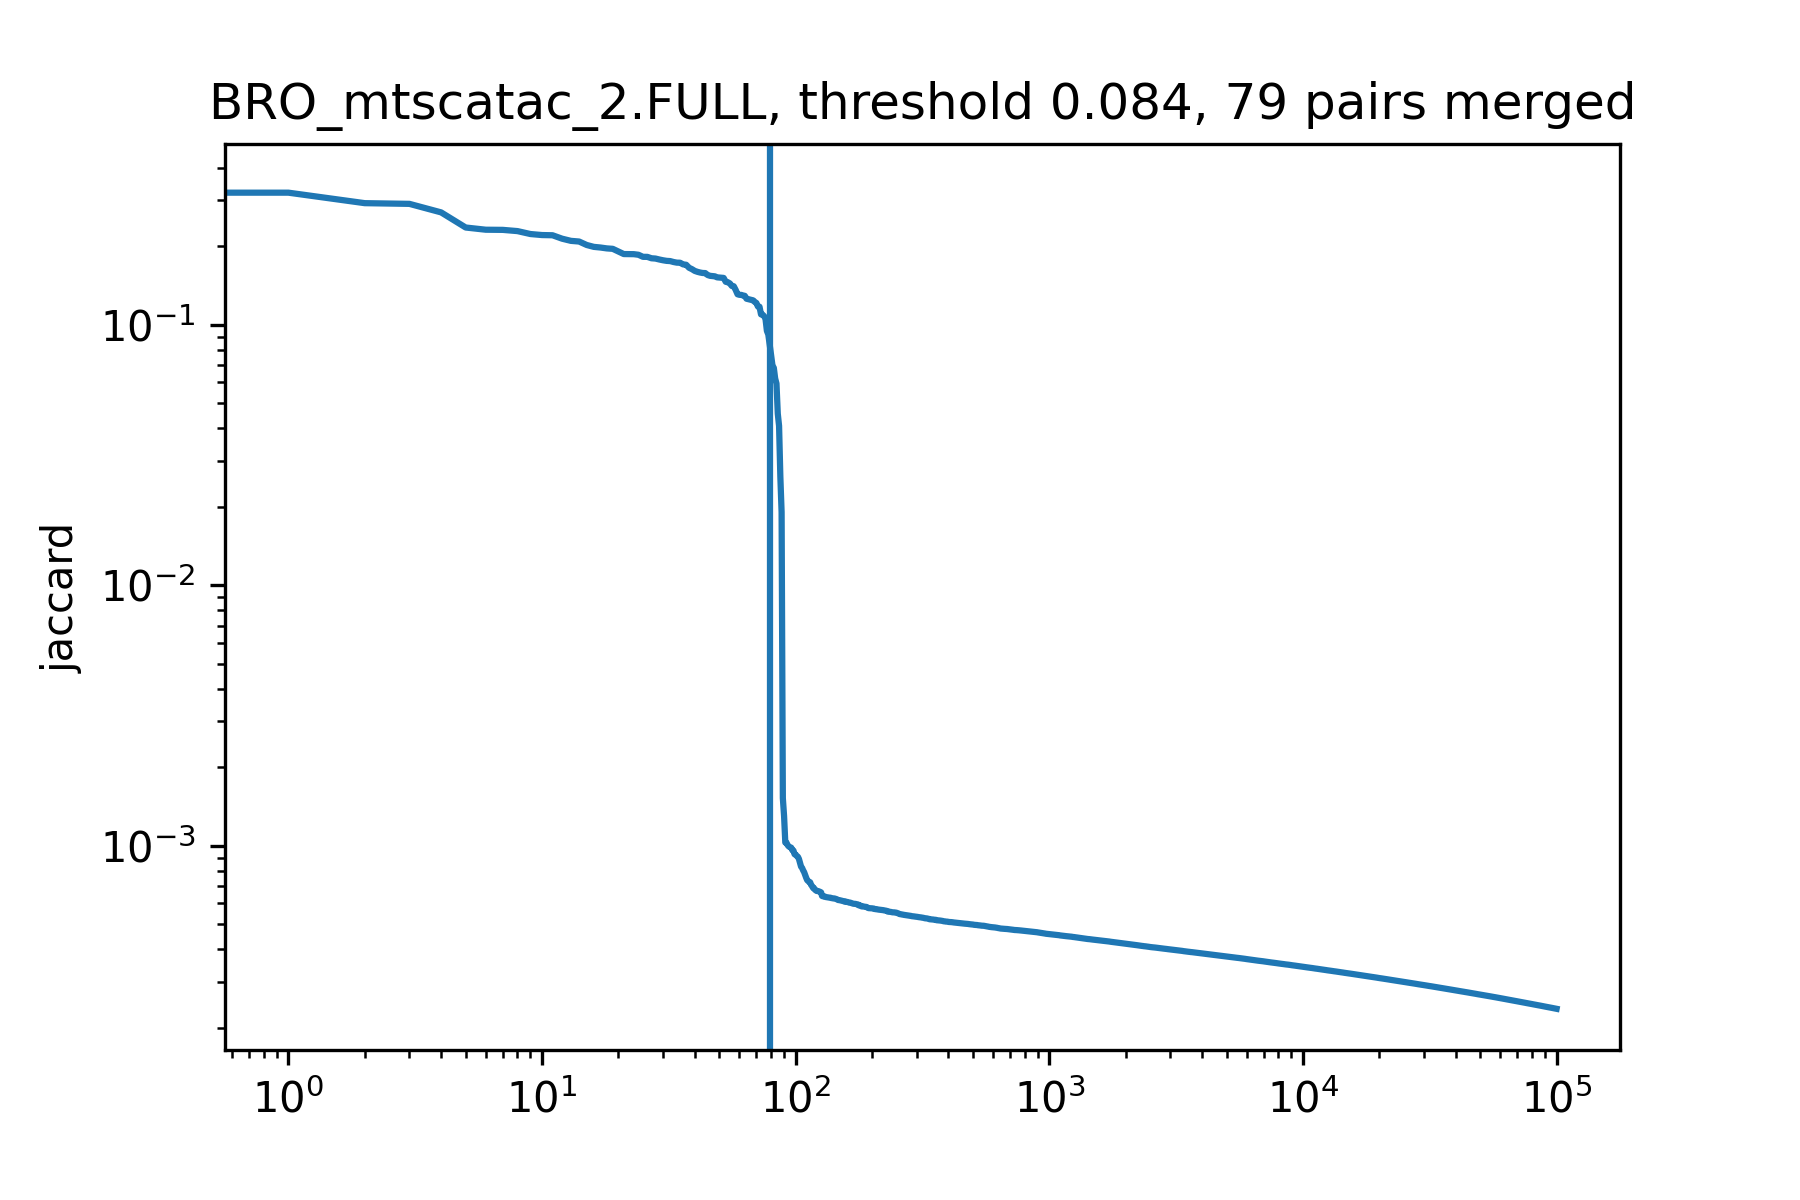

CNA_10xmultiome_1.FULL
plts_scratch/CNA_10xmultiome_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


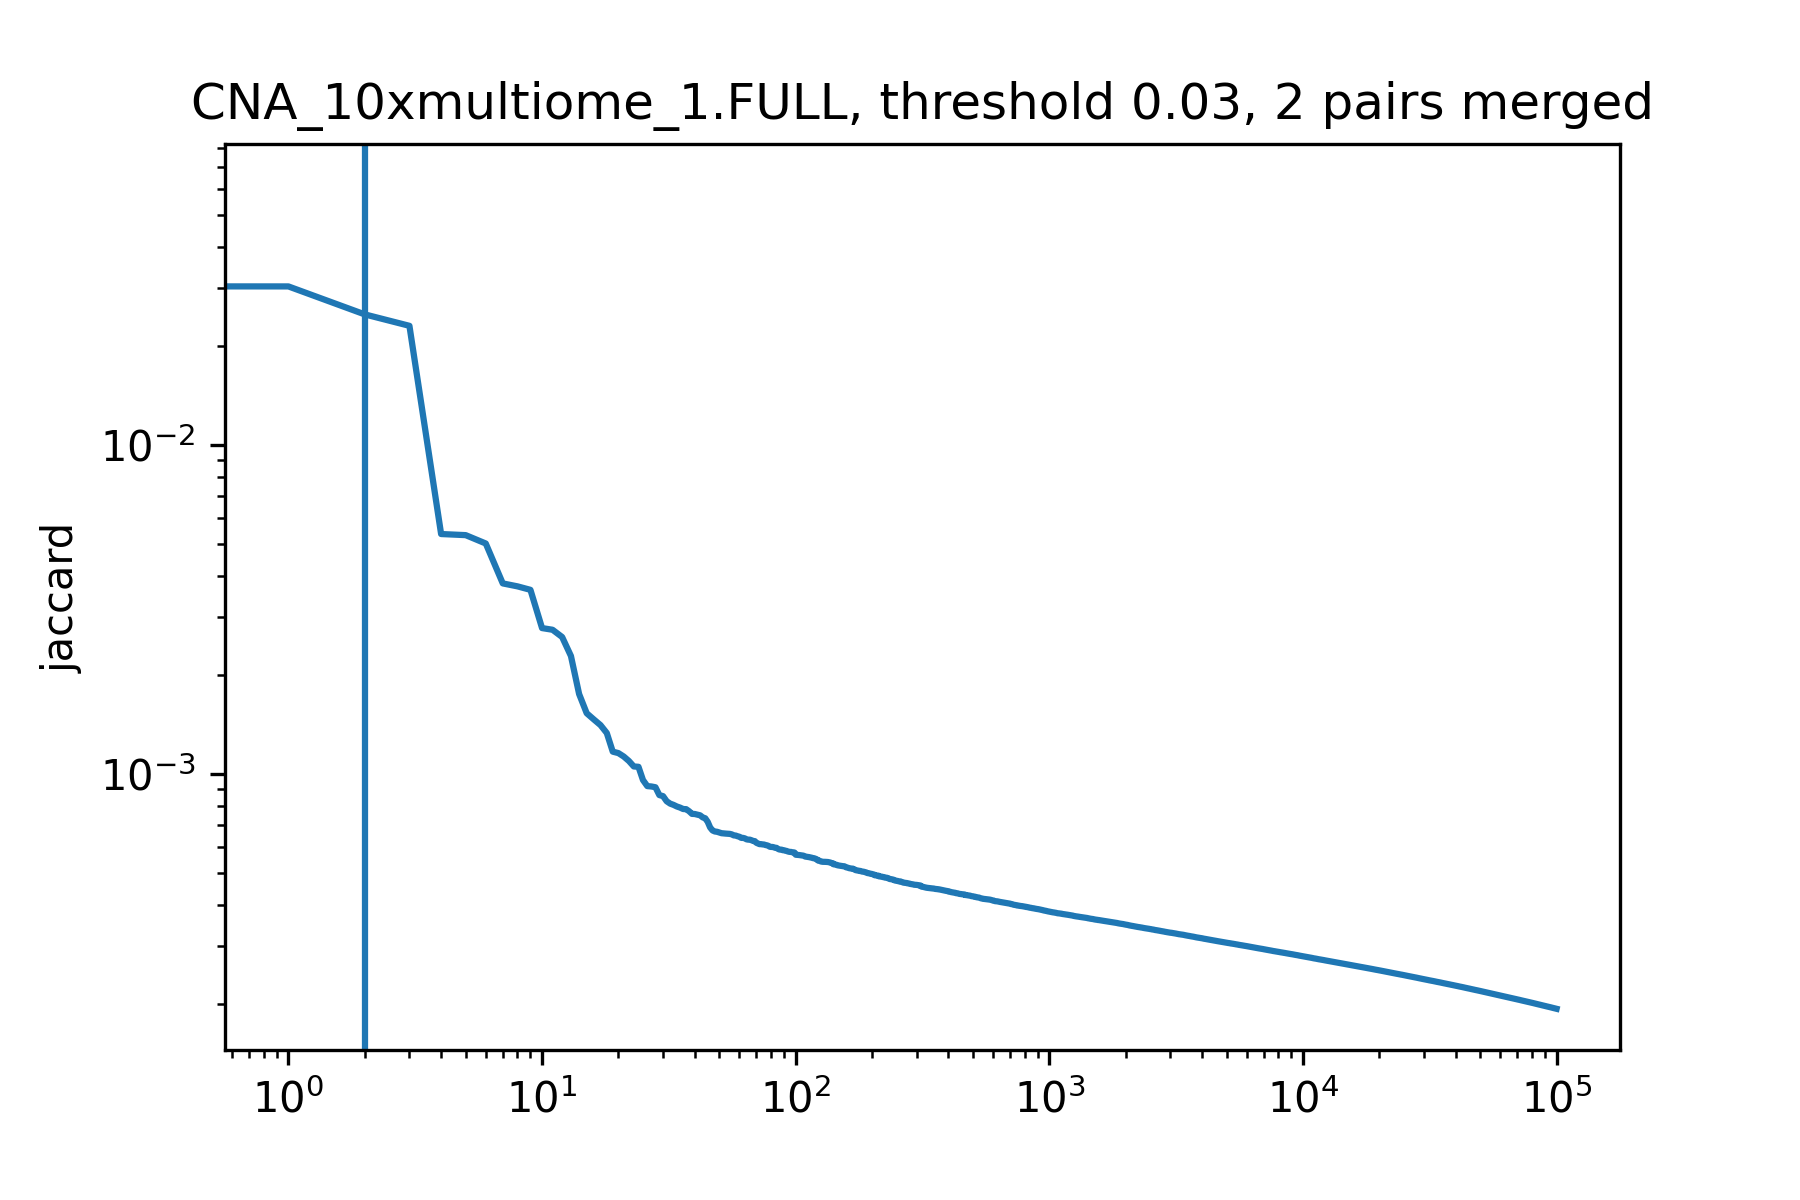

CNA_10xmultiome_2.FULL
plts_scratch/CNA_10xmultiome_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


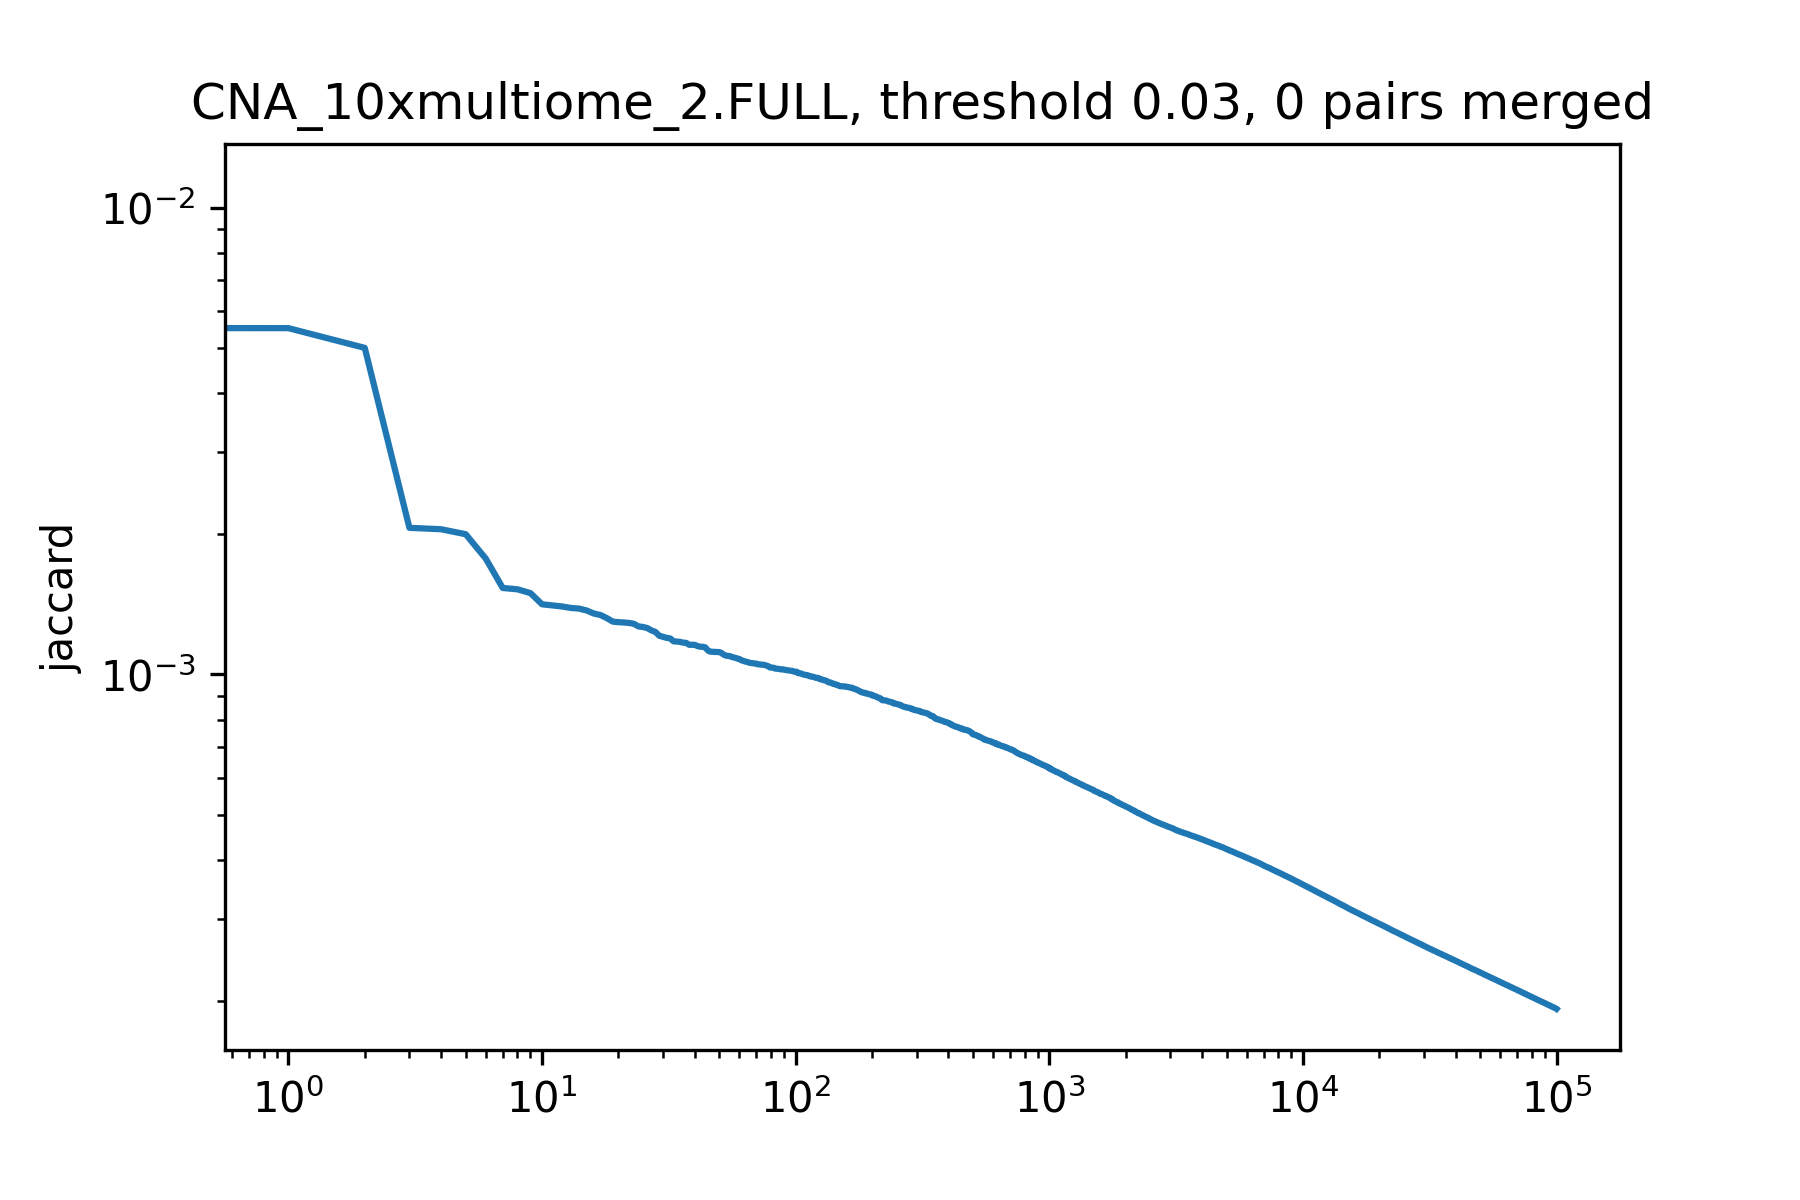

CNA_10xv11_1.FULL
plts_scratch/CNA_10xv11_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


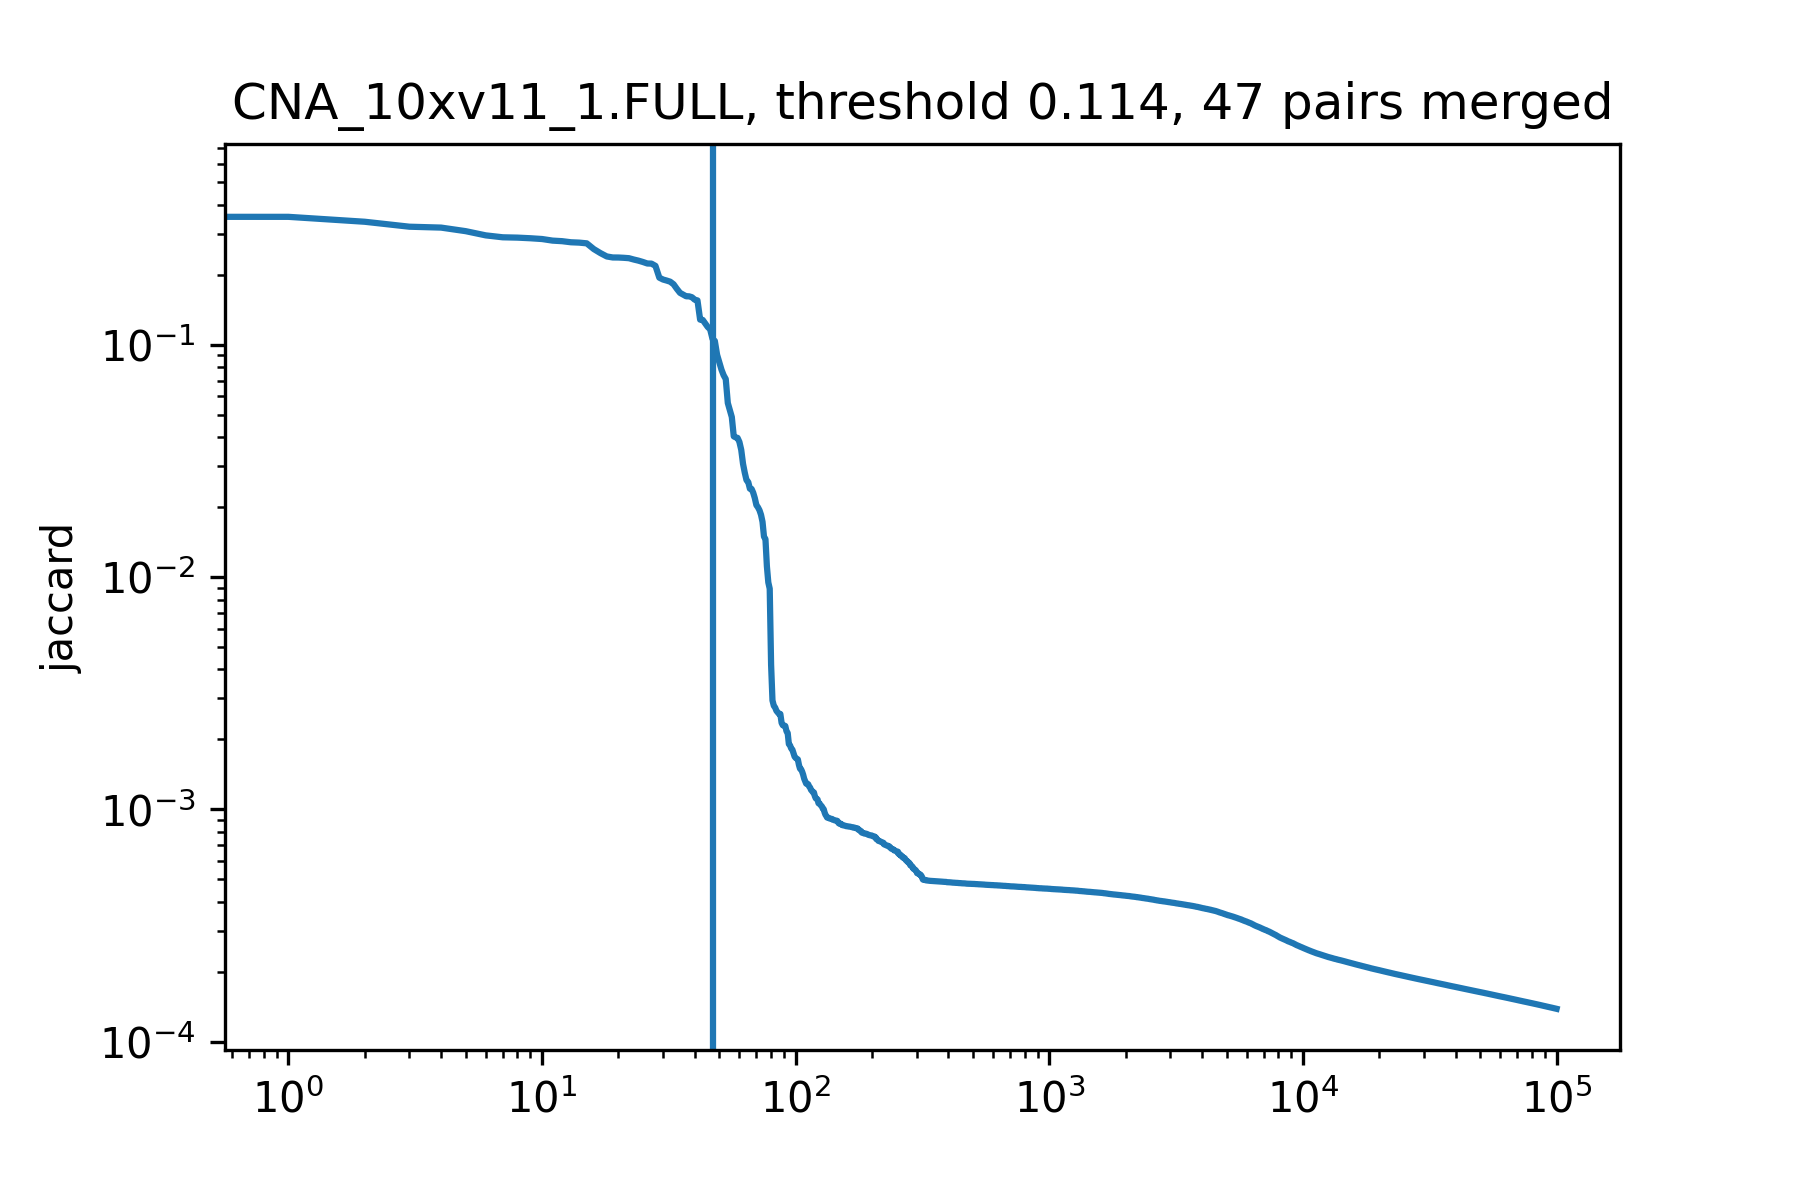

CNA_10xv11_2.FULL
plts_scratch/CNA_10xv11_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


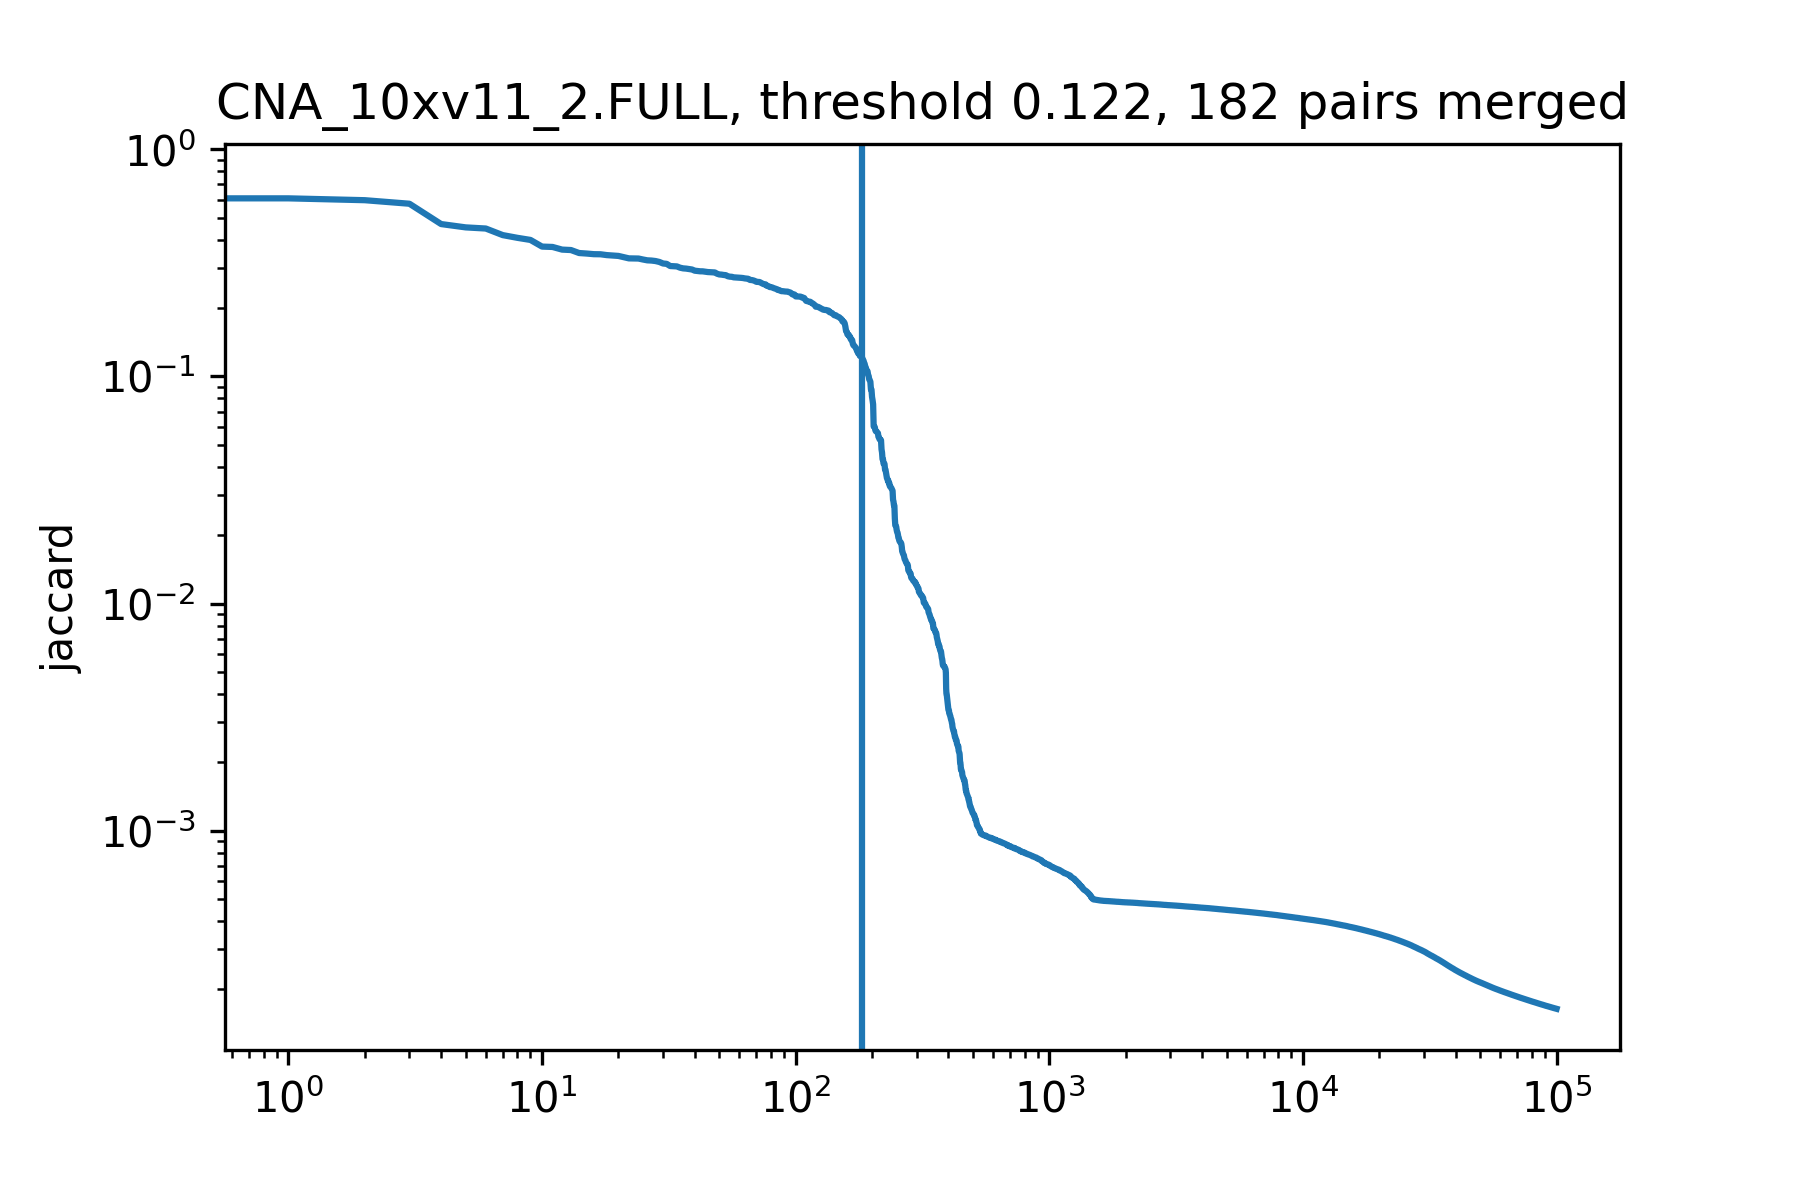

CNA_10xv11_3.FULL
plts_scratch/CNA_10xv11_3.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


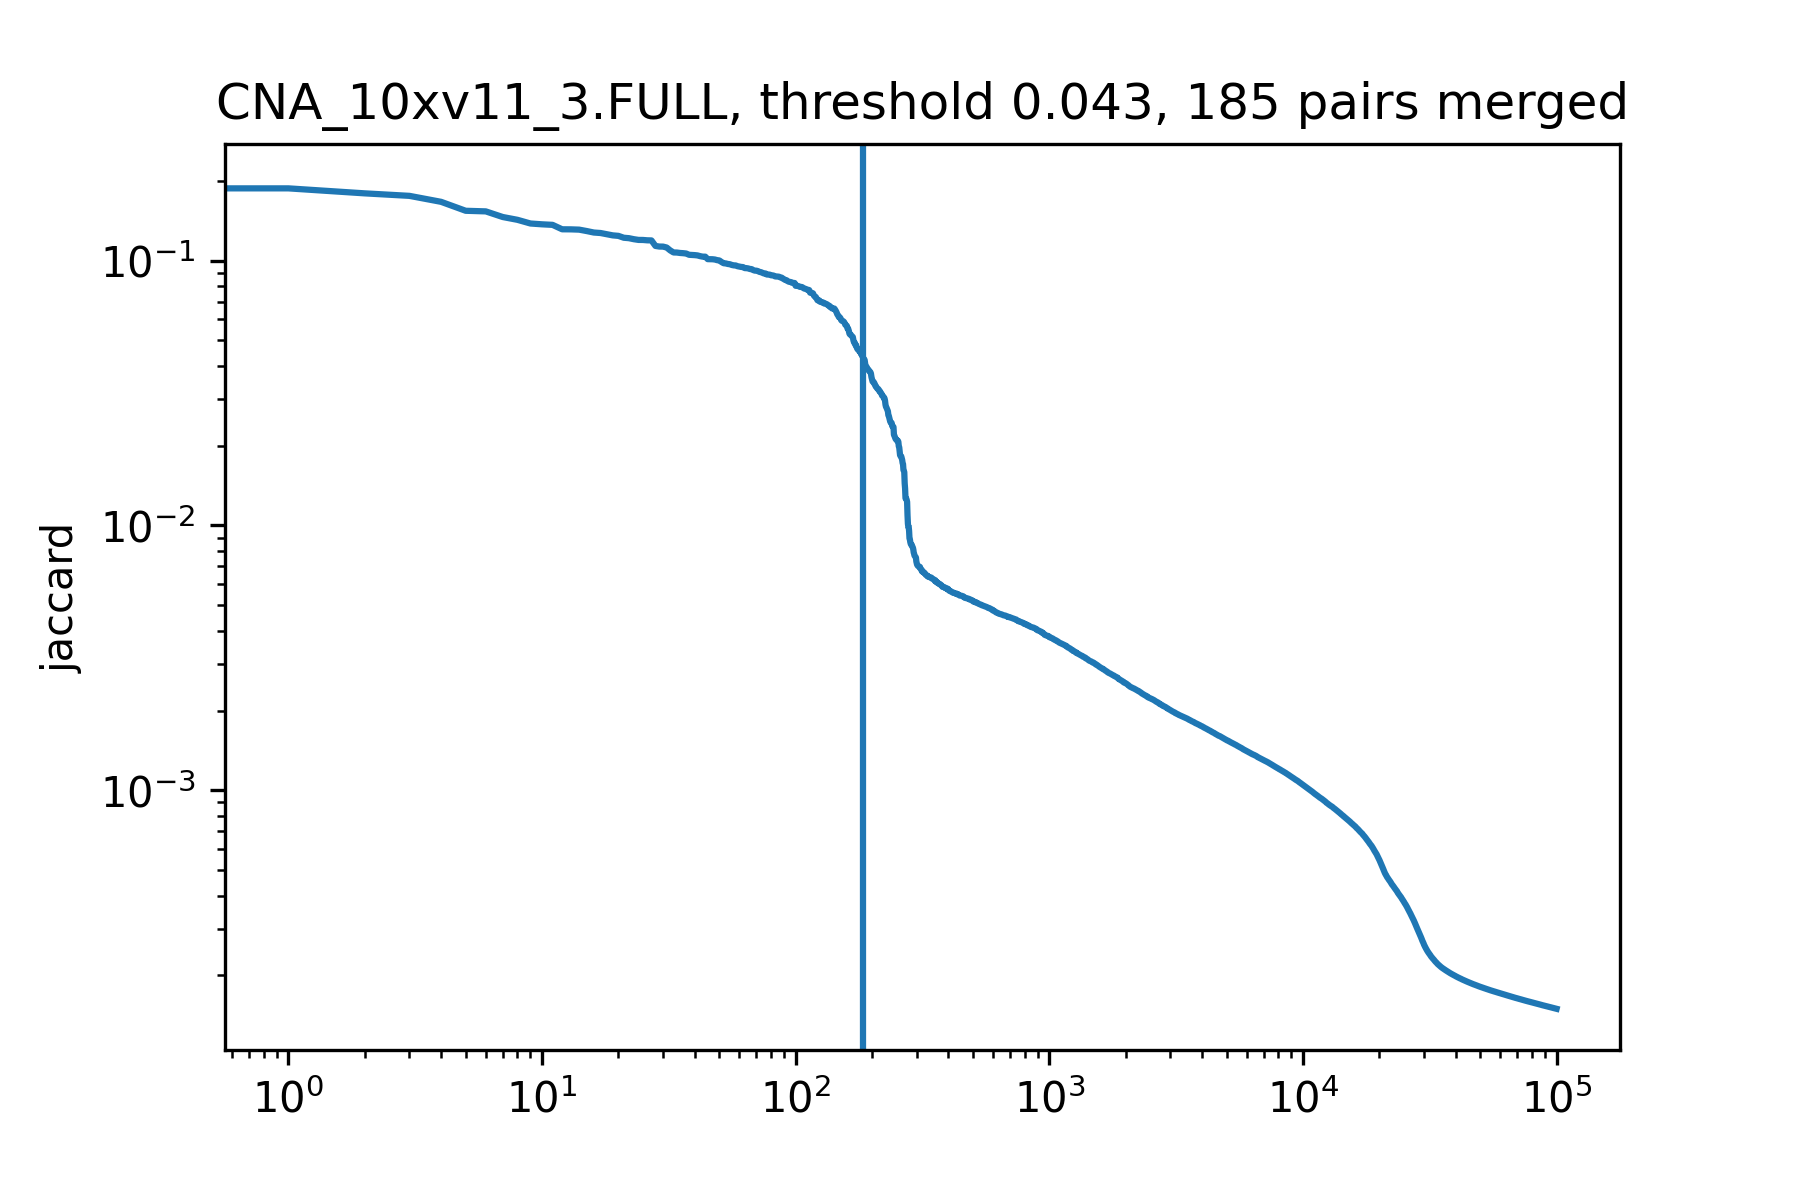

CNA_10xv11_4.FULL
plts_scratch/CNA_10xv11_4.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


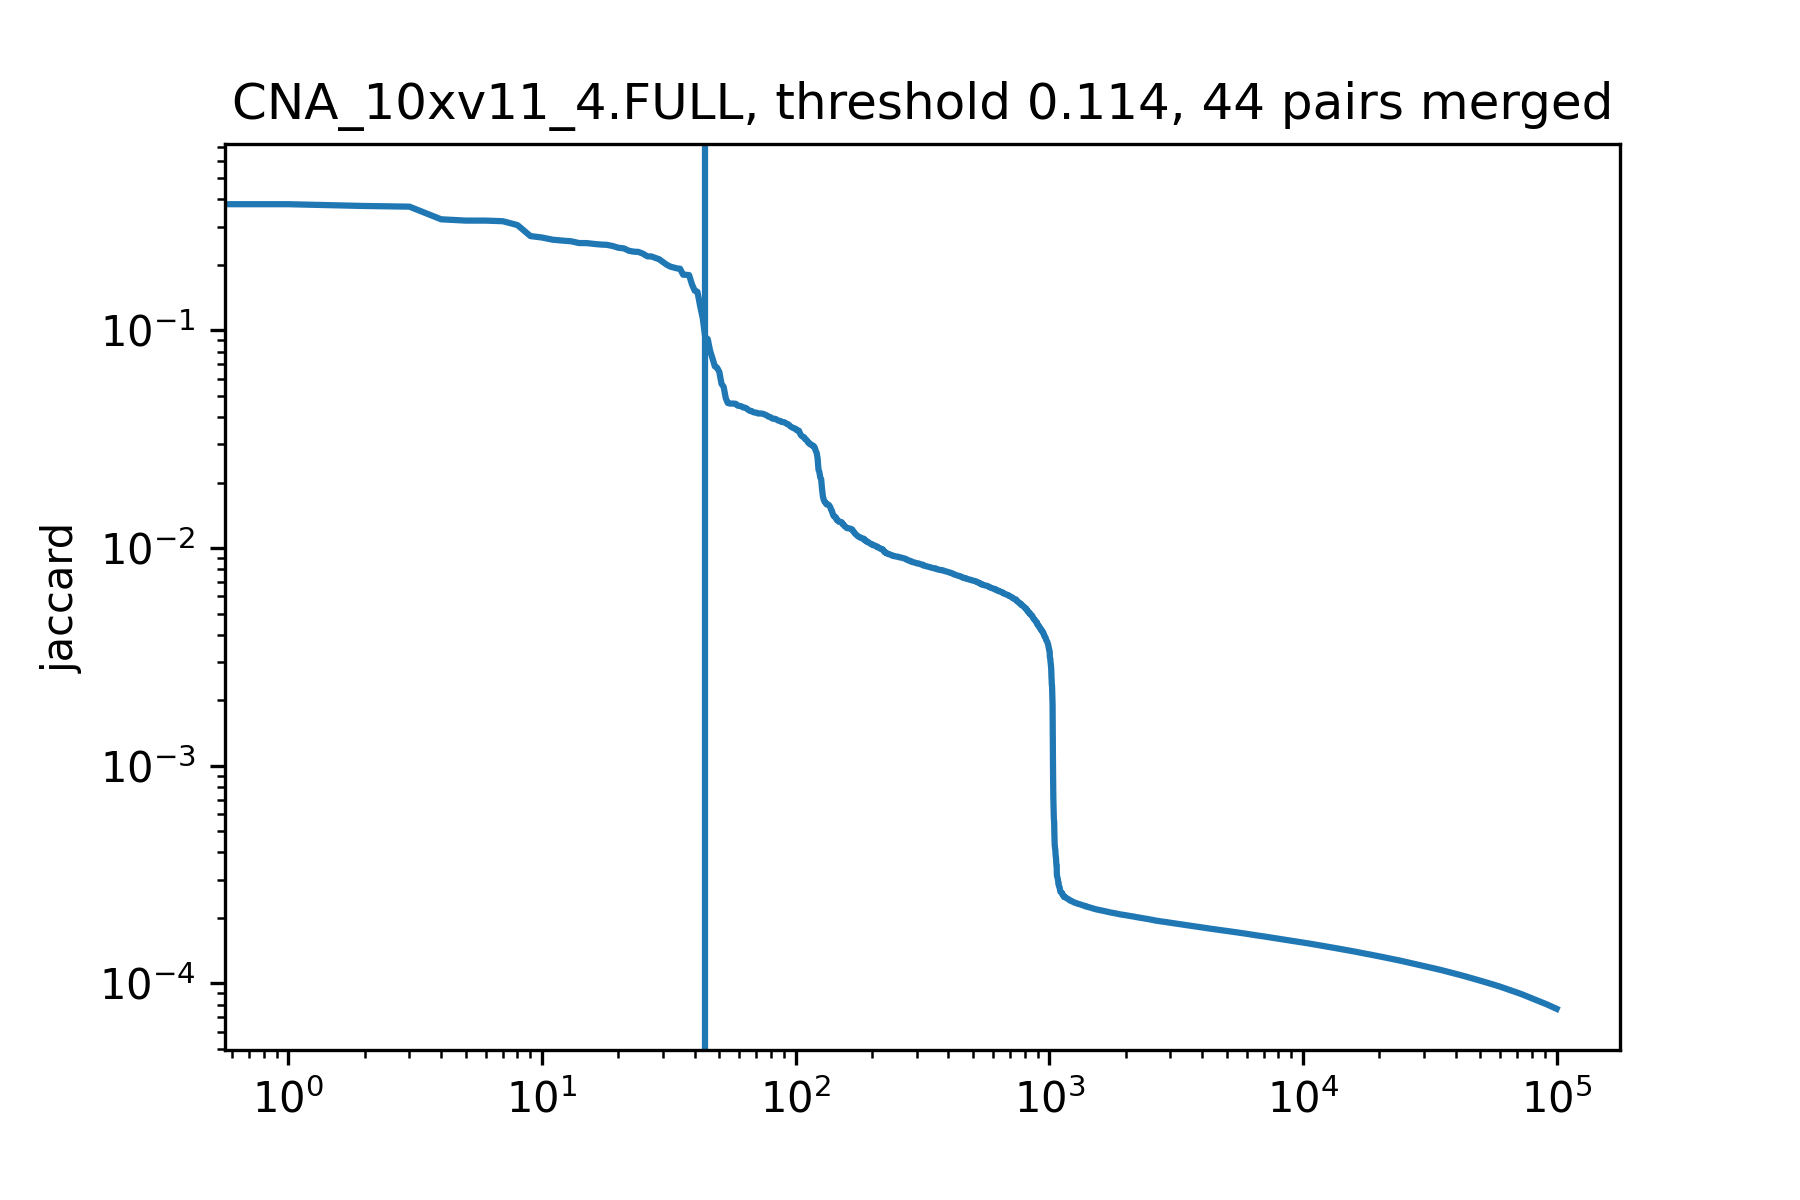

CNA_10xv11_5.FULL
plts_scratch/CNA_10xv11_5.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


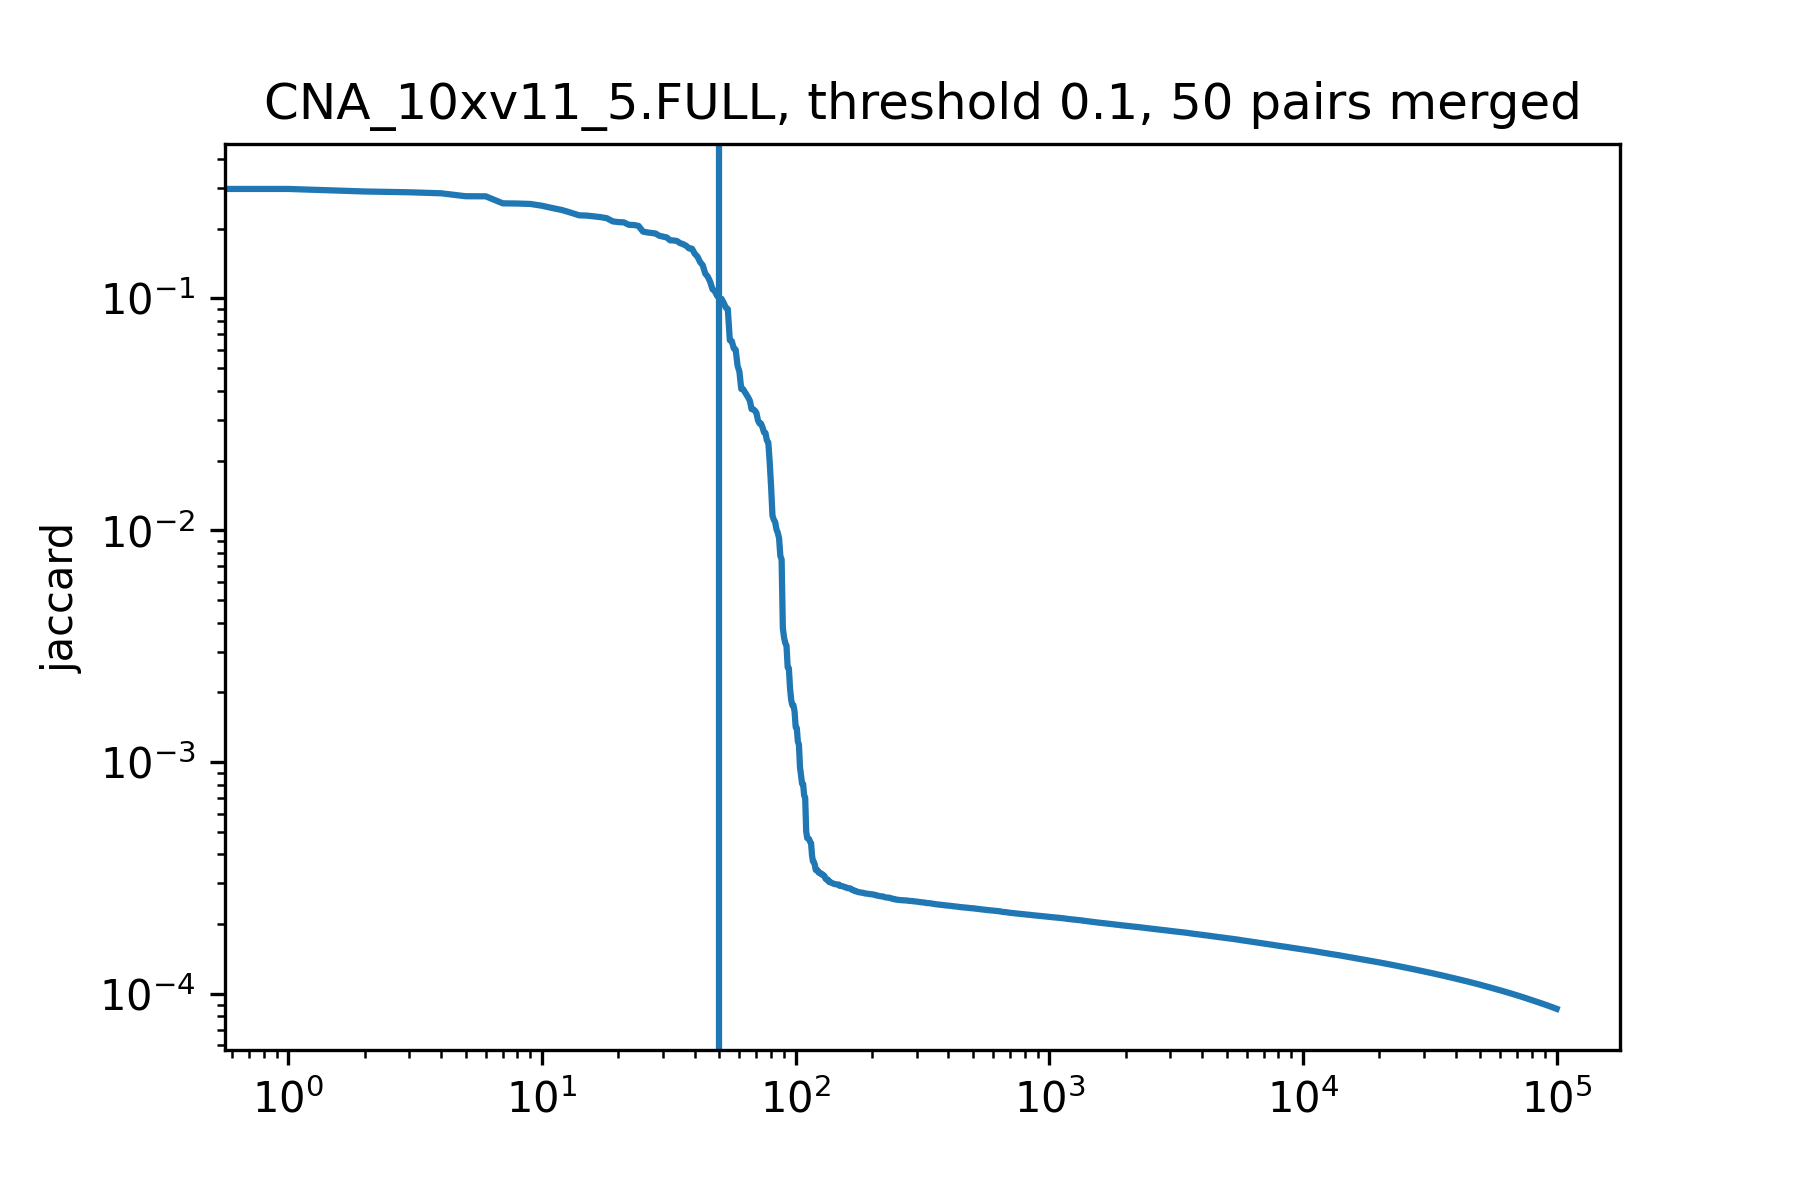

CNA_10xv2_1.FULL
plts_scratch/CNA_10xv2_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


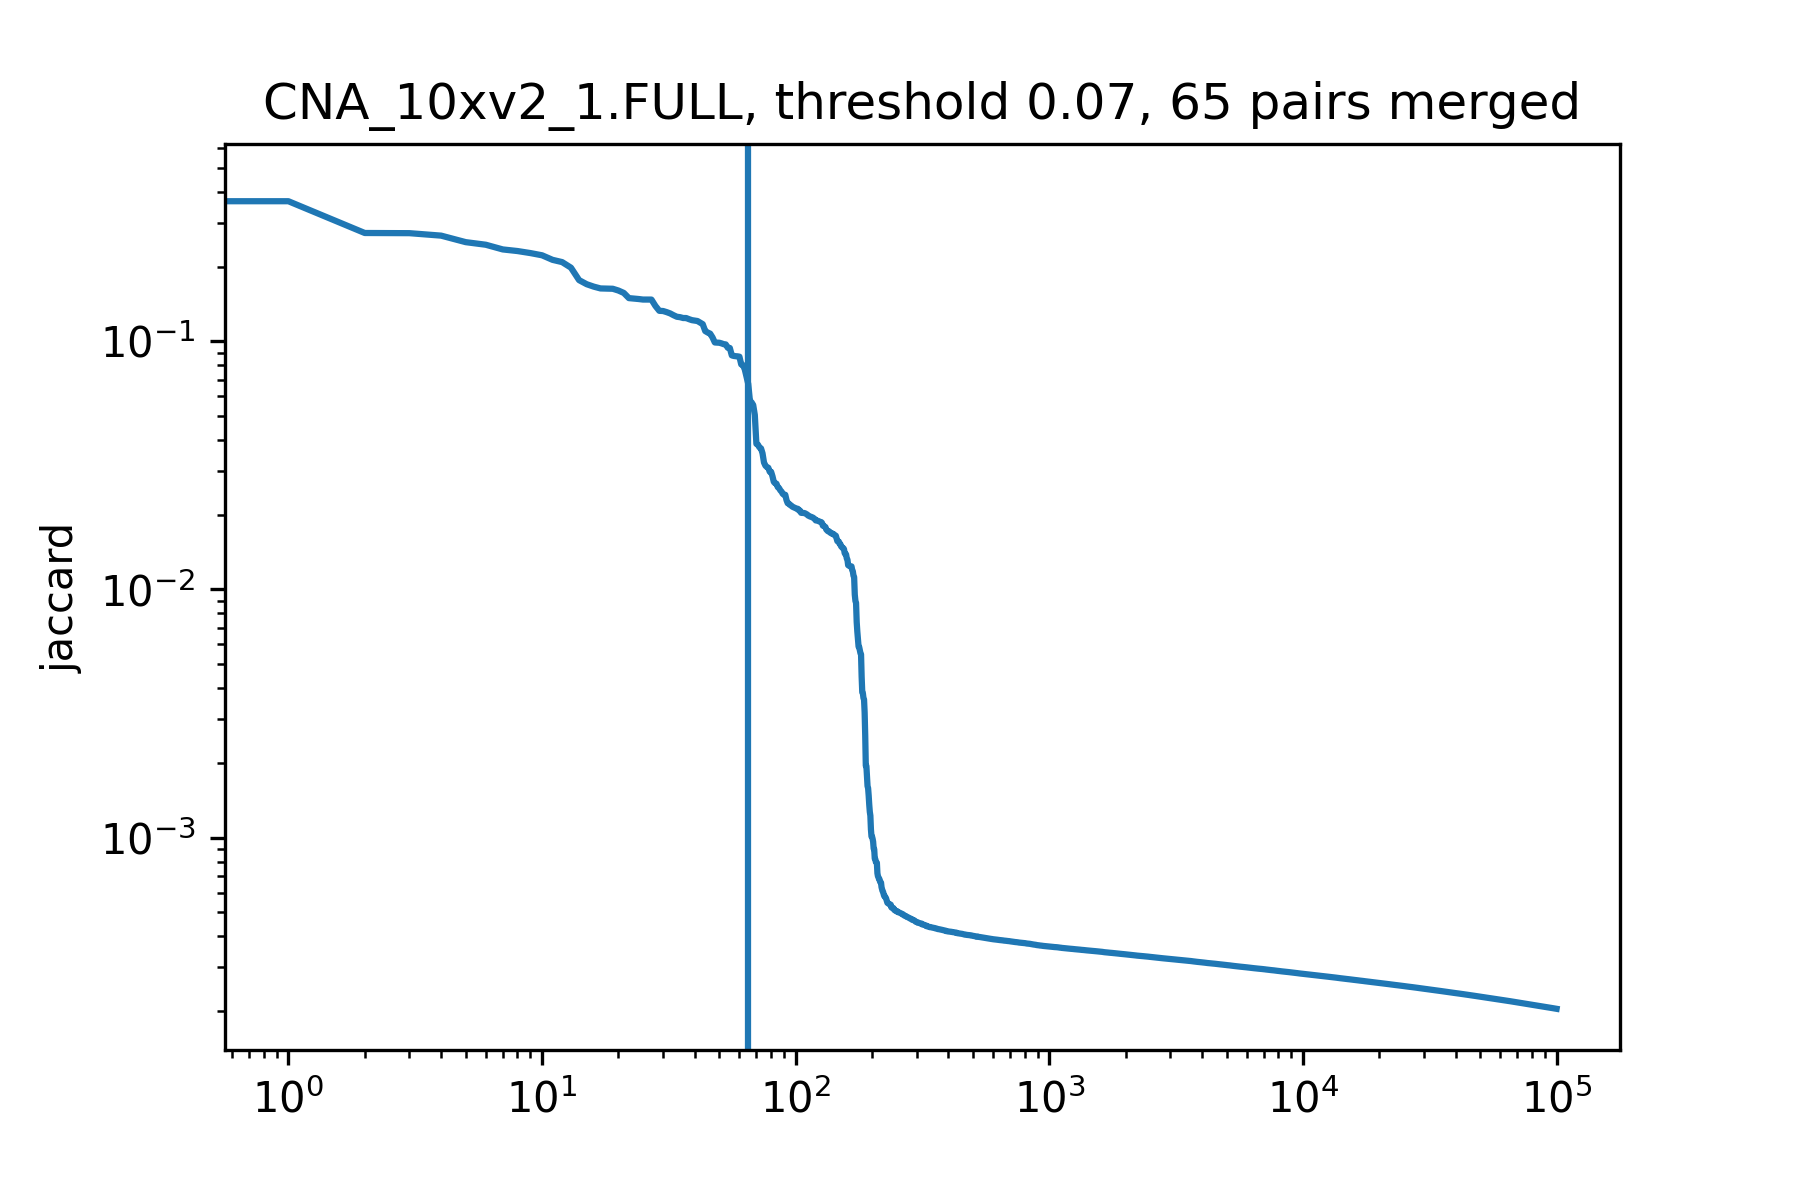

CNA_10xv2_2.FULL
plts_scratch/CNA_10xv2_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


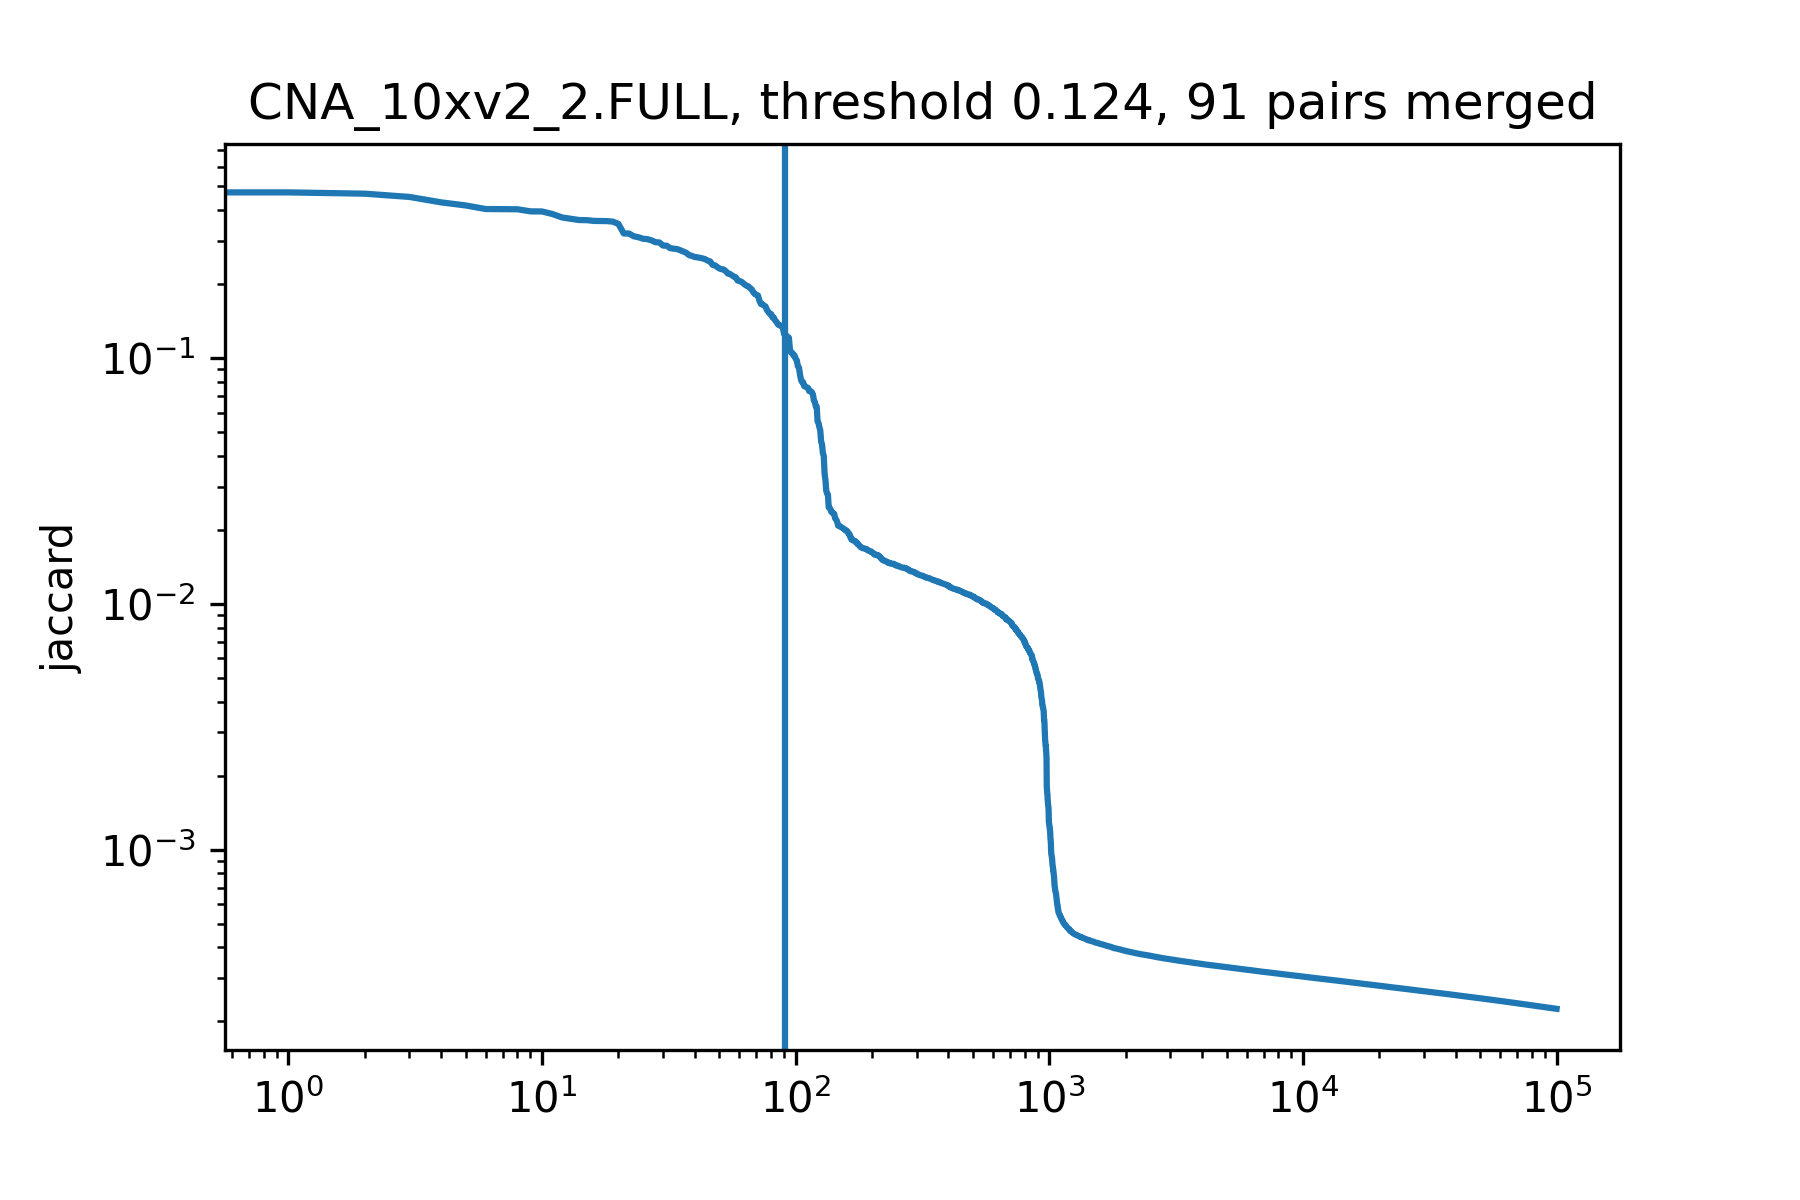

CNA_ddseq_1.FULL
plts_scratch/CNA_ddseq_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


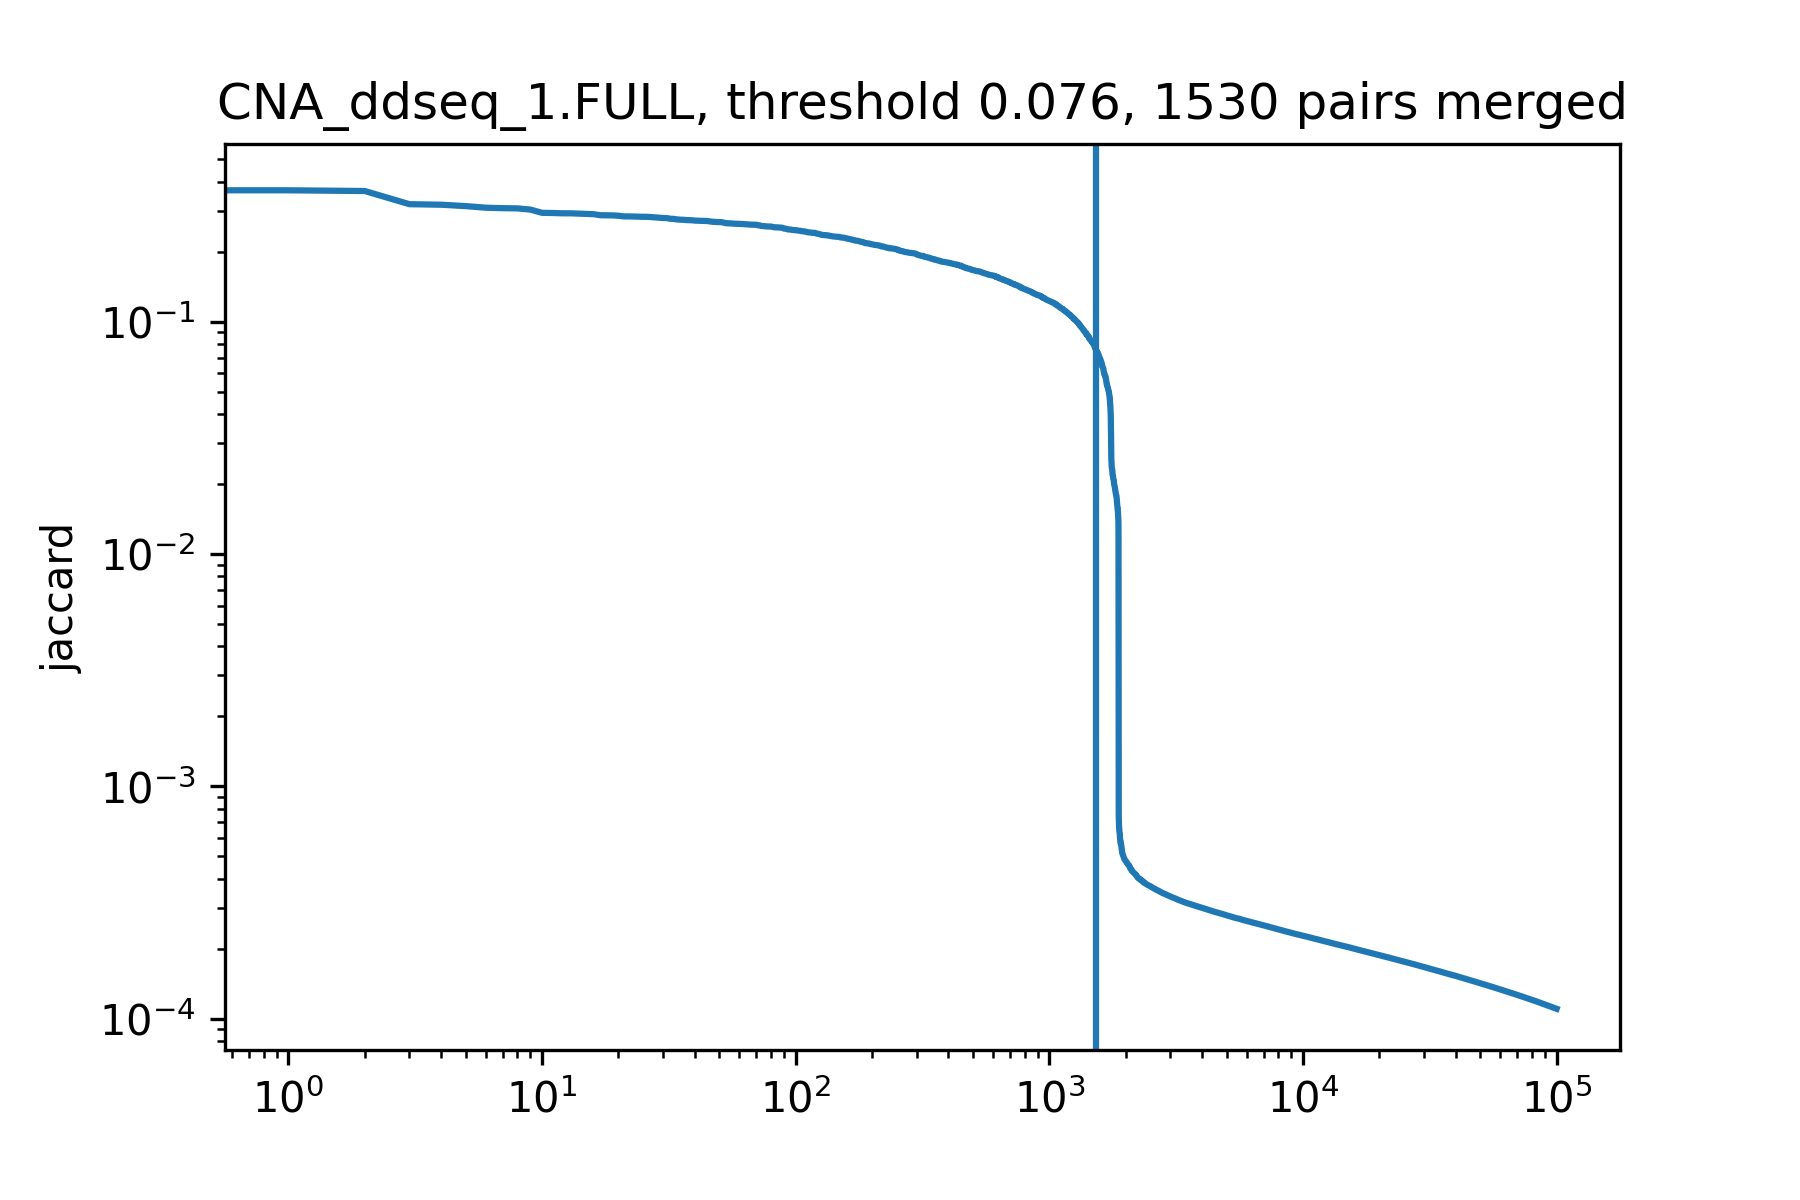

CNA_ddseq_2.FULL
plts_scratch/CNA_ddseq_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


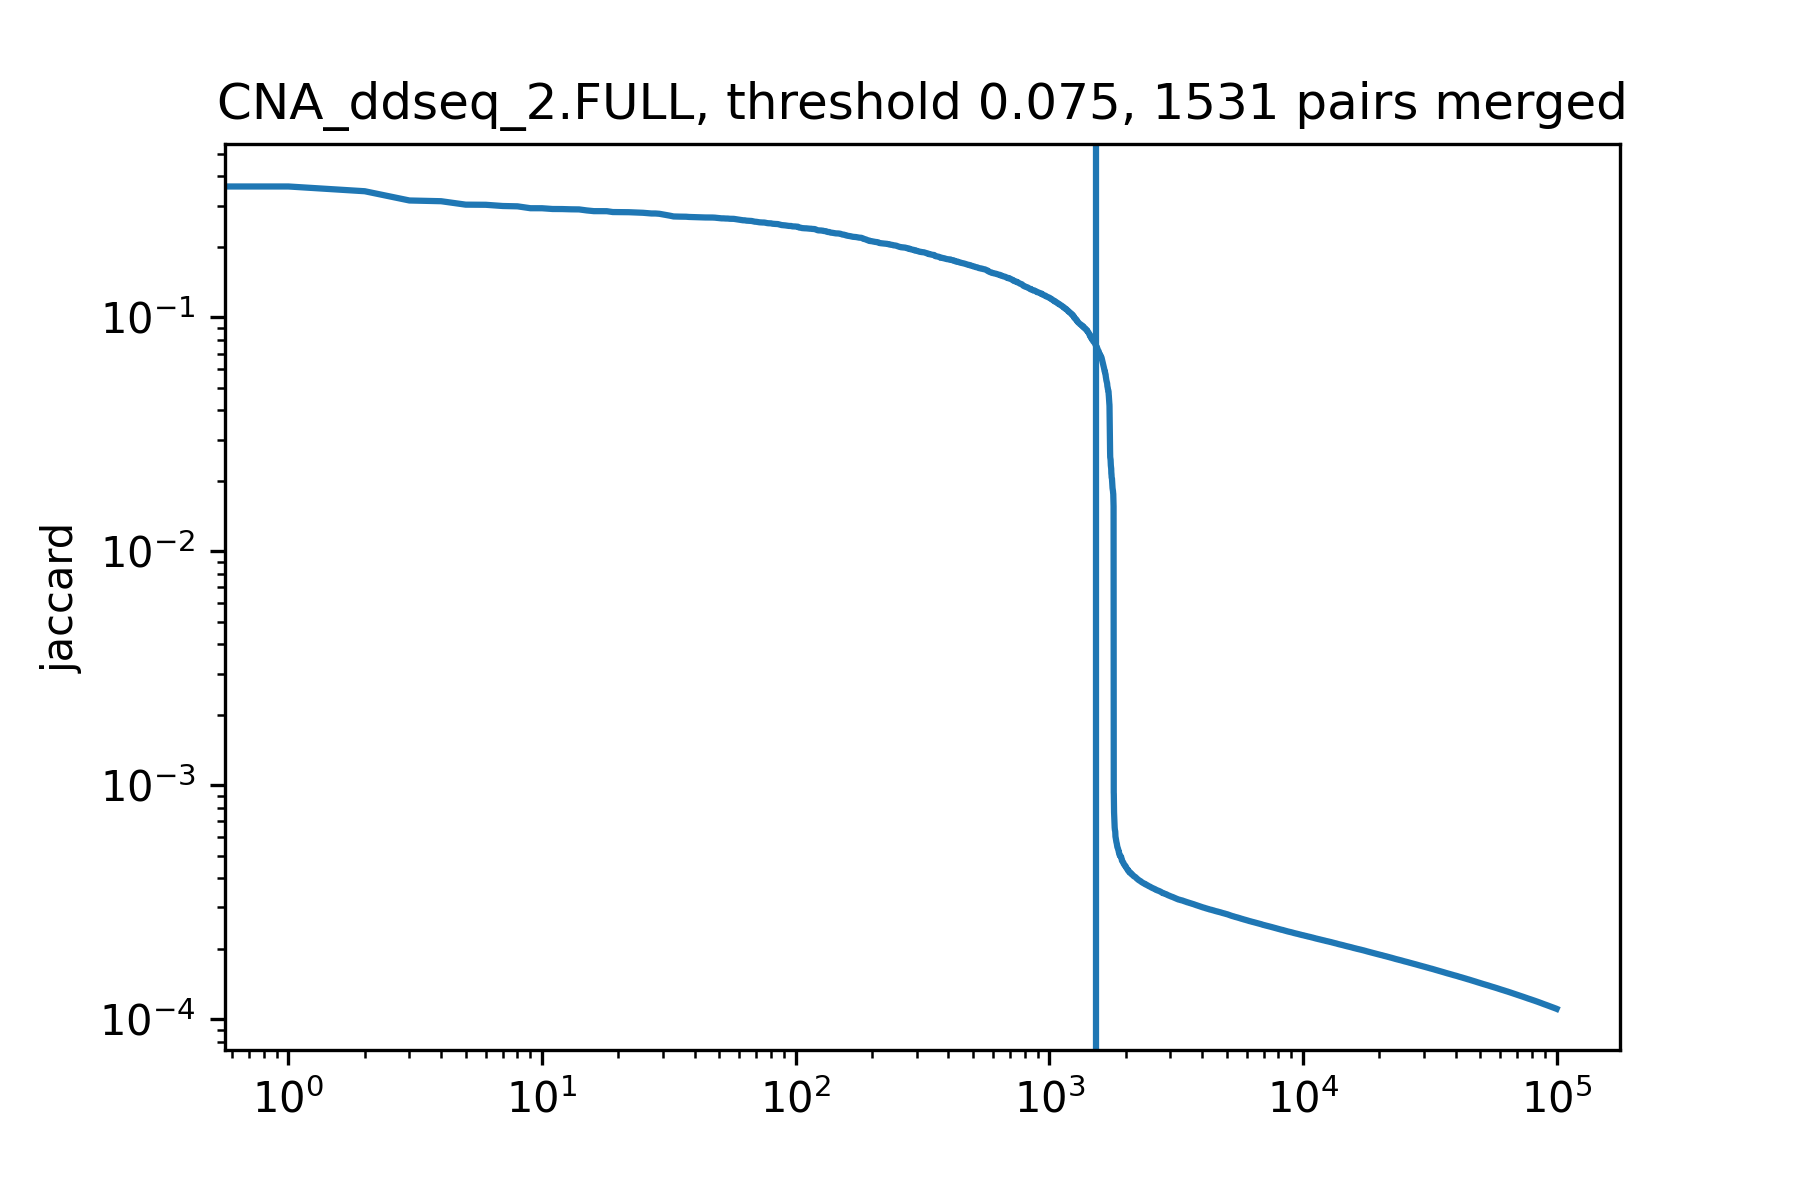

CNA_hydrop_1.FULL
plts_scratch/CNA_hydrop_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


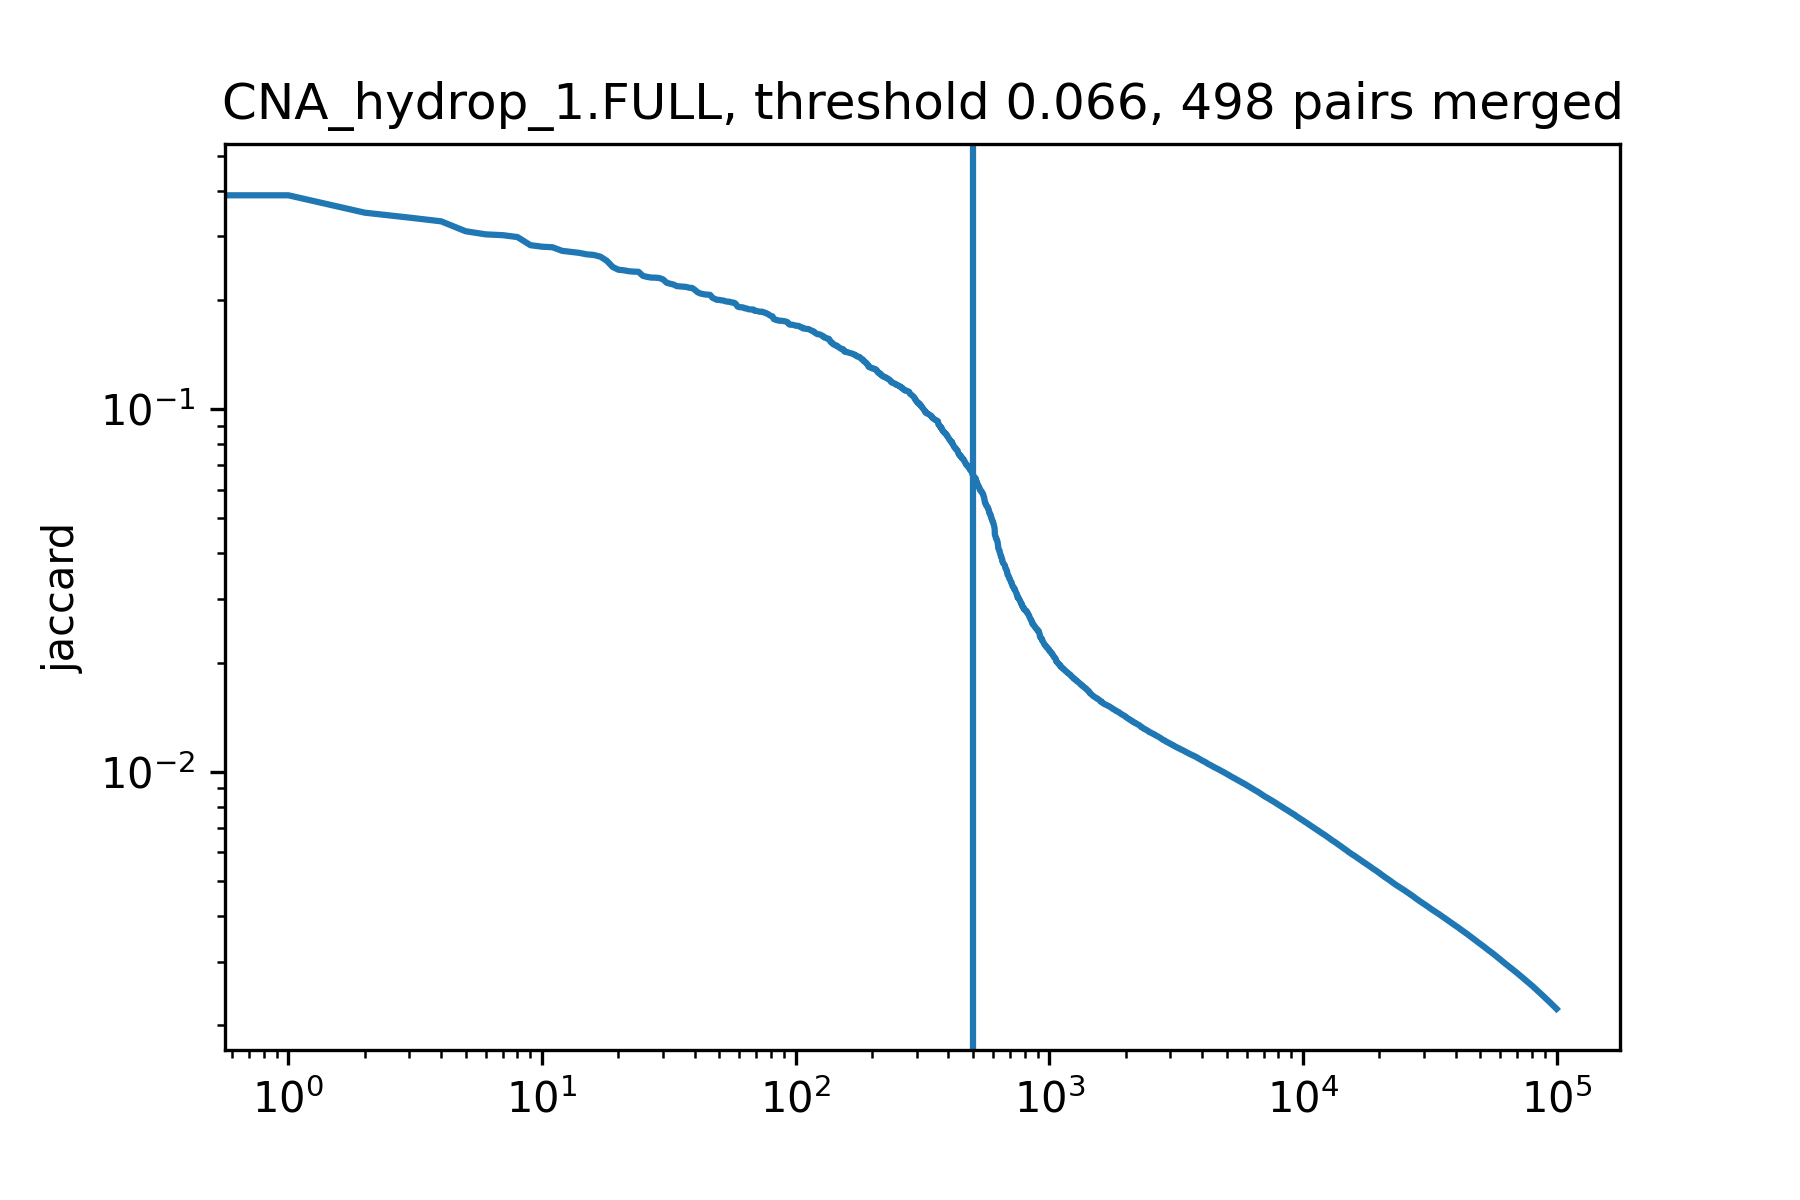

CNA_hydrop_2.FULL
plts_scratch/CNA_hydrop_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


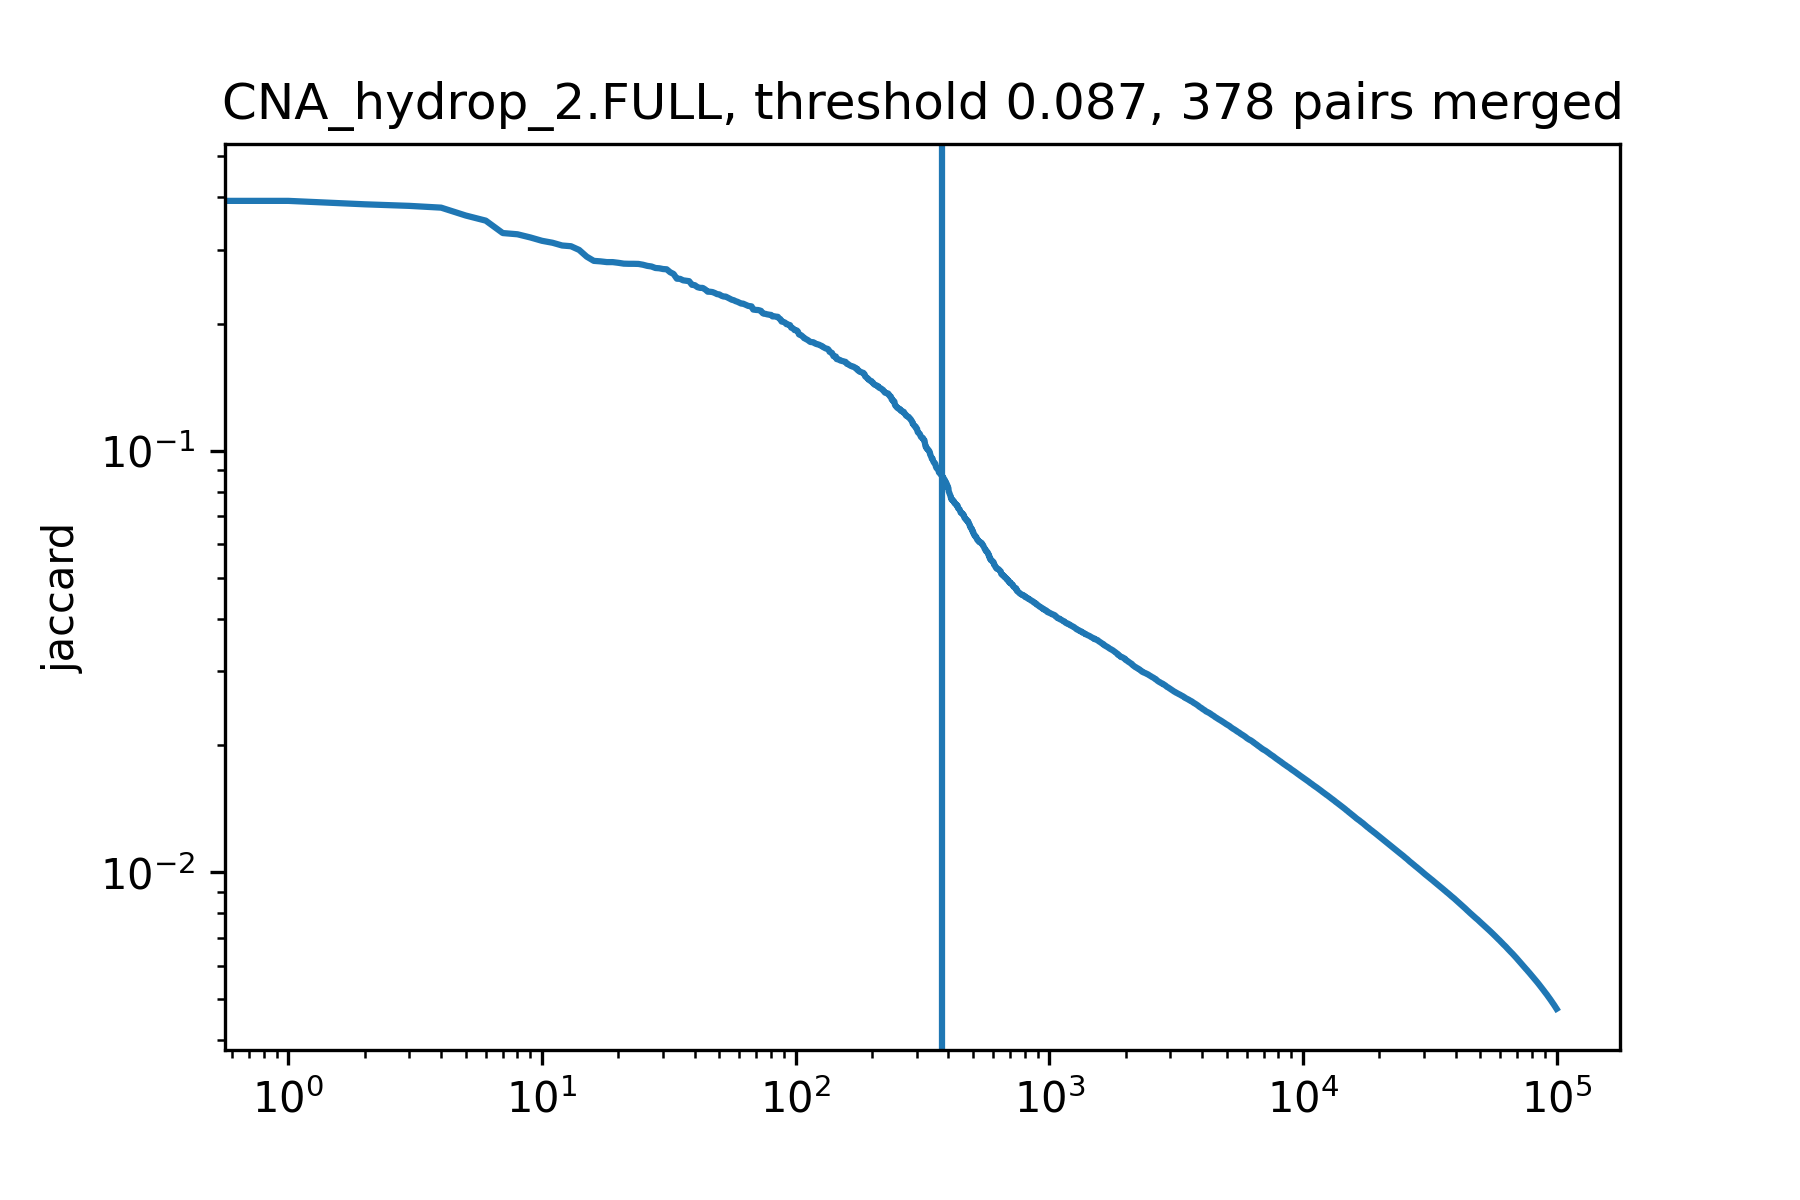

CNA_hydrop_3.FULL
plts_scratch/CNA_hydrop_3.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


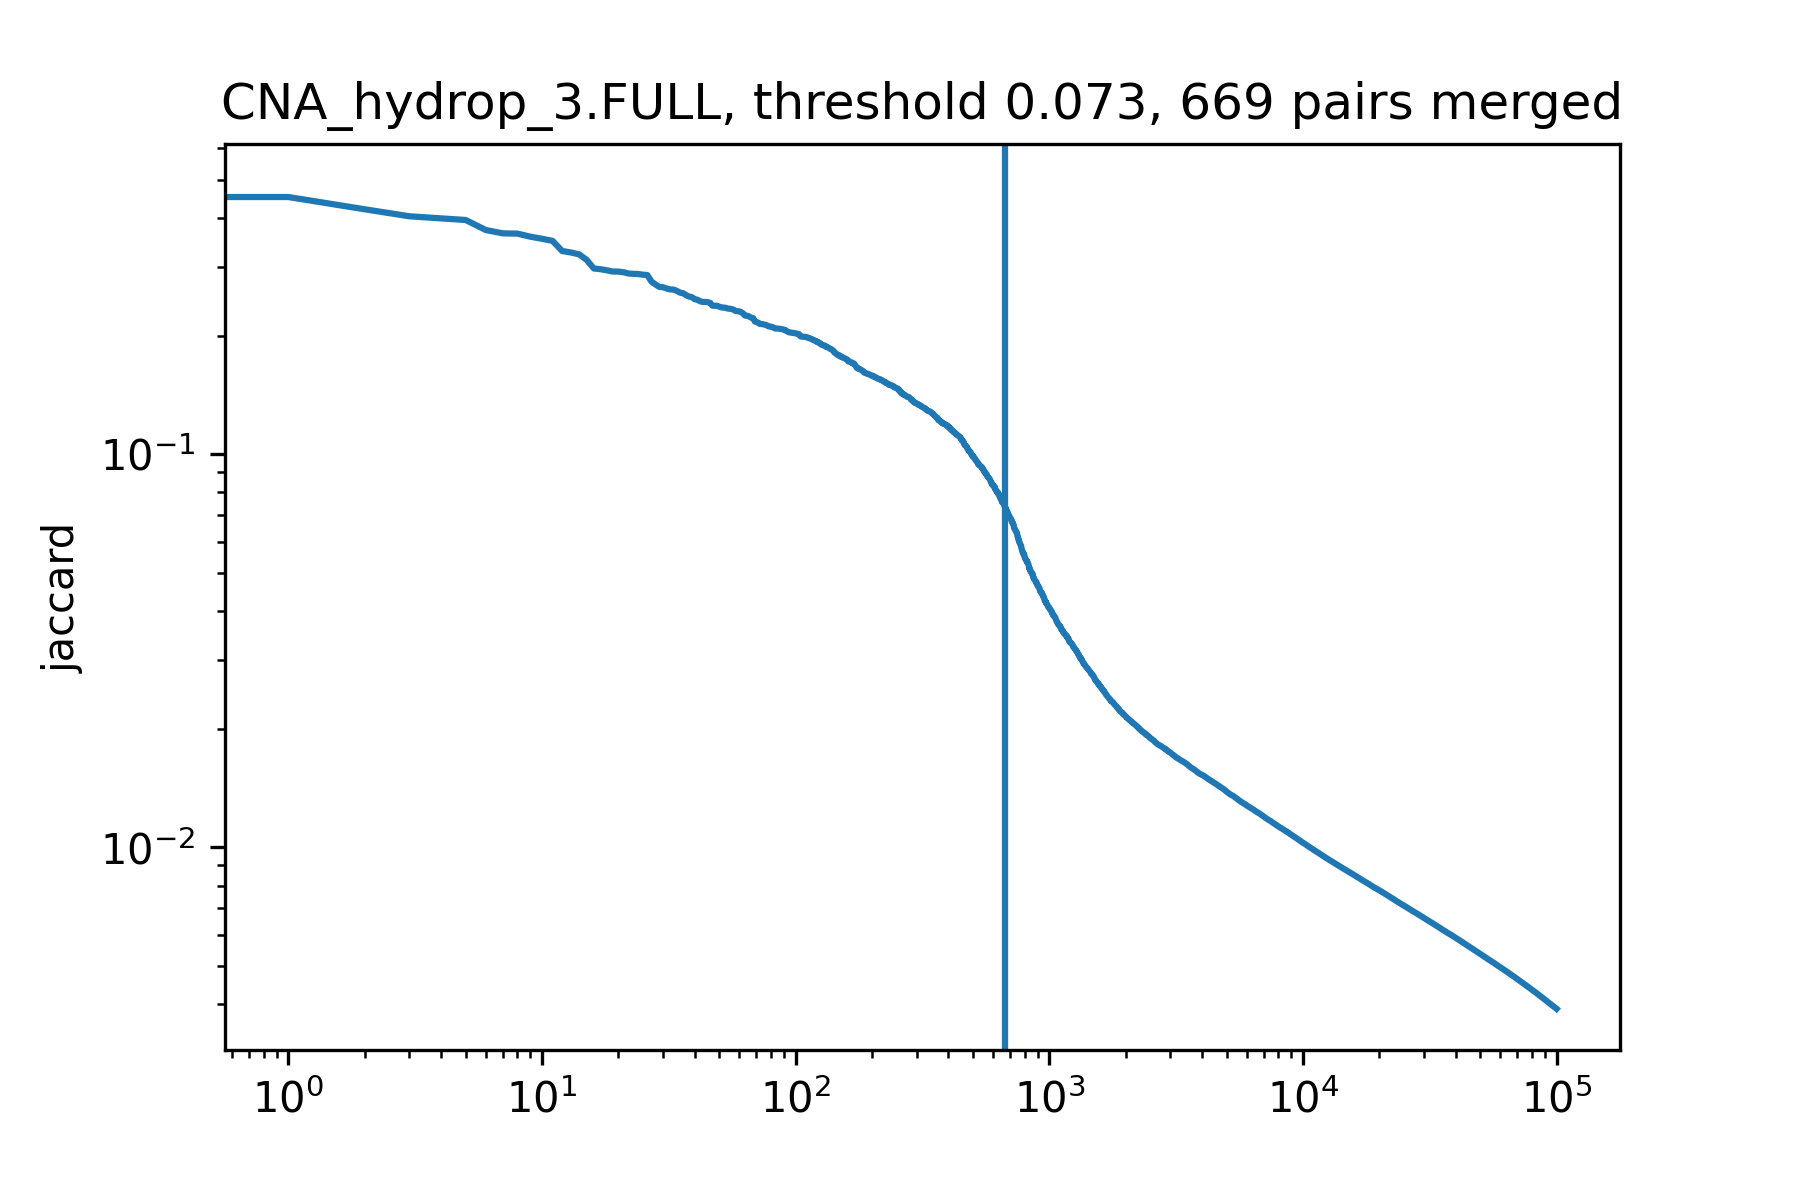

CNA_mtscatac_1.FULL
plts_scratch/CNA_mtscatac_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


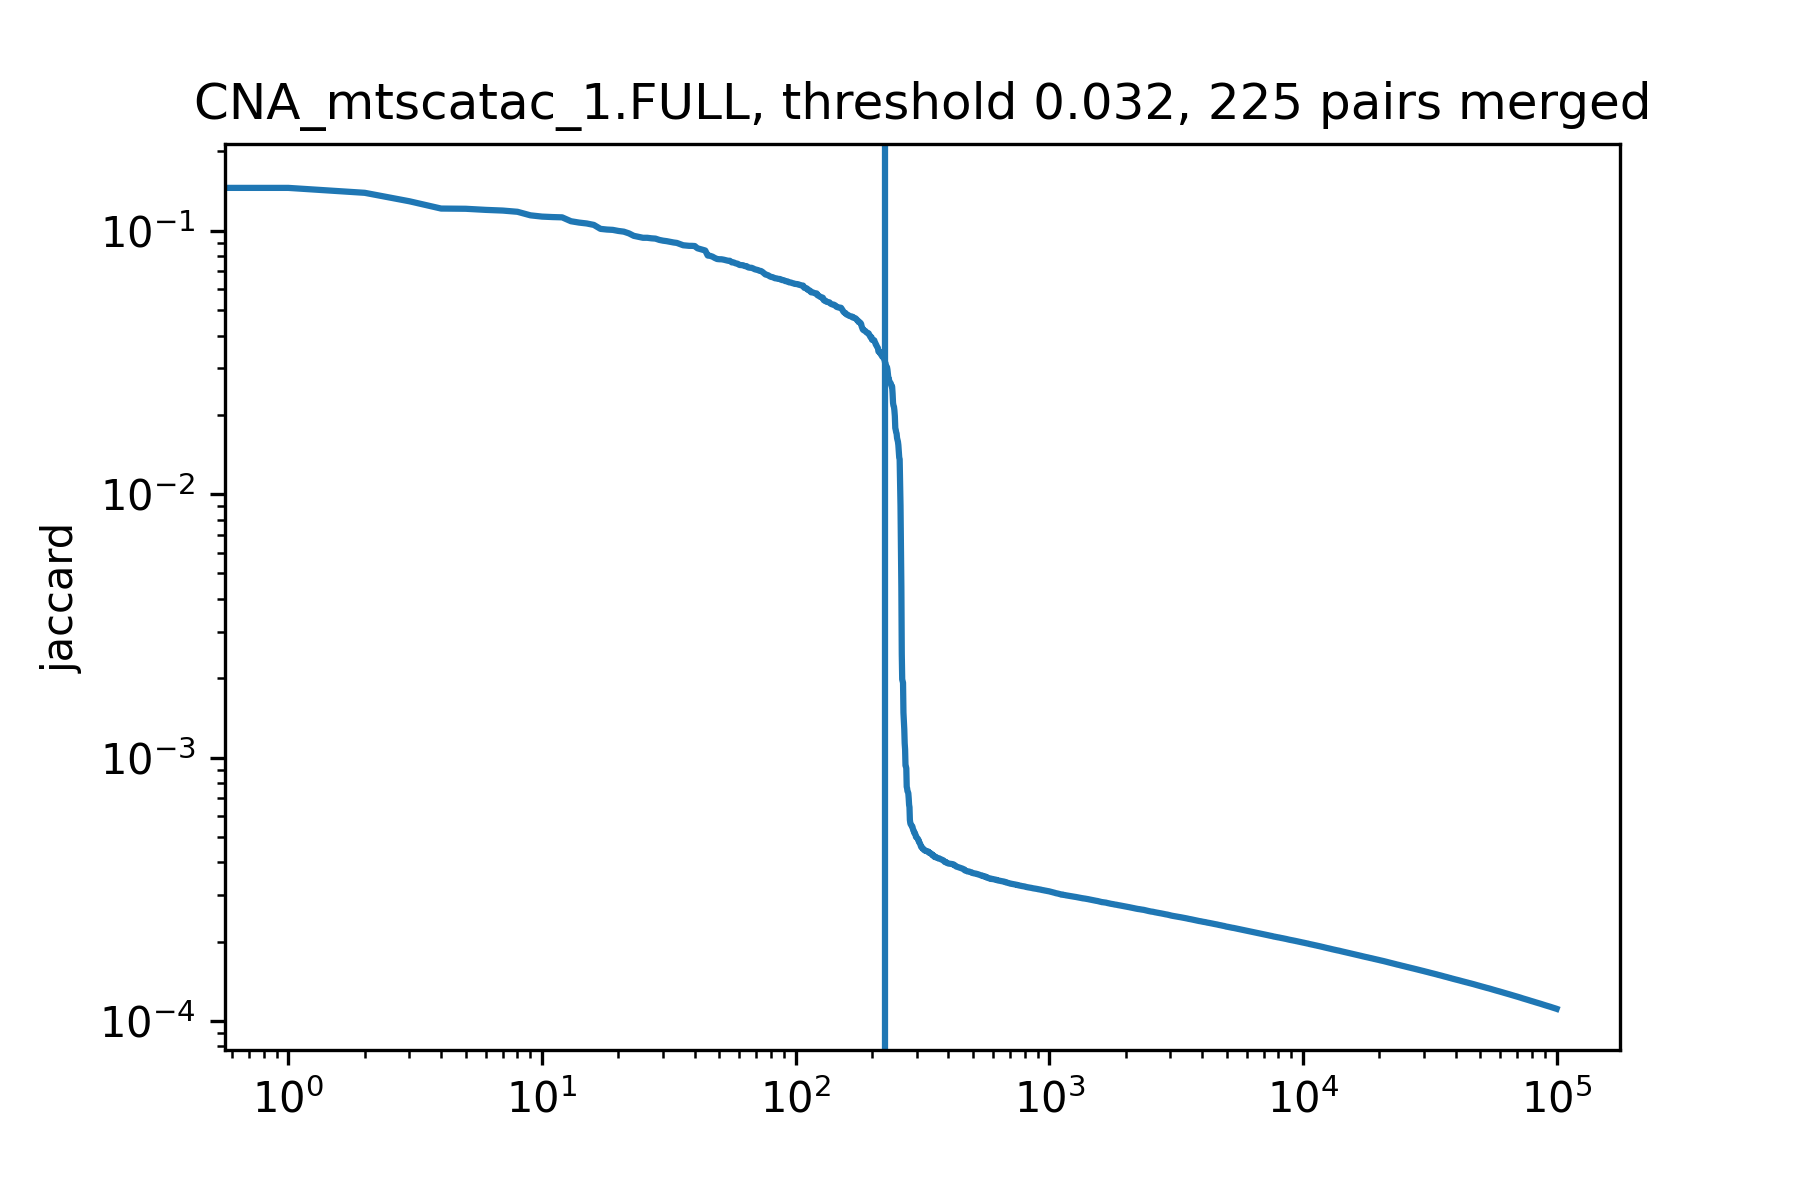

CNA_mtscatac_2.FULL
plts_scratch/CNA_mtscatac_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


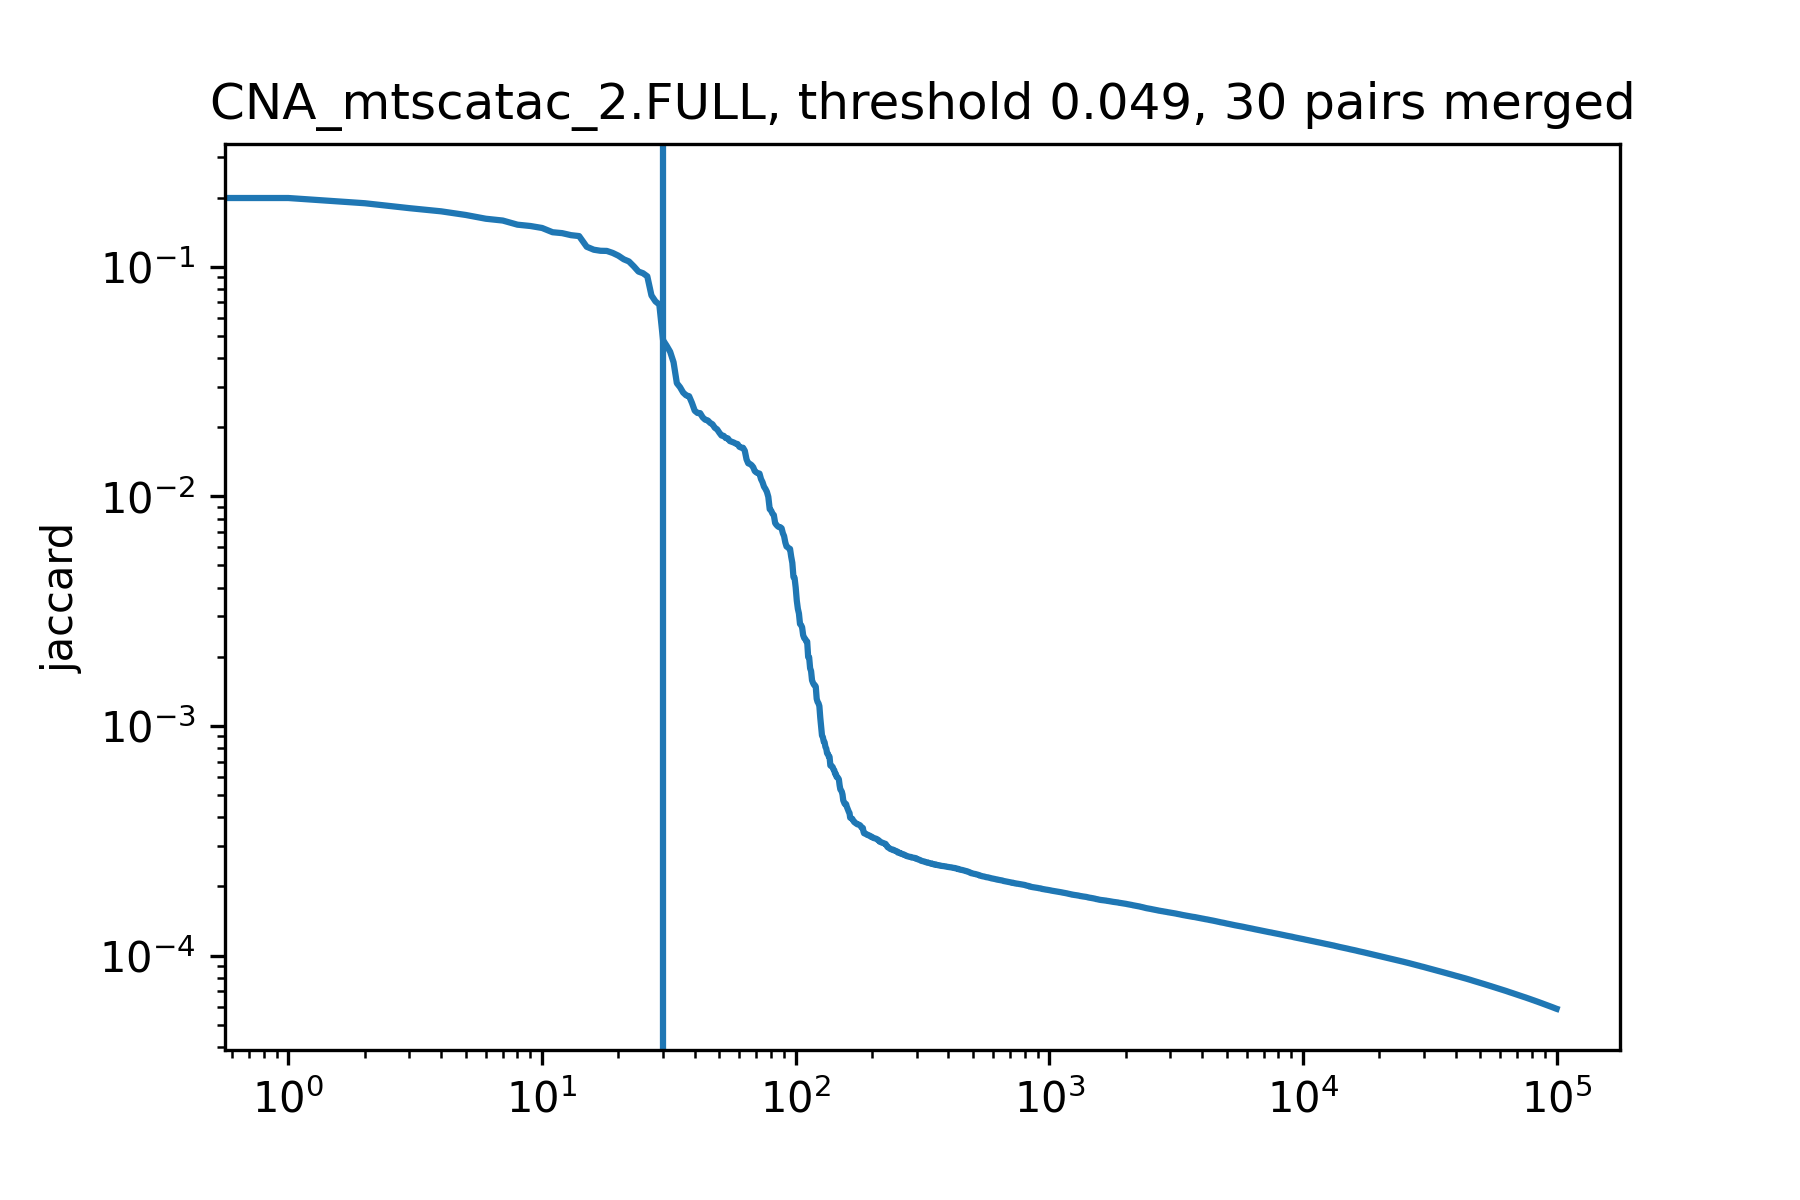

EPF_hydrop_1.FULL
plts_scratch/EPF_hydrop_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


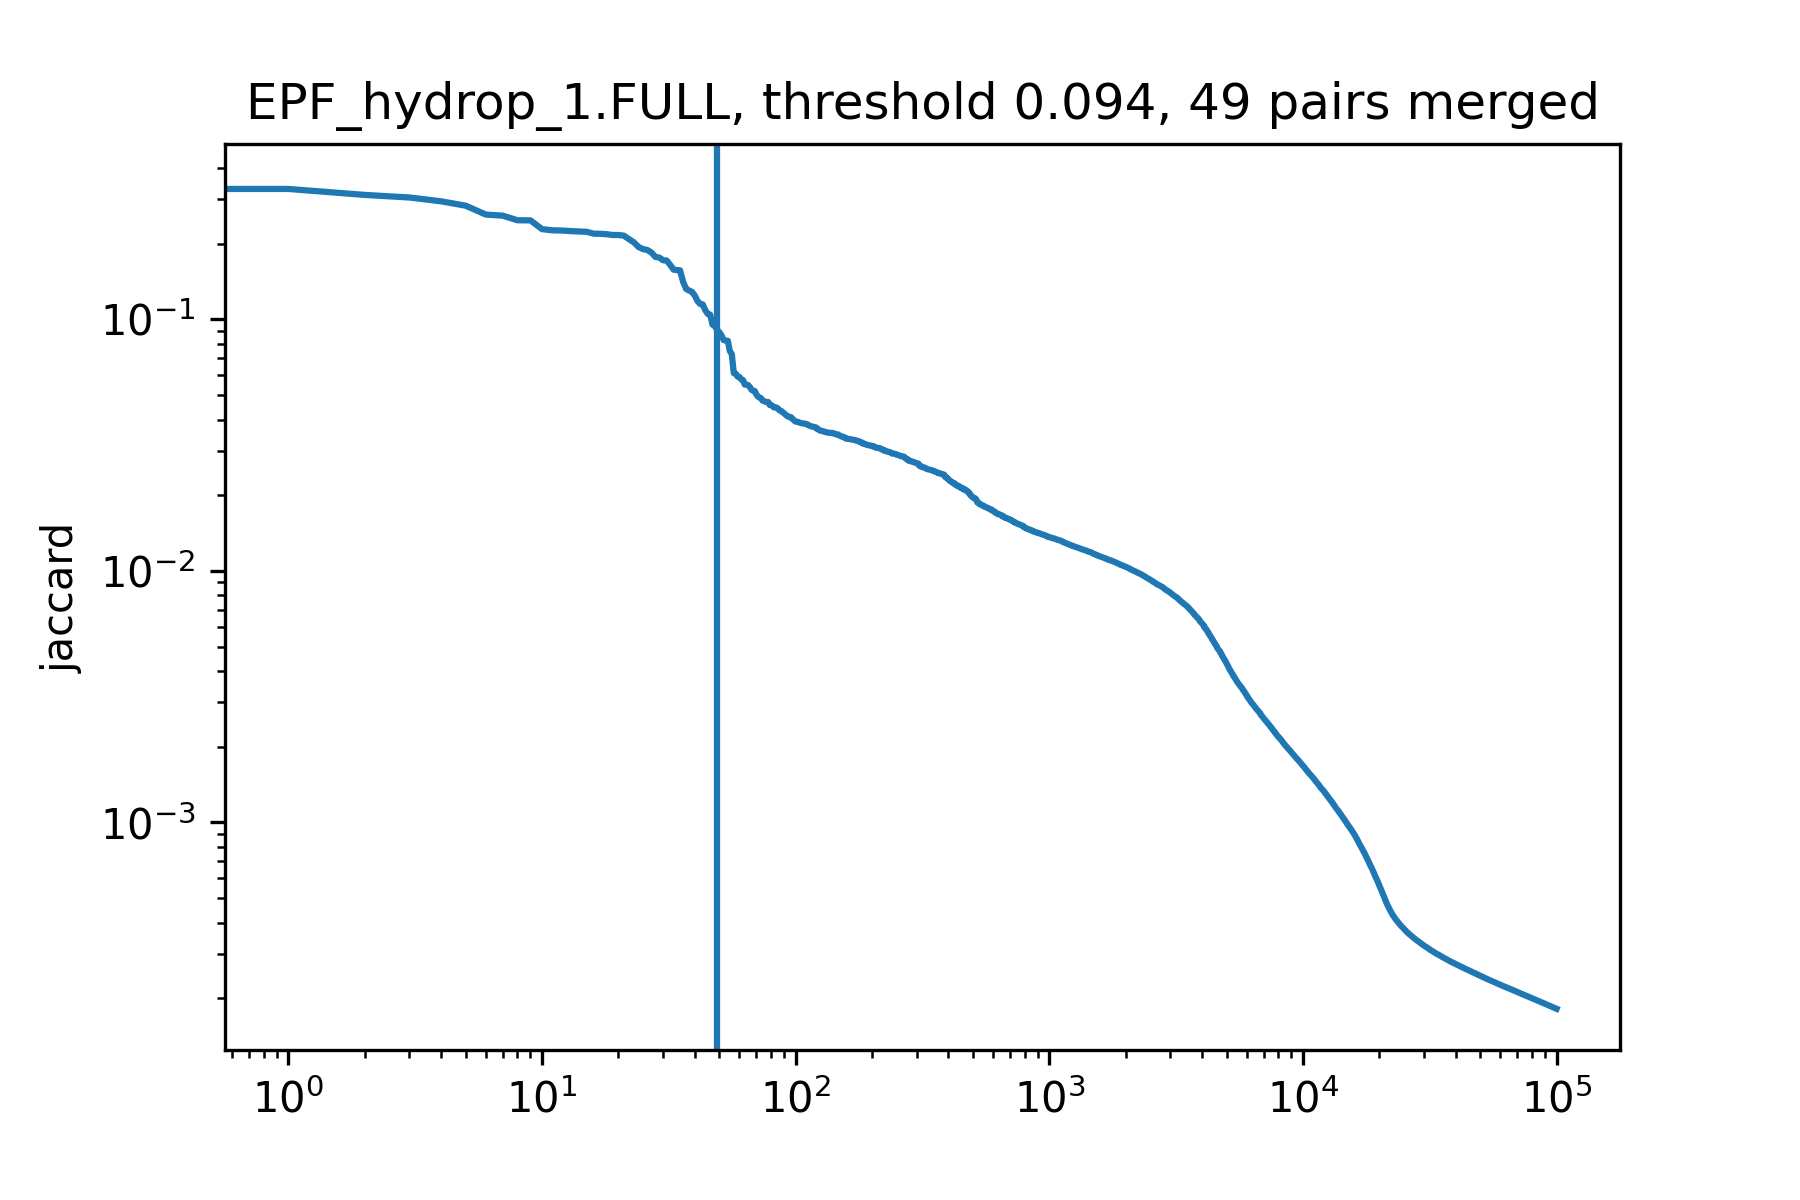

EPF_hydrop_2.FULL
plts_scratch/EPF_hydrop_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


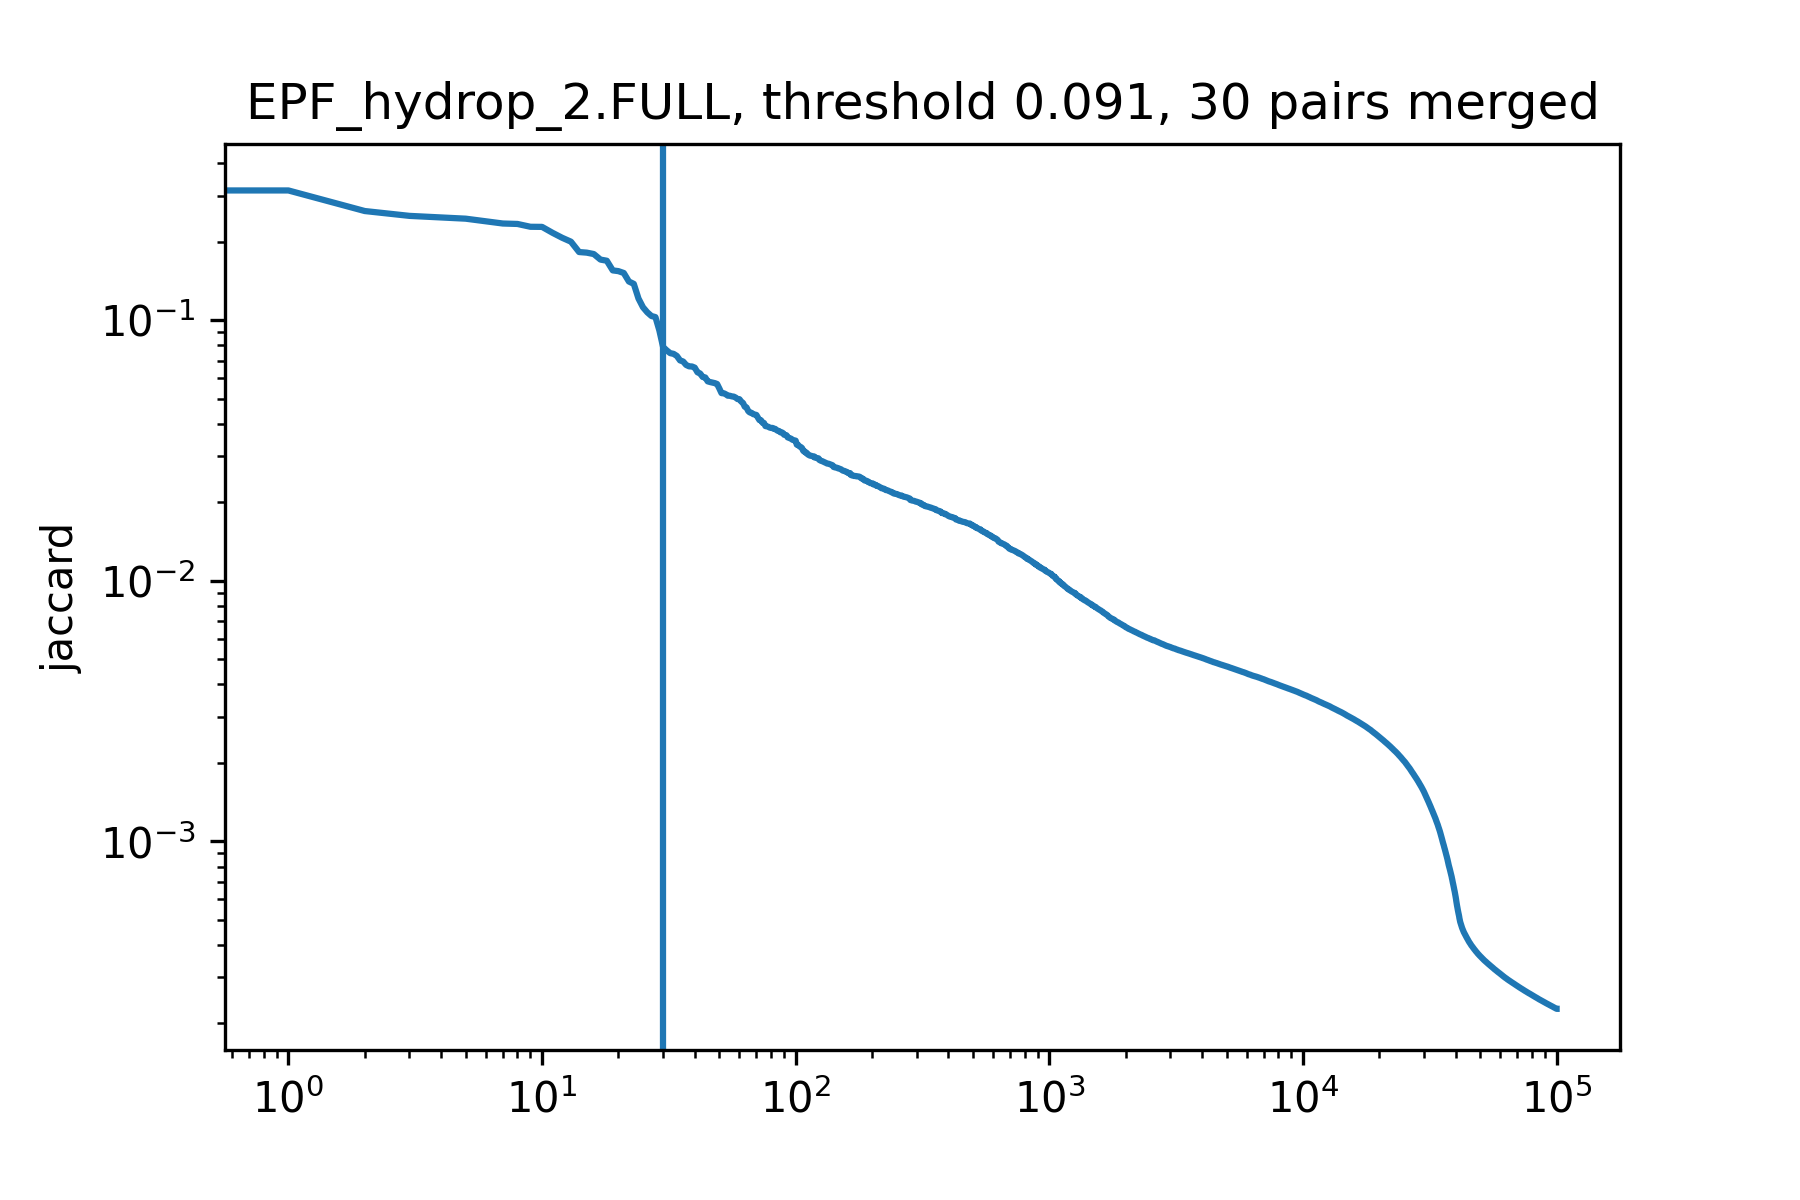

EPF_hydrop_3.FULL
plts_scratch/EPF_hydrop_3.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


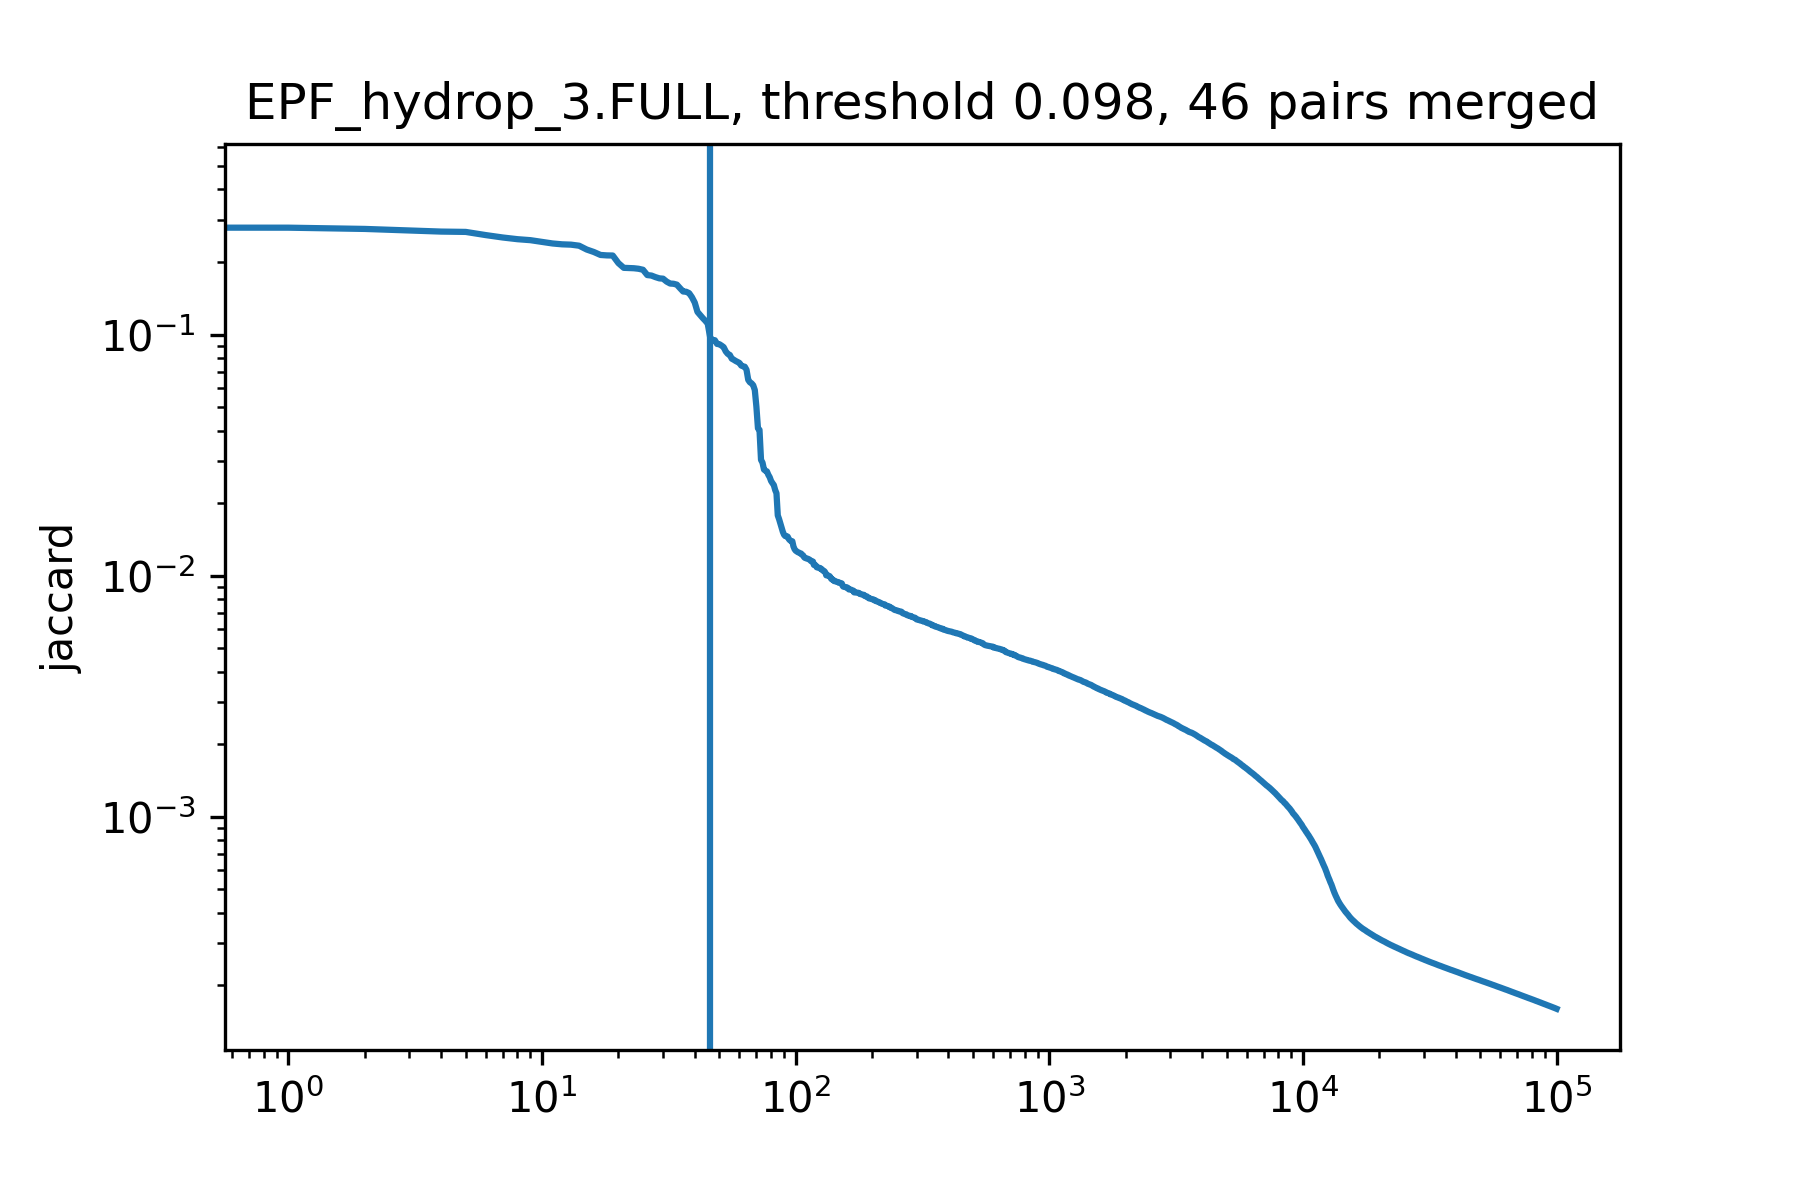

EPF_hydrop_4.FULL
plts_scratch/EPF_hydrop_4.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


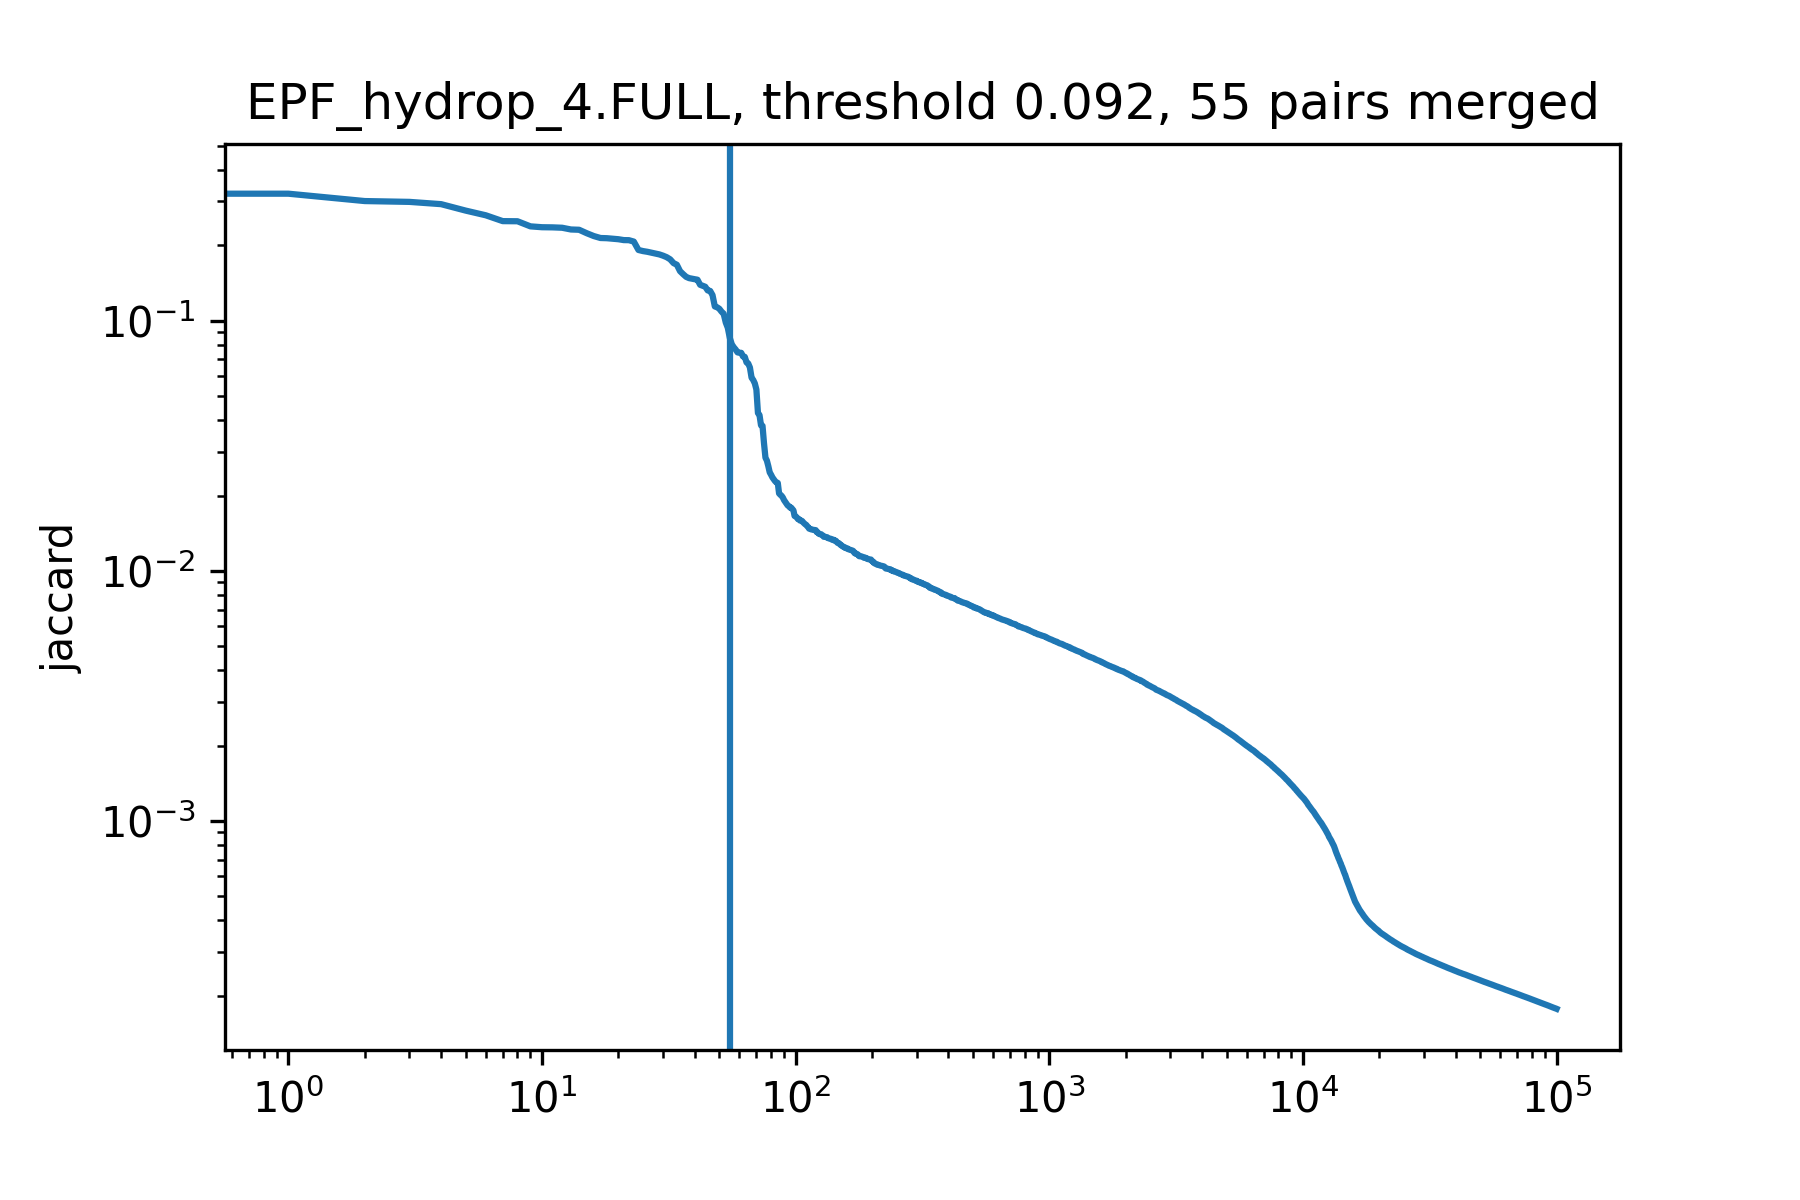

HAR_ddseq_1.FULL
plts_scratch/HAR_ddseq_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


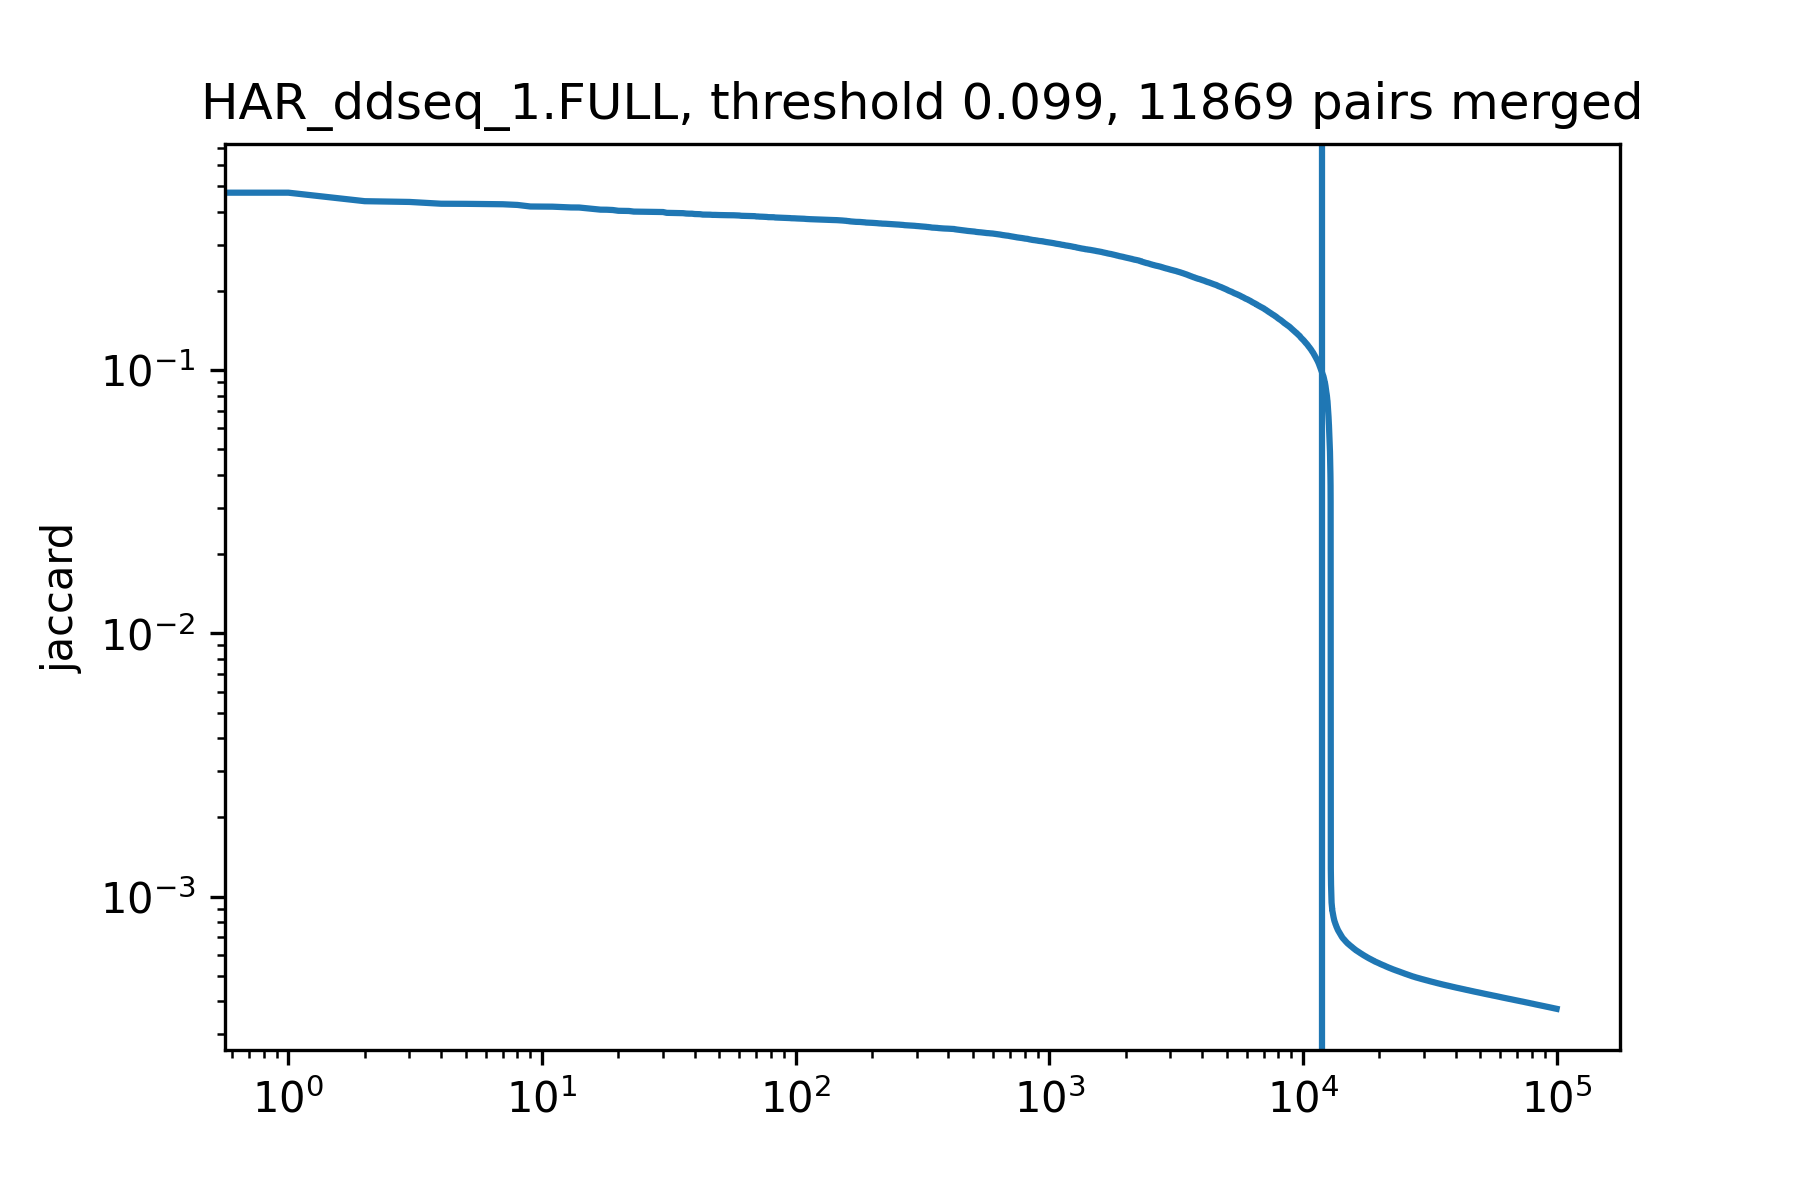

HAR_ddseq_2.FULL
plts_scratch/HAR_ddseq_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


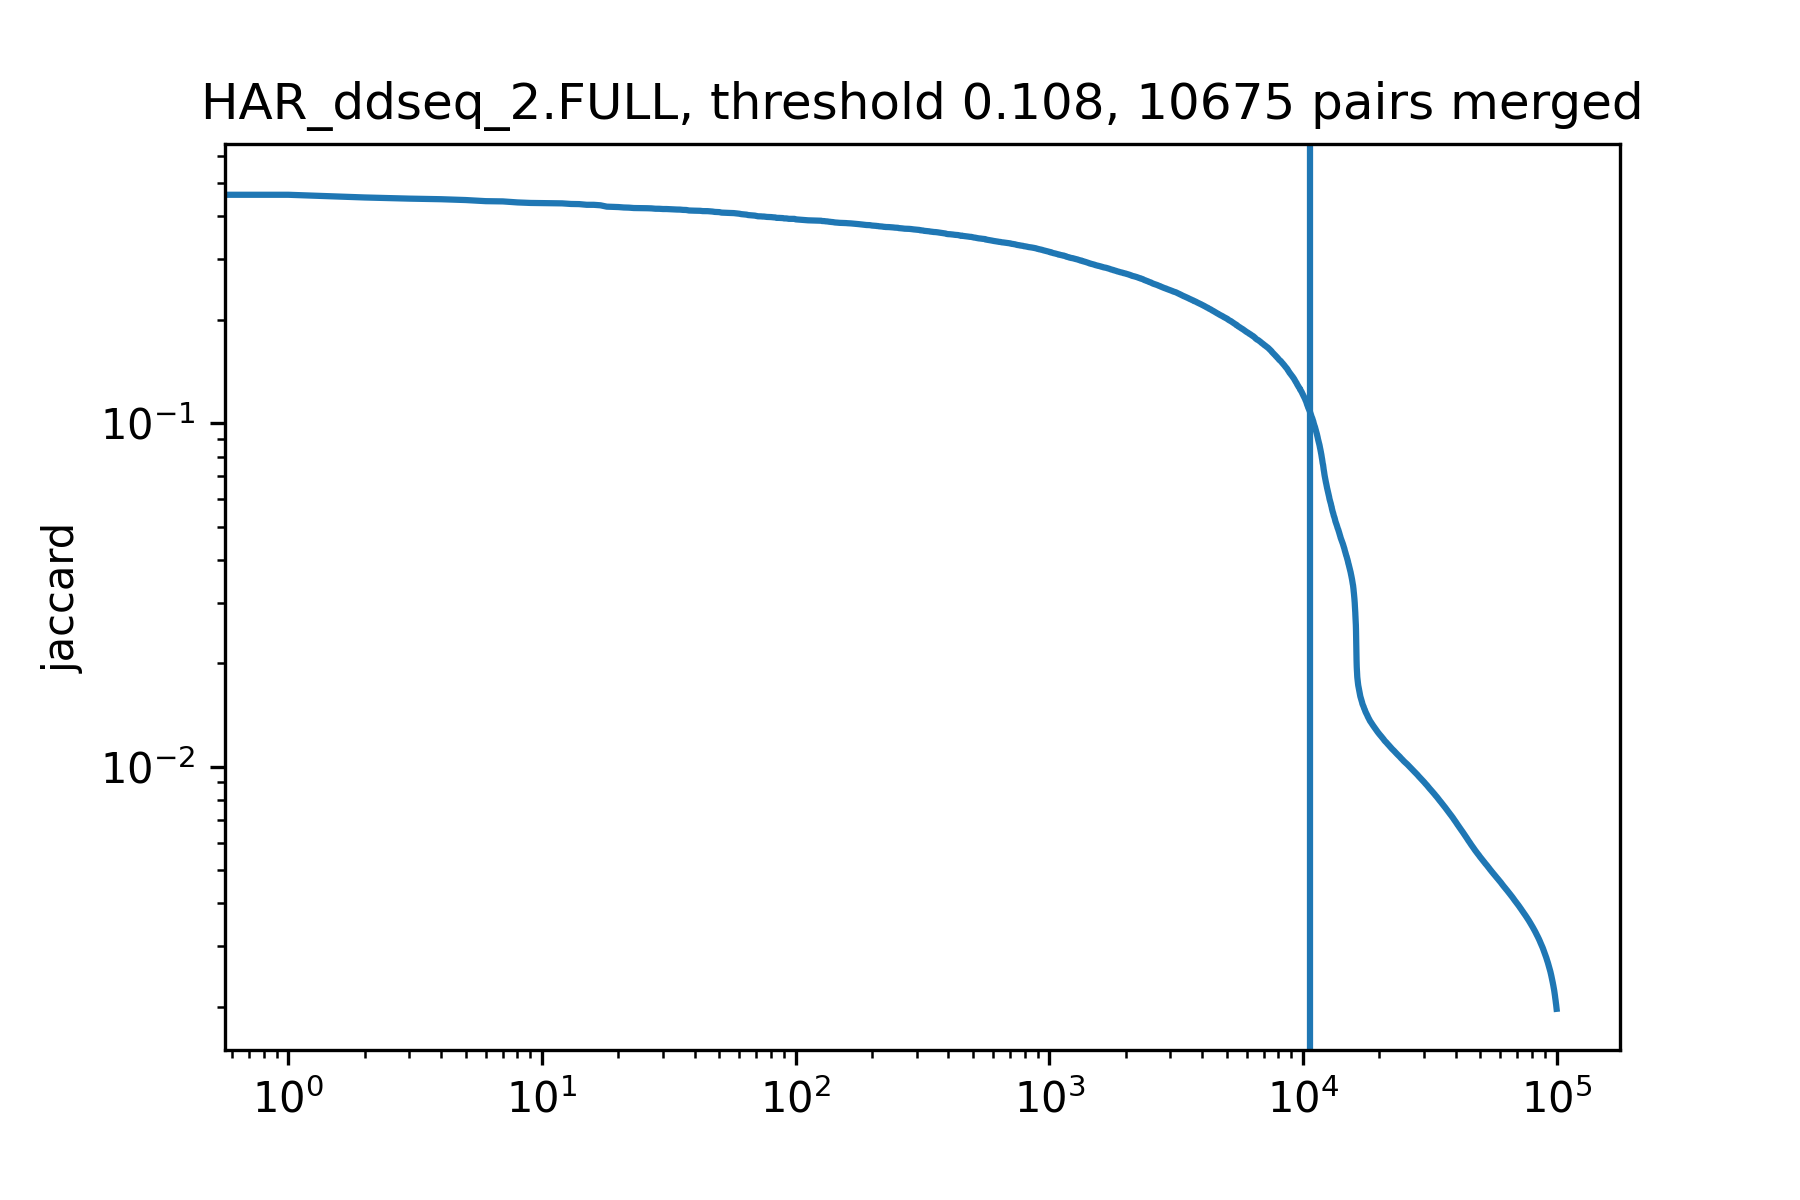

MDC_mtscatac_1.FULL
plts_scratch/MDC_mtscatac_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


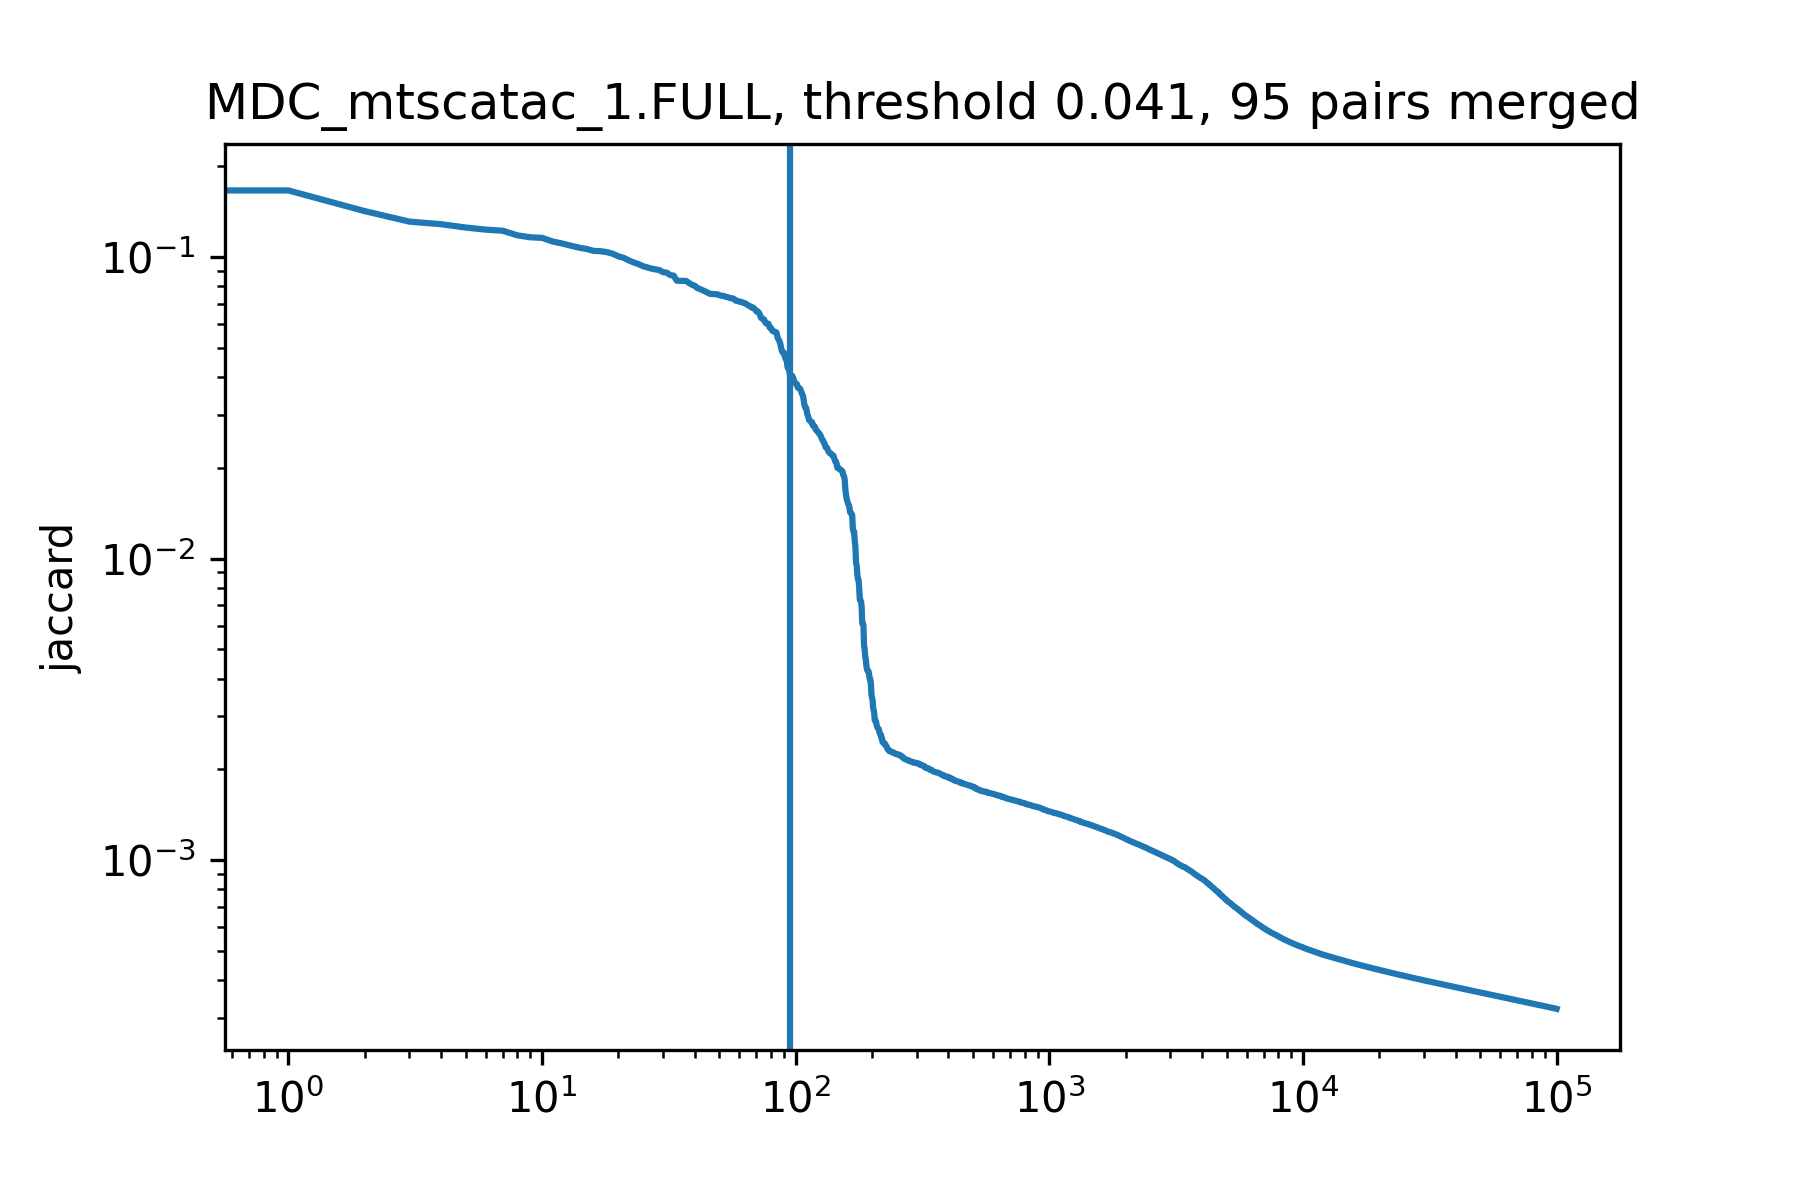

MDC_mtscatac_2.FULL
plts_scratch/MDC_mtscatac_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


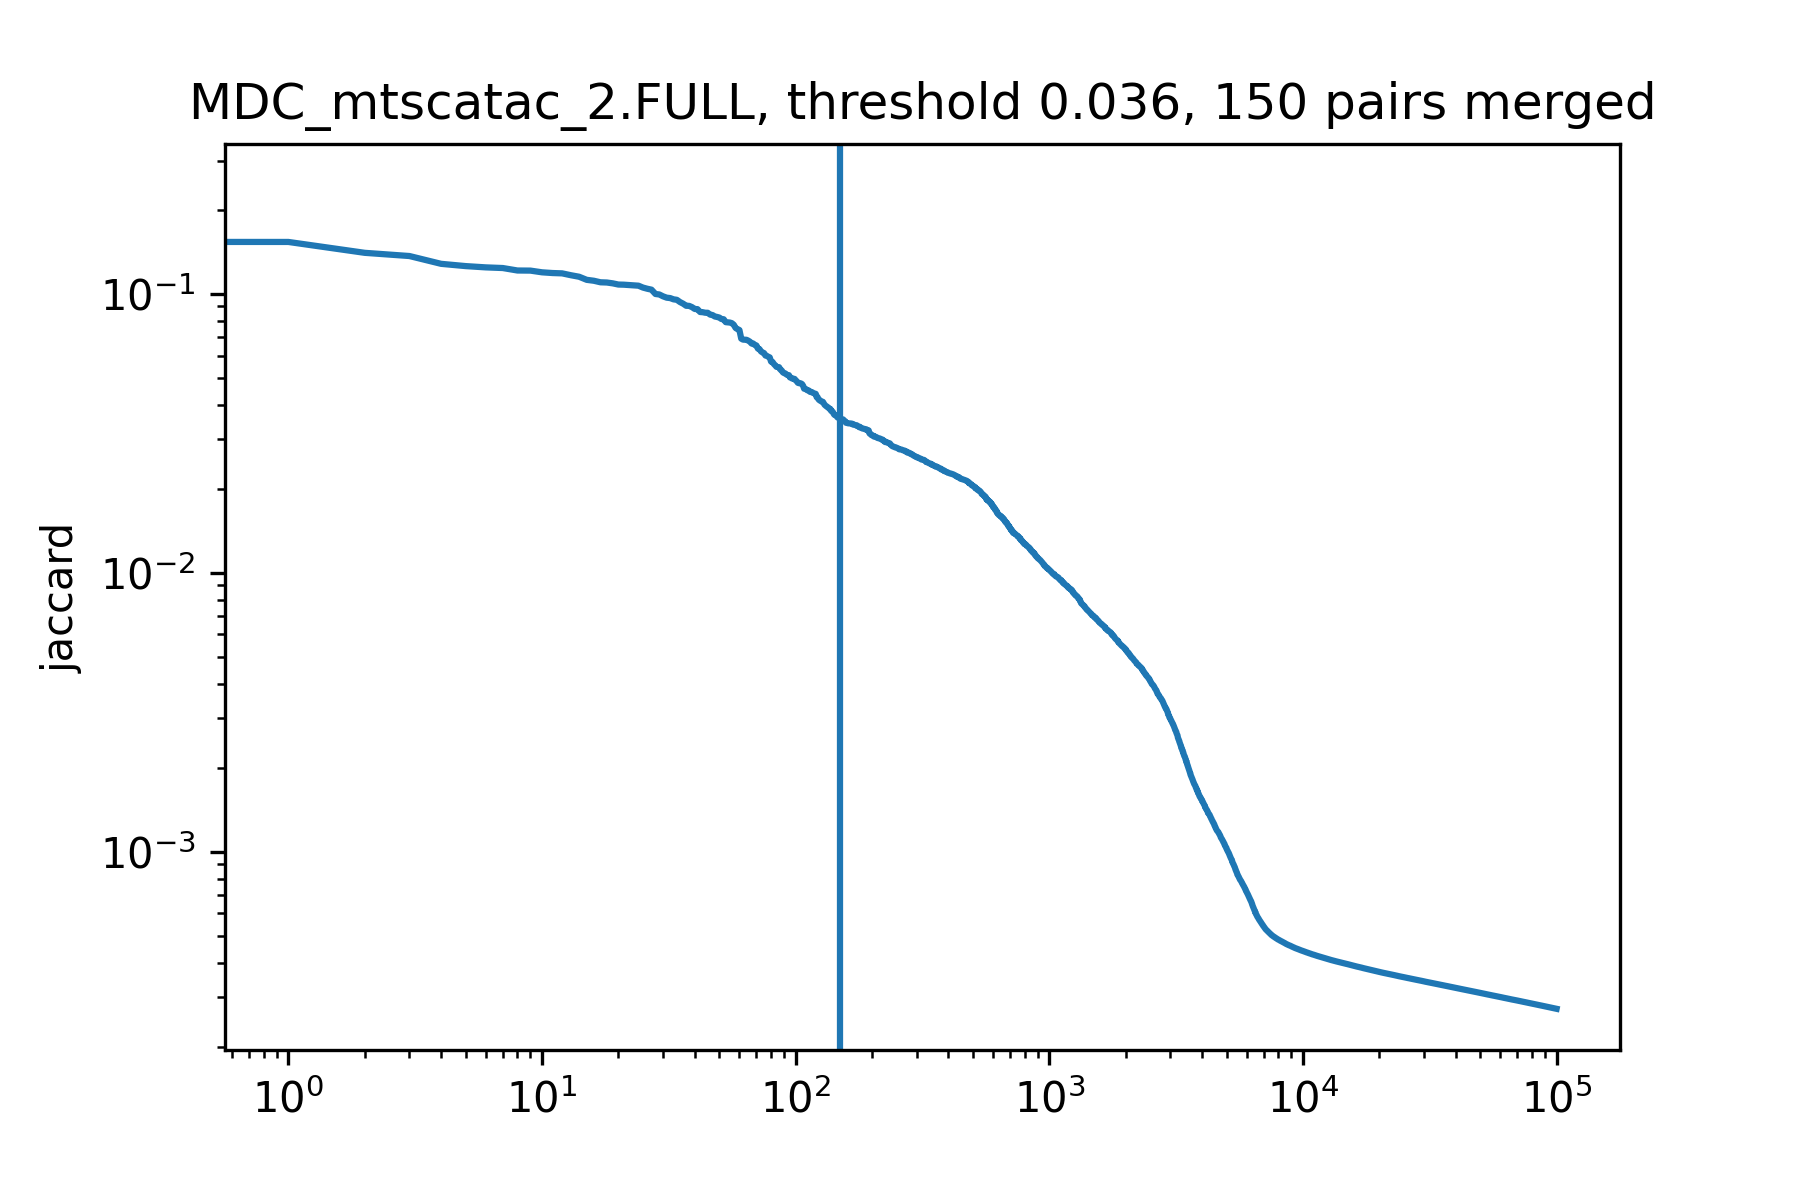

OHS_s3atac_1.FULL
plts_scratch/OHS_s3atac_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


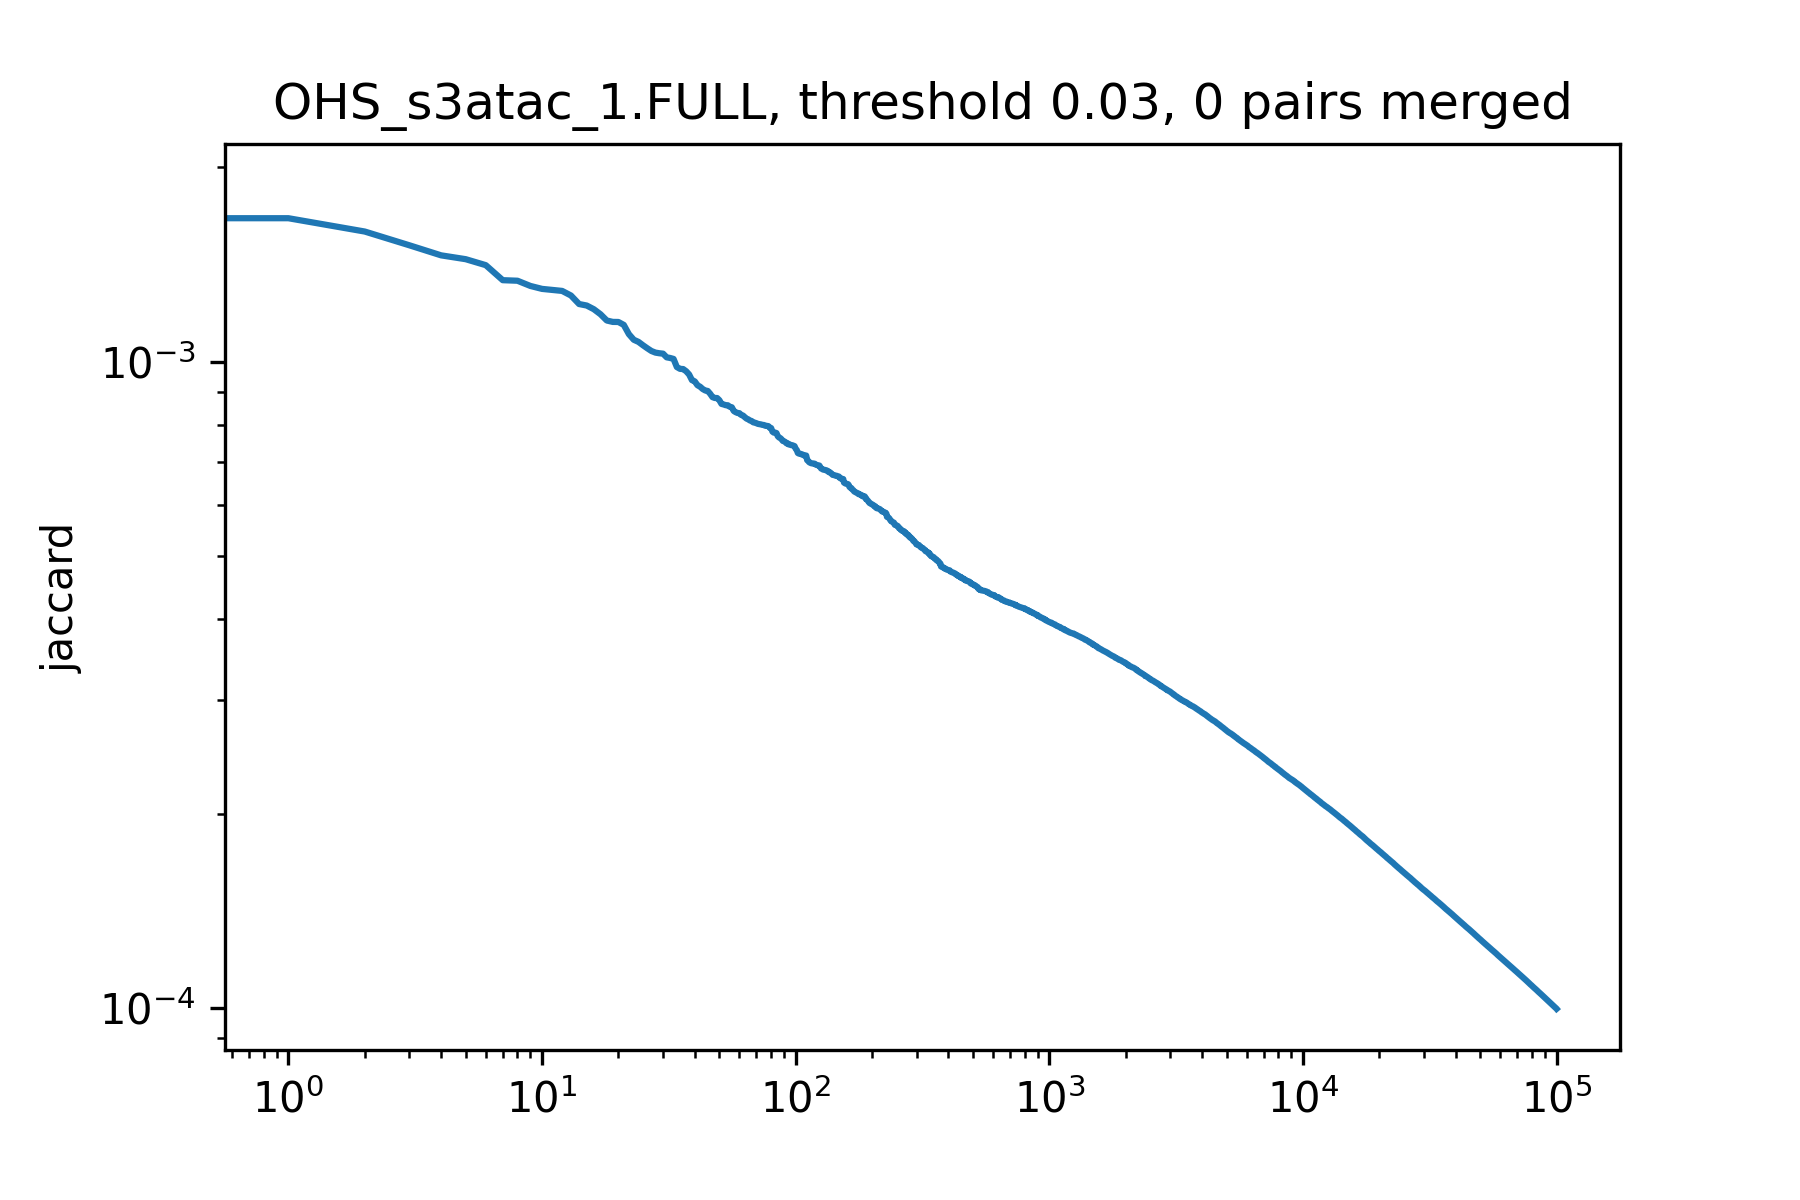

OHS_s3atac_2.FULL
plts_scratch/OHS_s3atac_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


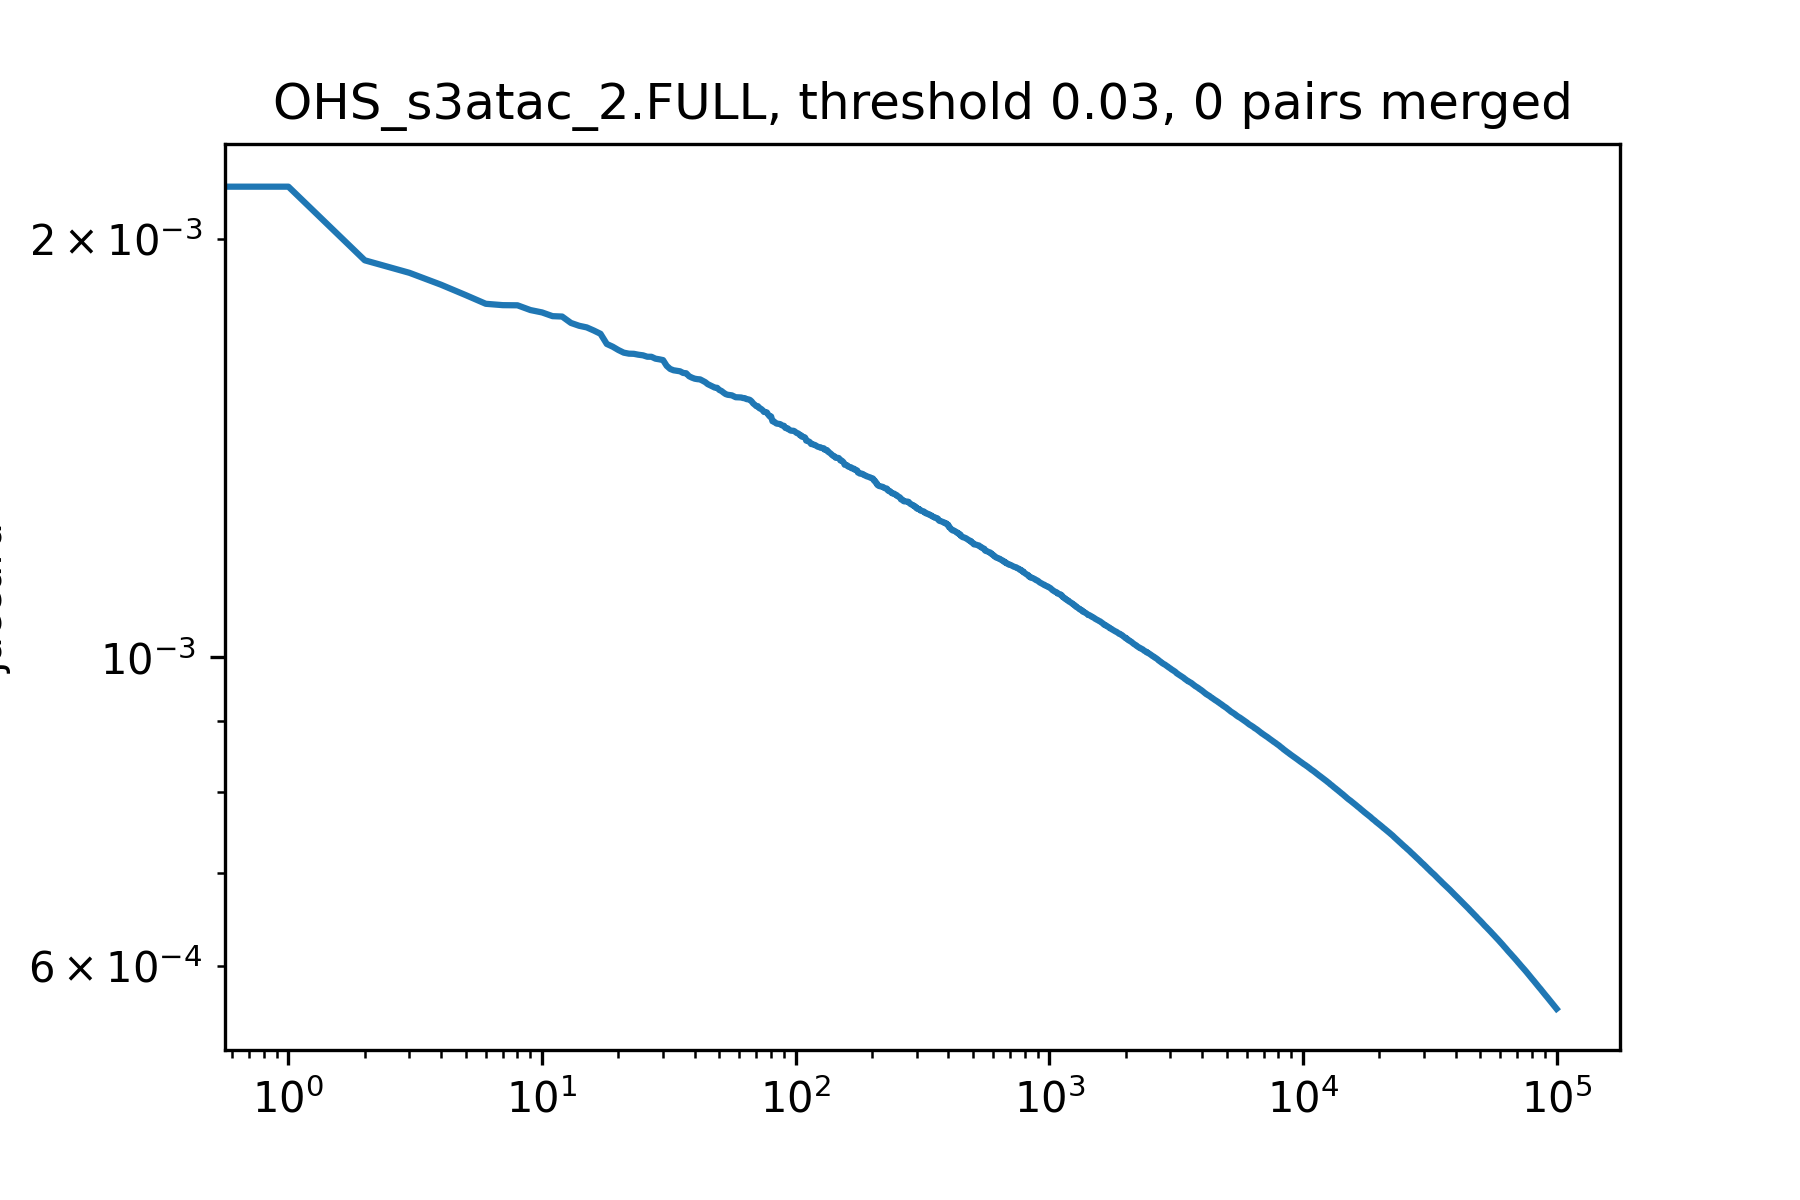

SAN_10xmultiome_1.FULL
plts_scratch/SAN_10xmultiome_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


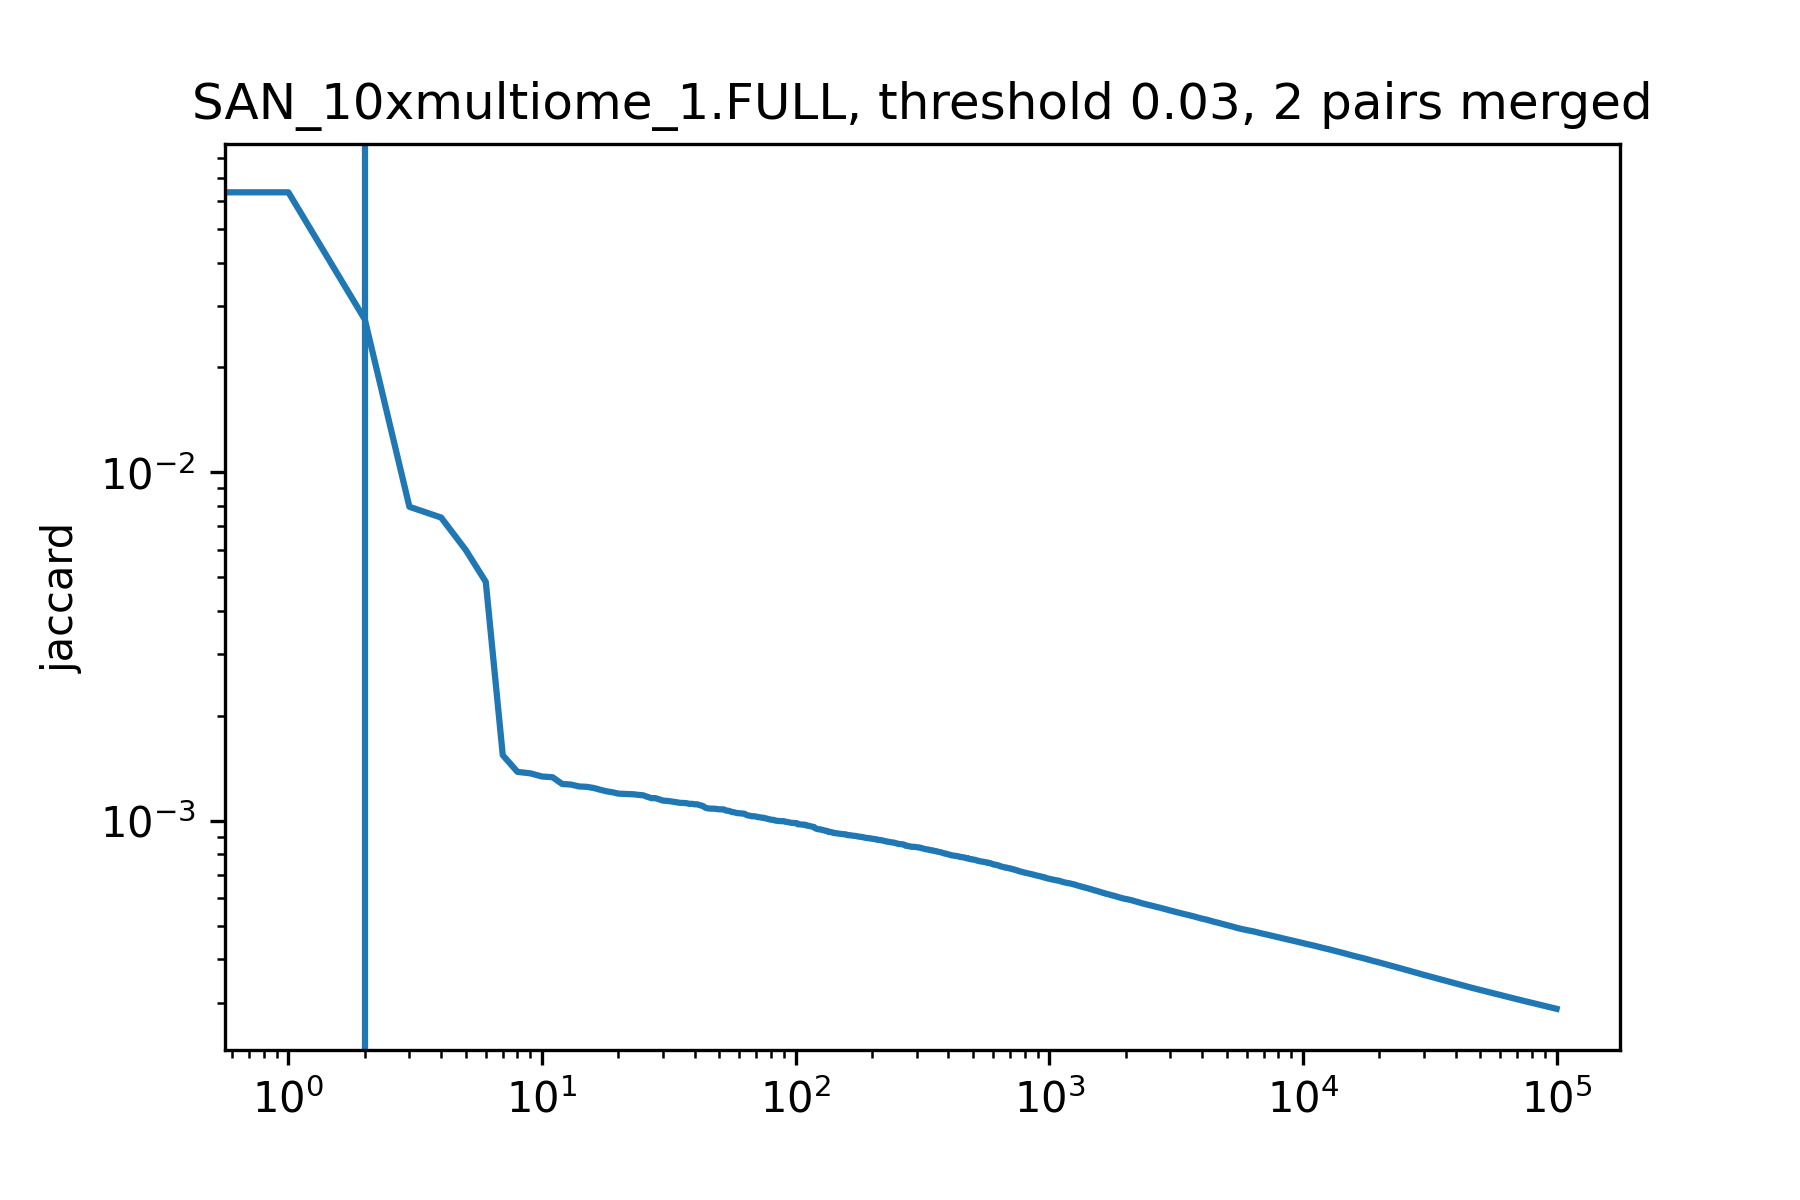

SAN_10xmultiome_2.FULL
plts_scratch/SAN_10xmultiome_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


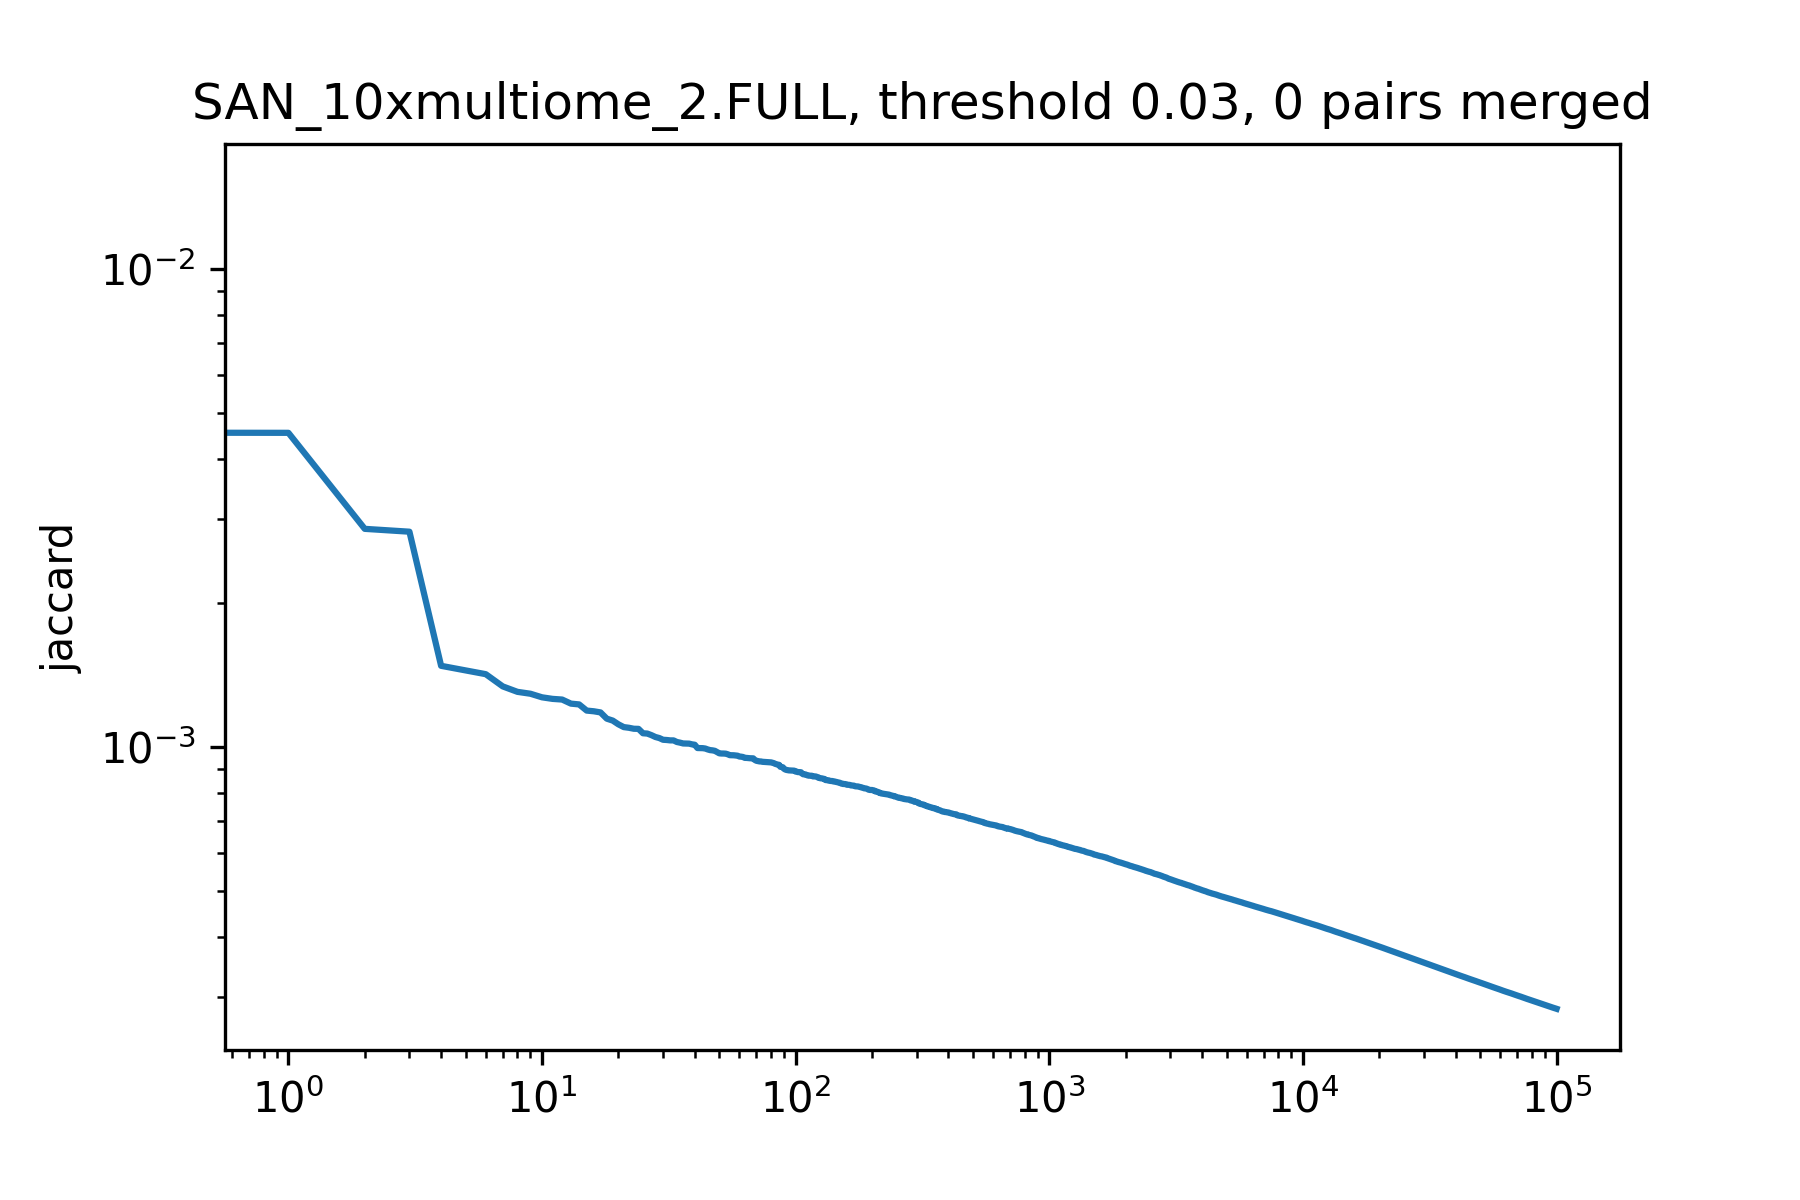

STA_10xv11_1.FULL
plts_scratch/STA_10xv11_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


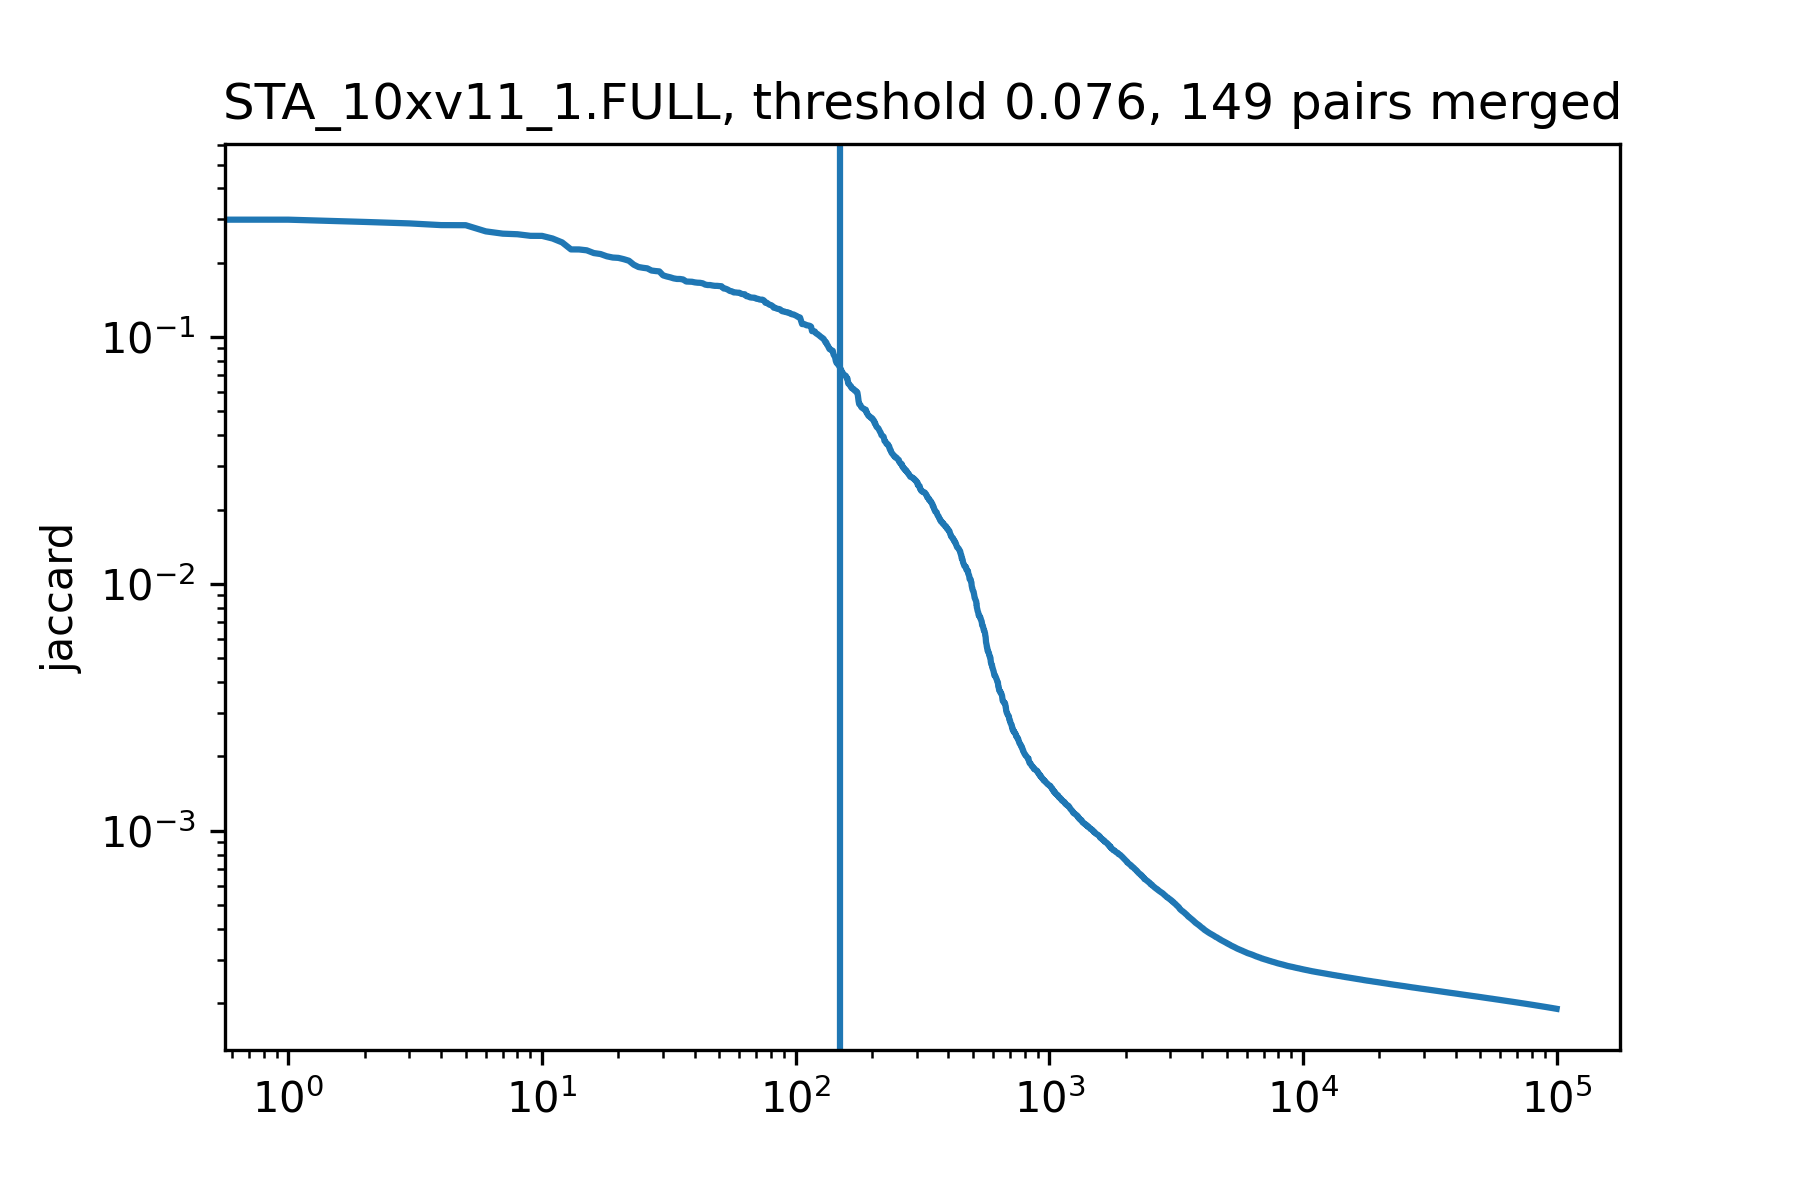

STA_10xv11_2.FULL
plts_scratch/STA_10xv11_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


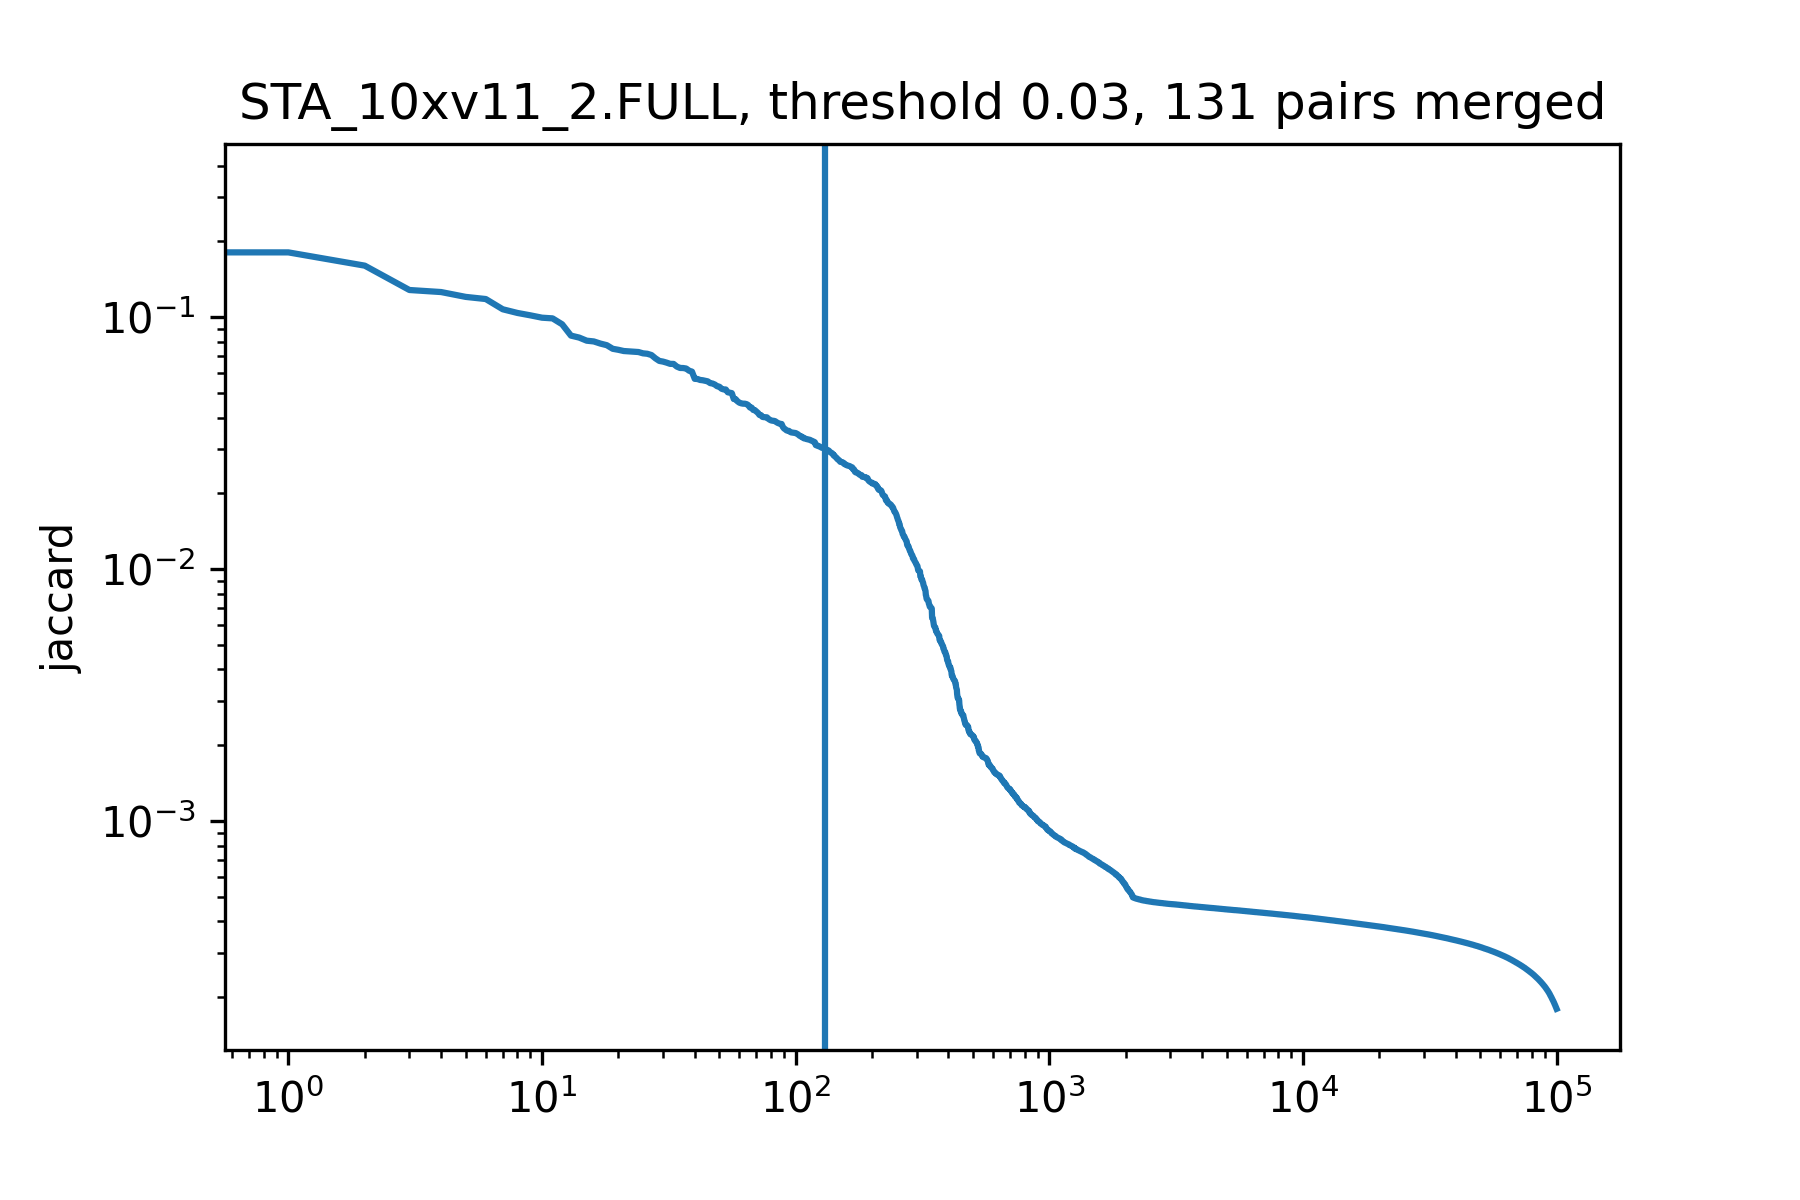

TXG_10xv11_1.FULL
plts_scratch/TXG_10xv11_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


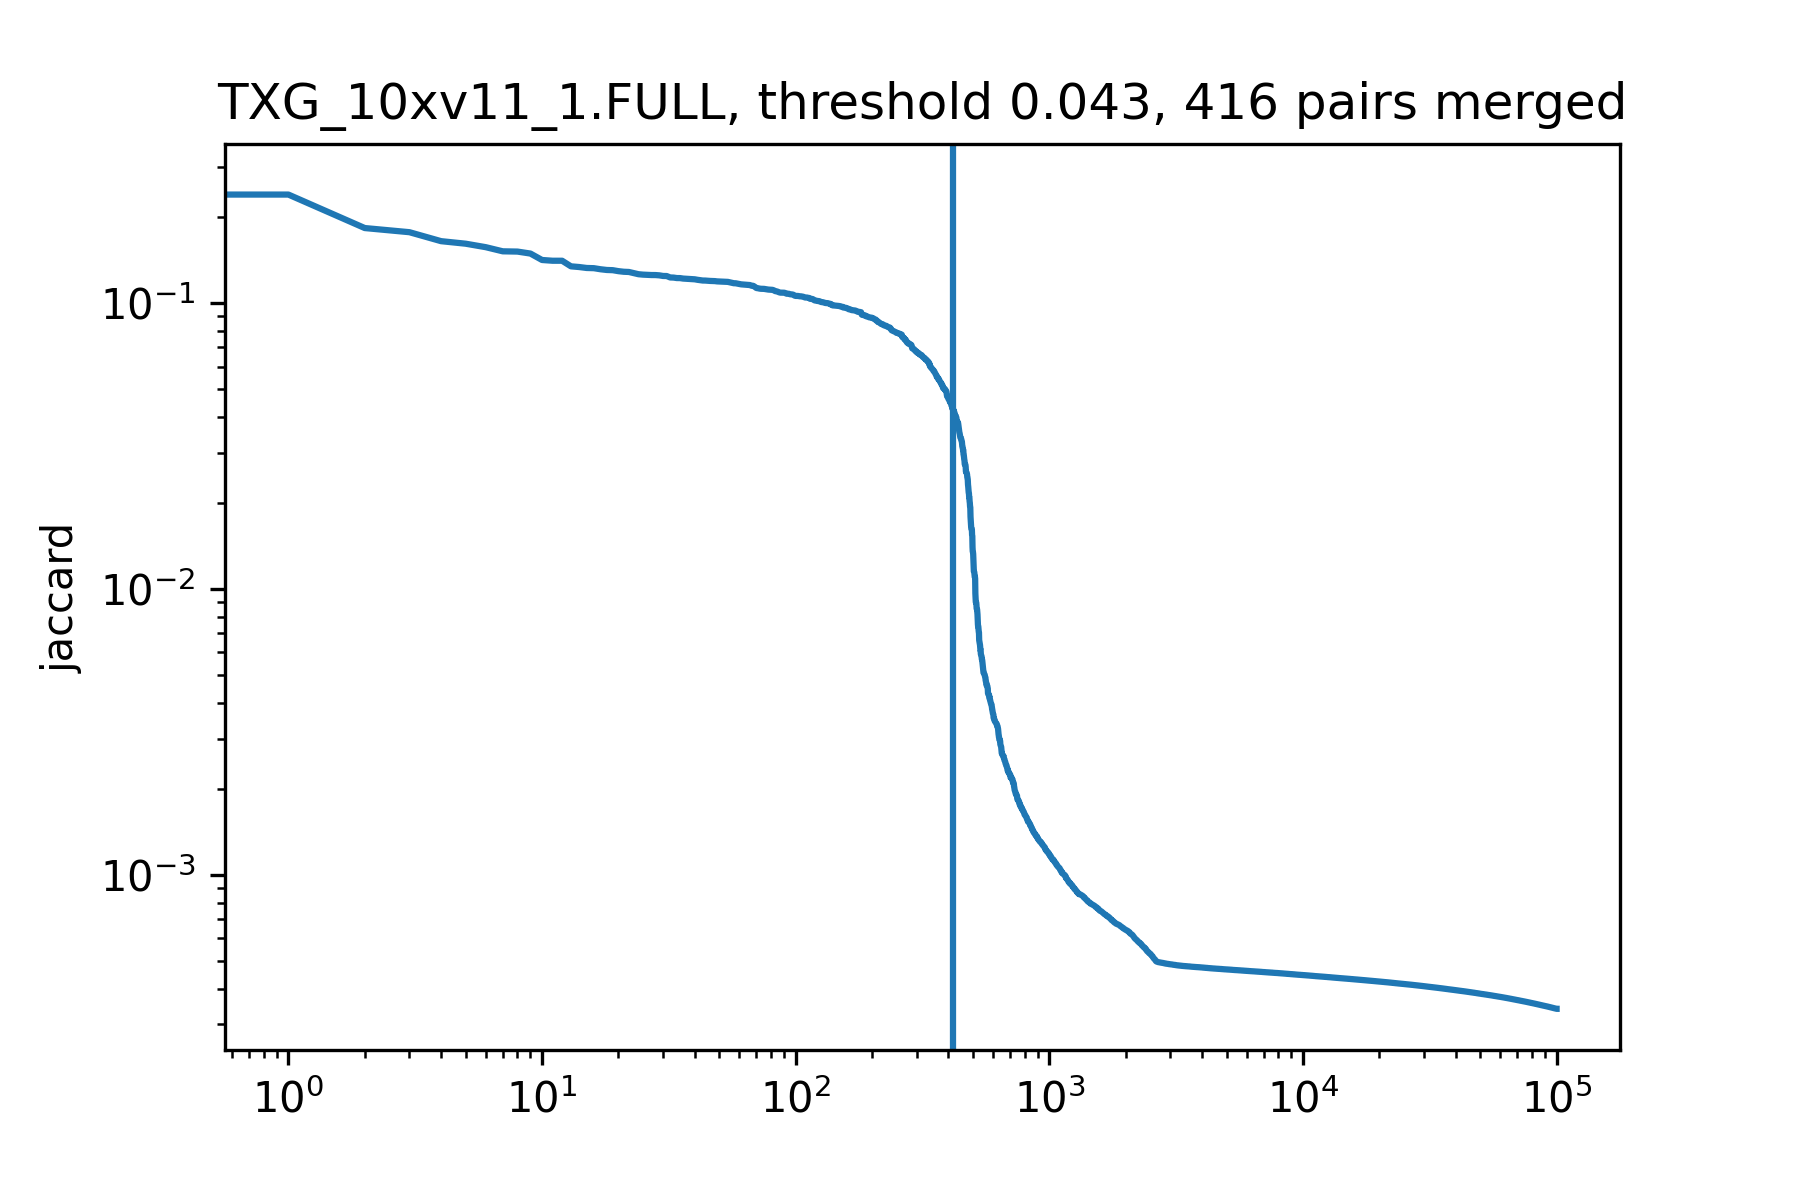

TXG_10xv2_1.FULL
plts_scratch/TXG_10xv2_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


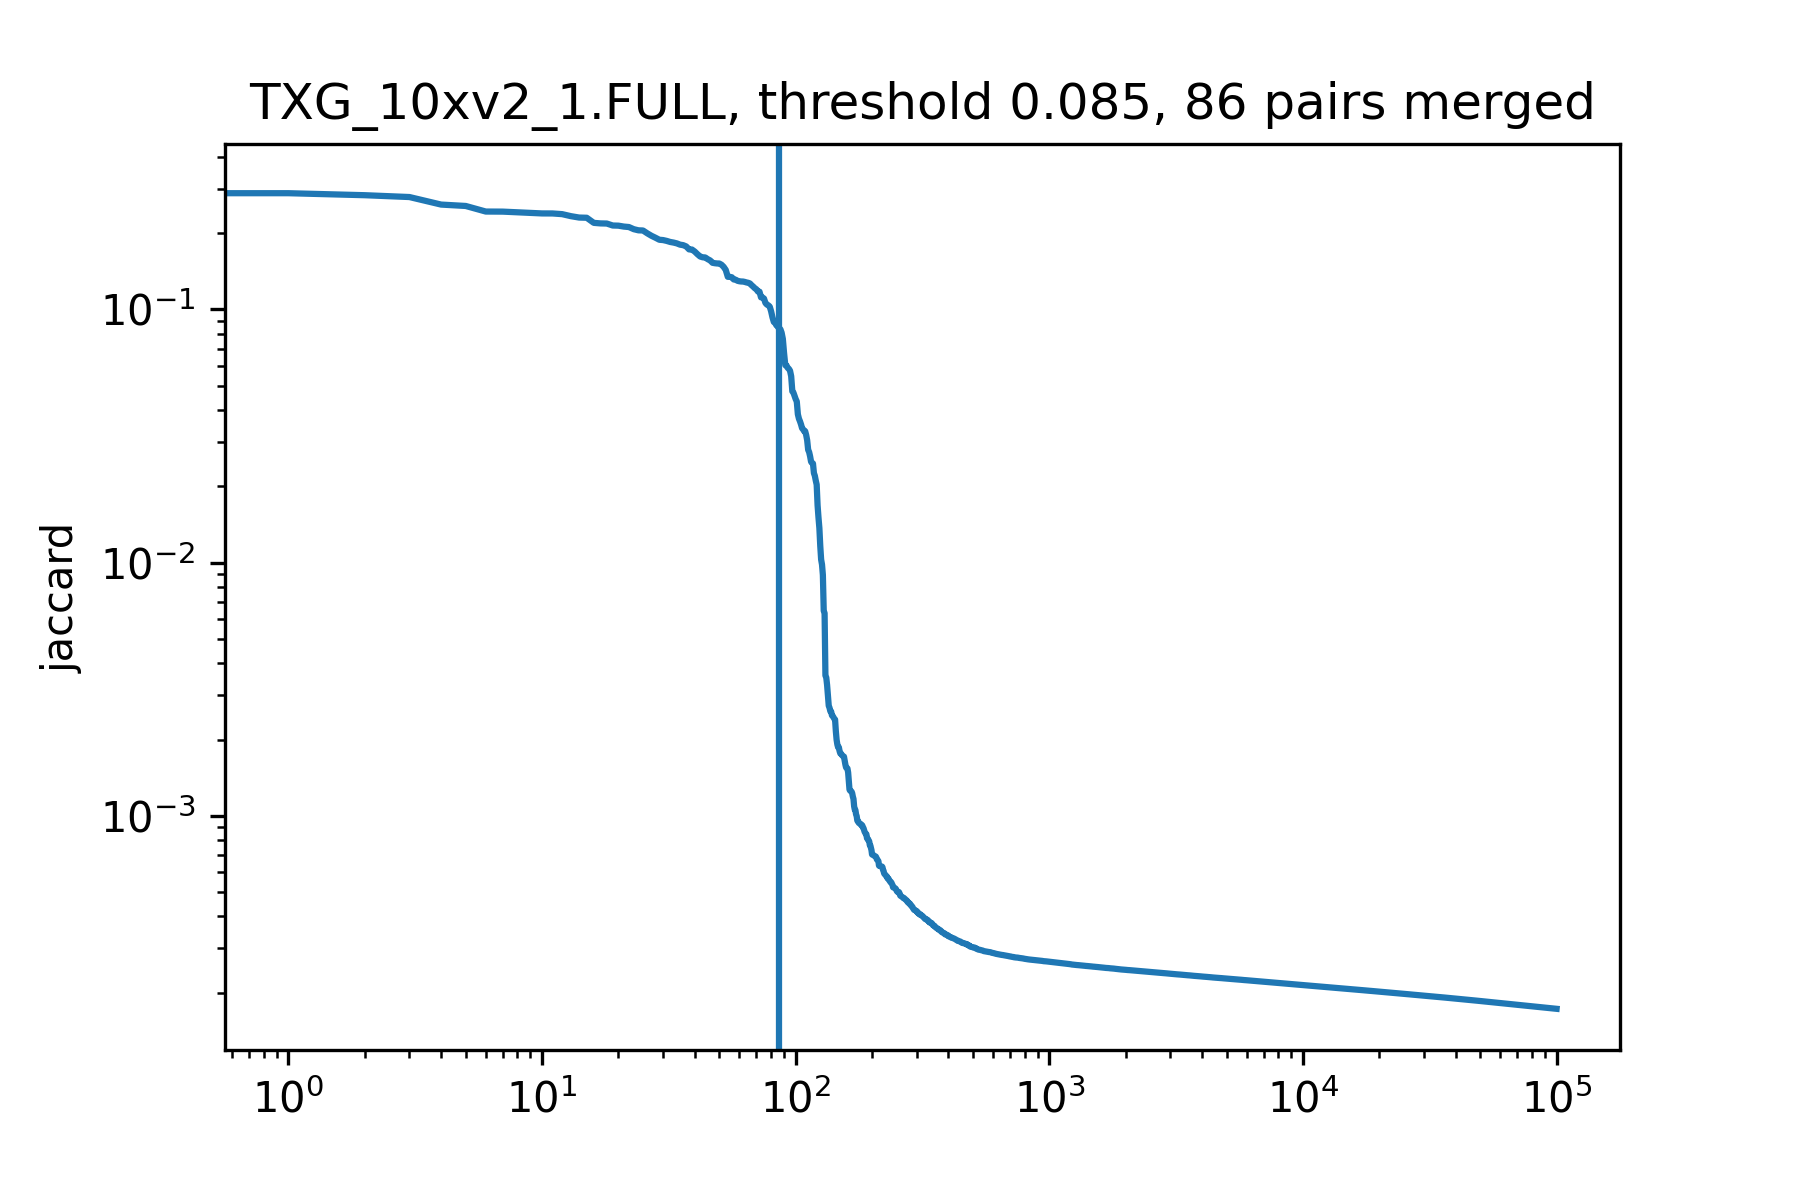

TXG_10xv2_2.FULL
plts_scratch/TXG_10xv2_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


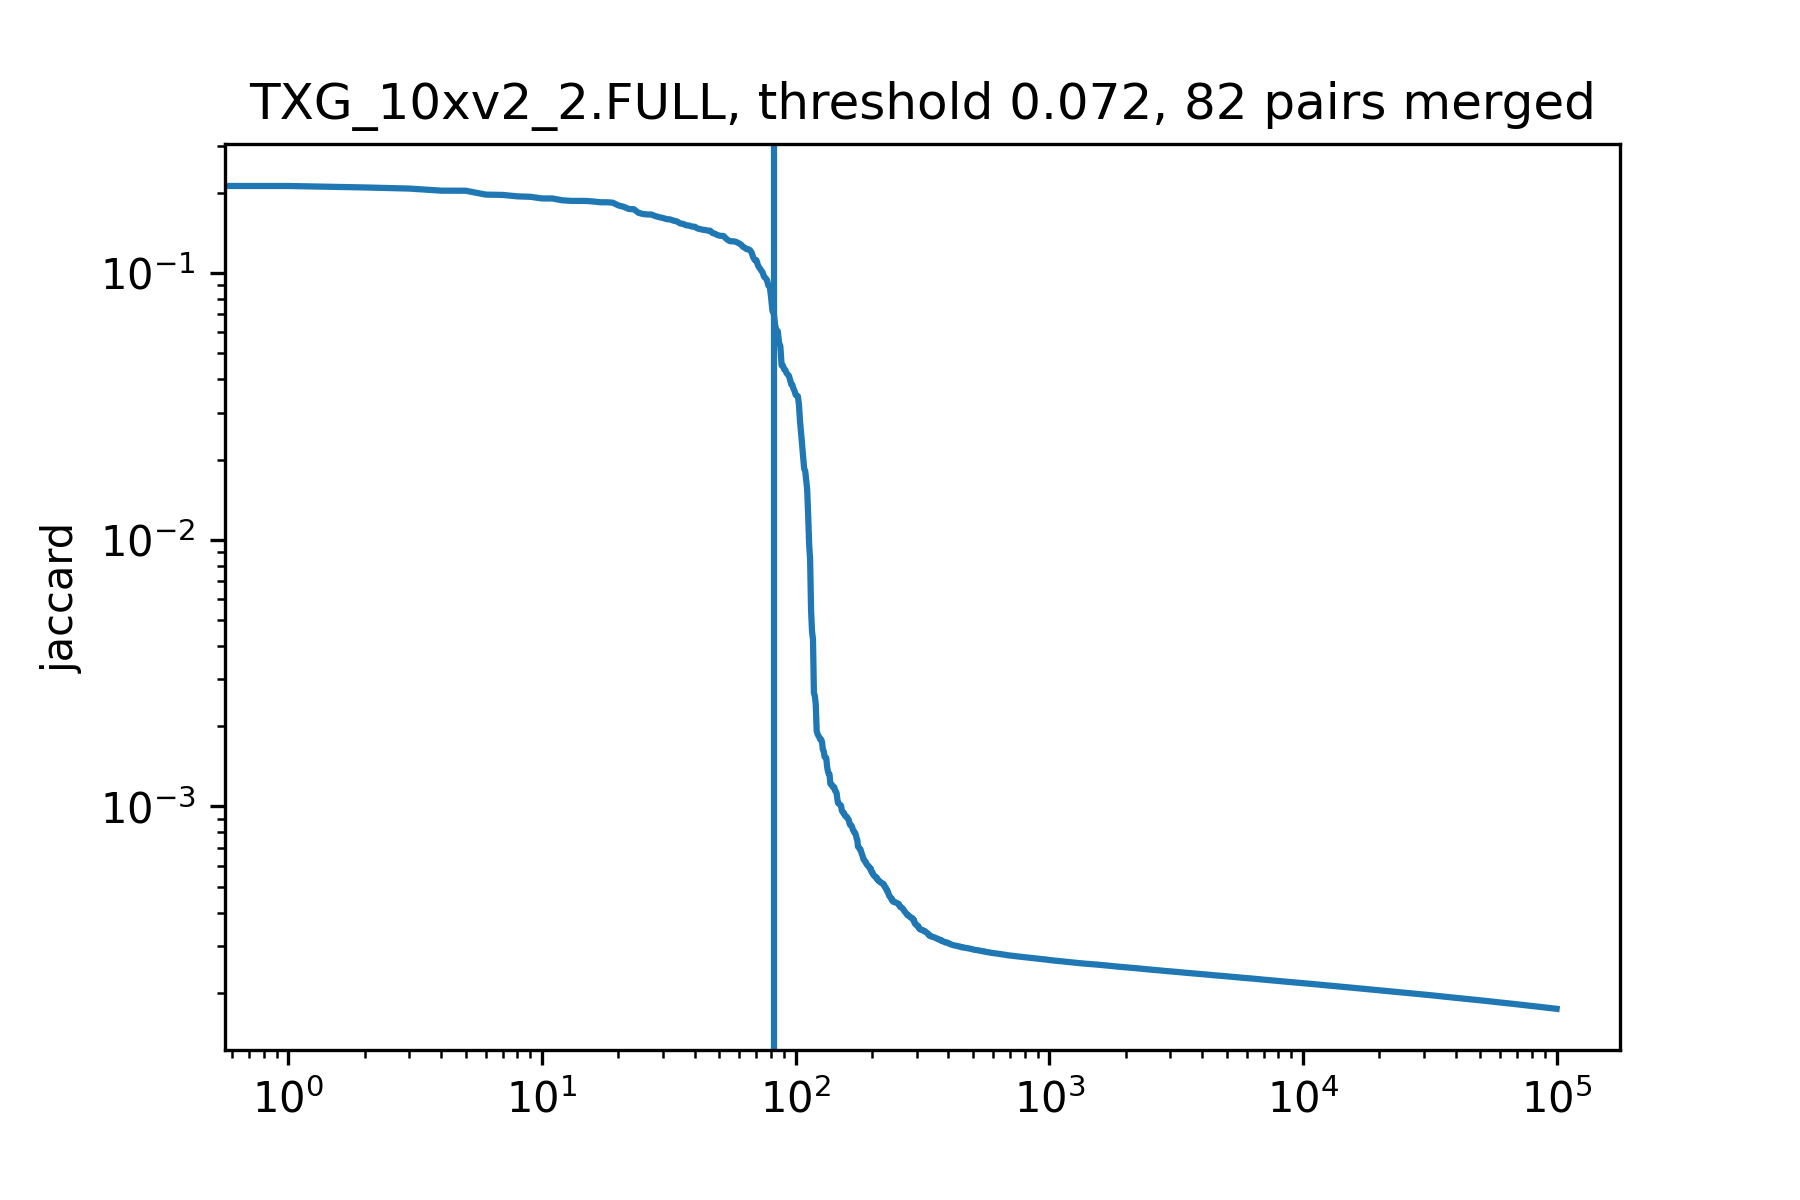

UCS_ddseq_1.FULL
plts_scratch/UCS_ddseq_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


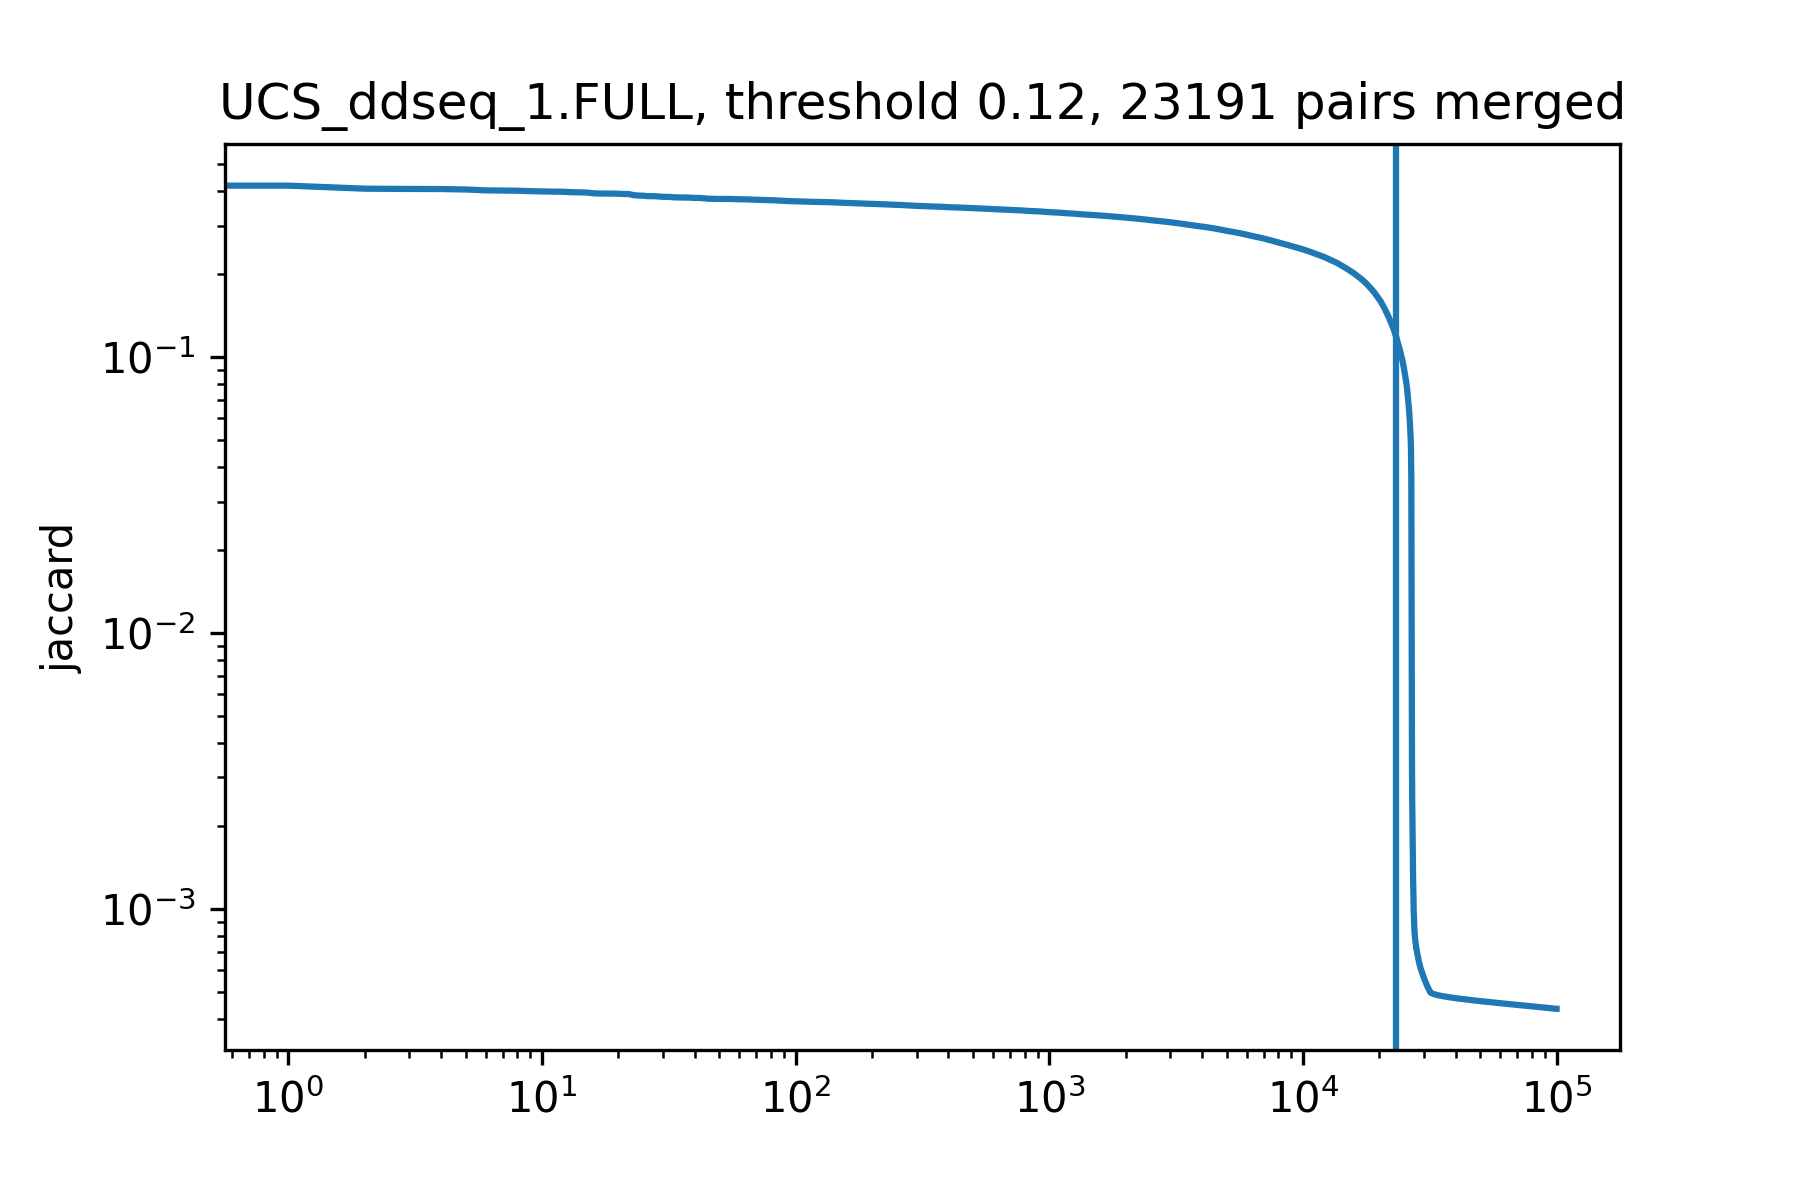

UCS_ddseq_2.FULL
plts_scratch/UCS_ddseq_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


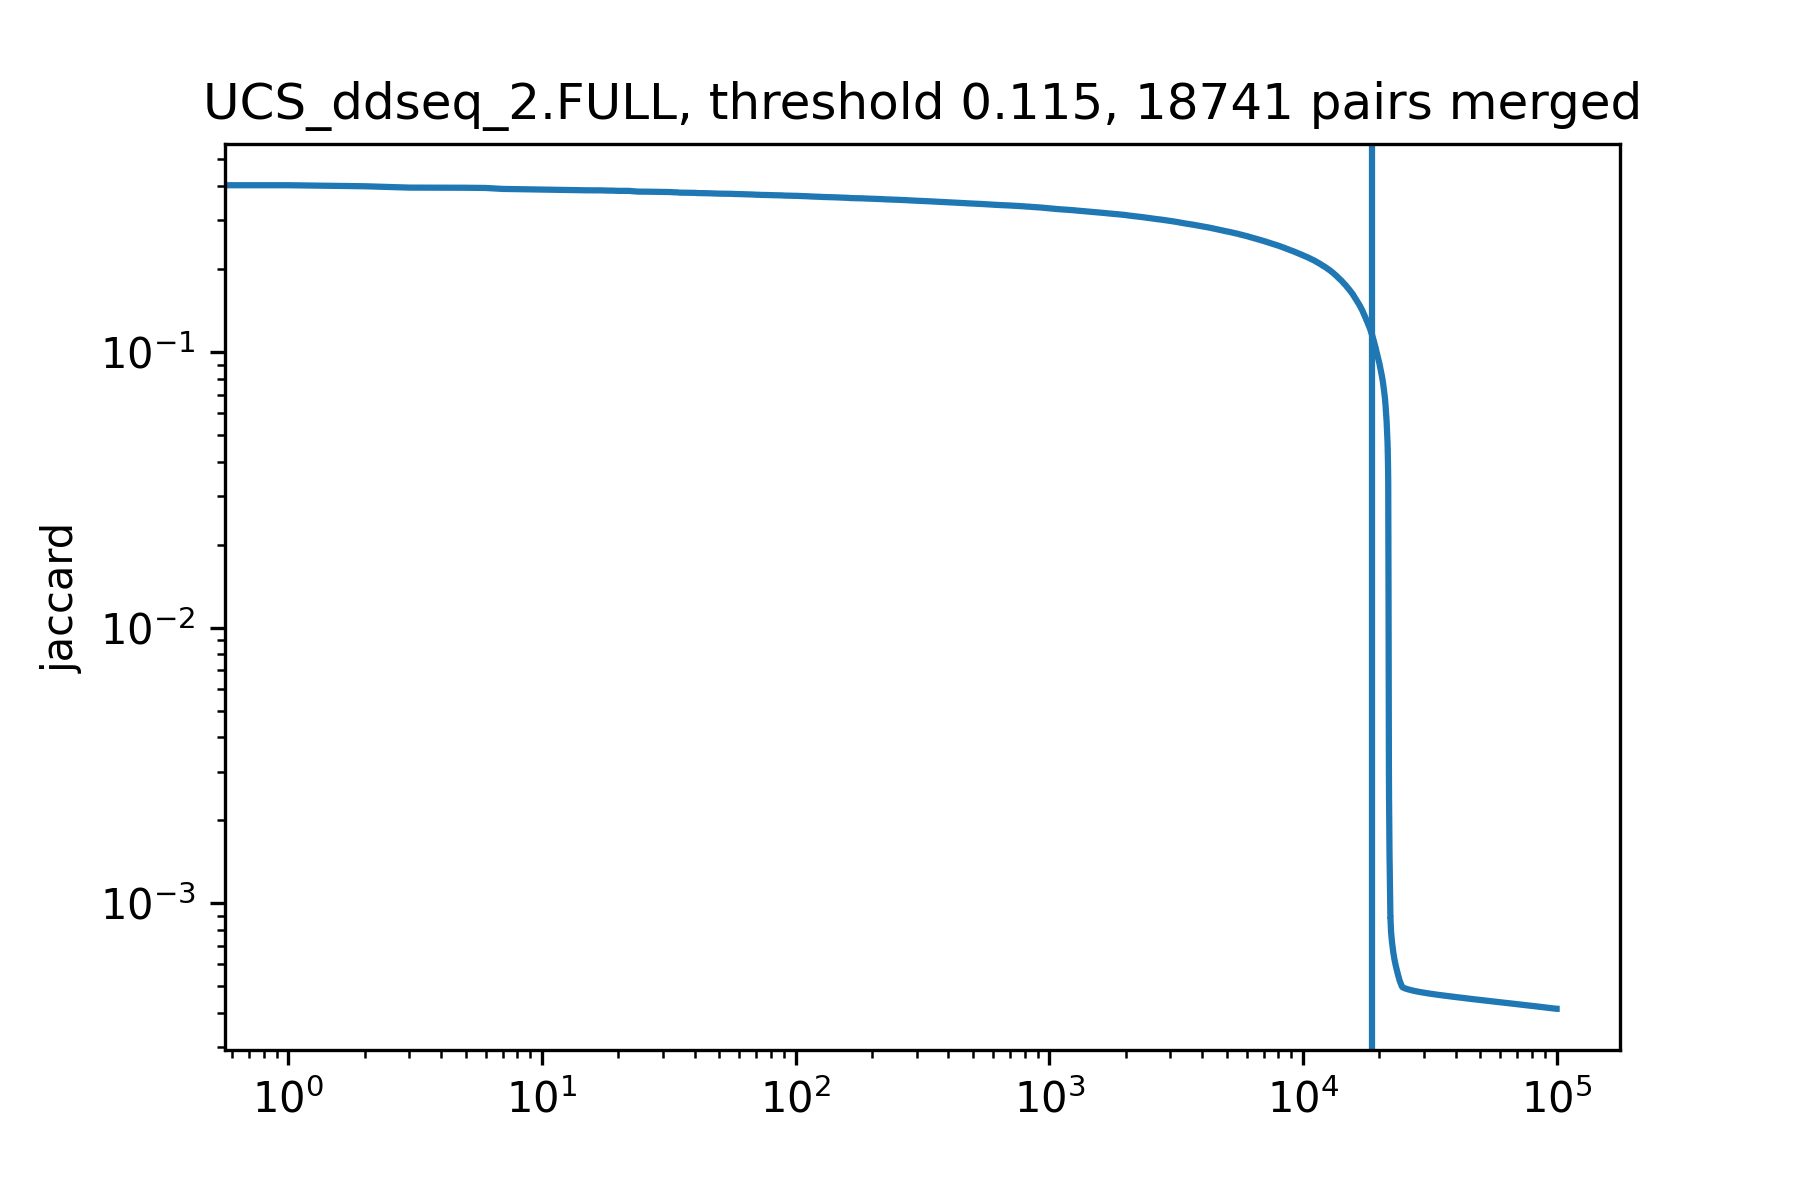

VIB_10xmultiome_1.FULL
plts_scratch/VIB_10xmultiome_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


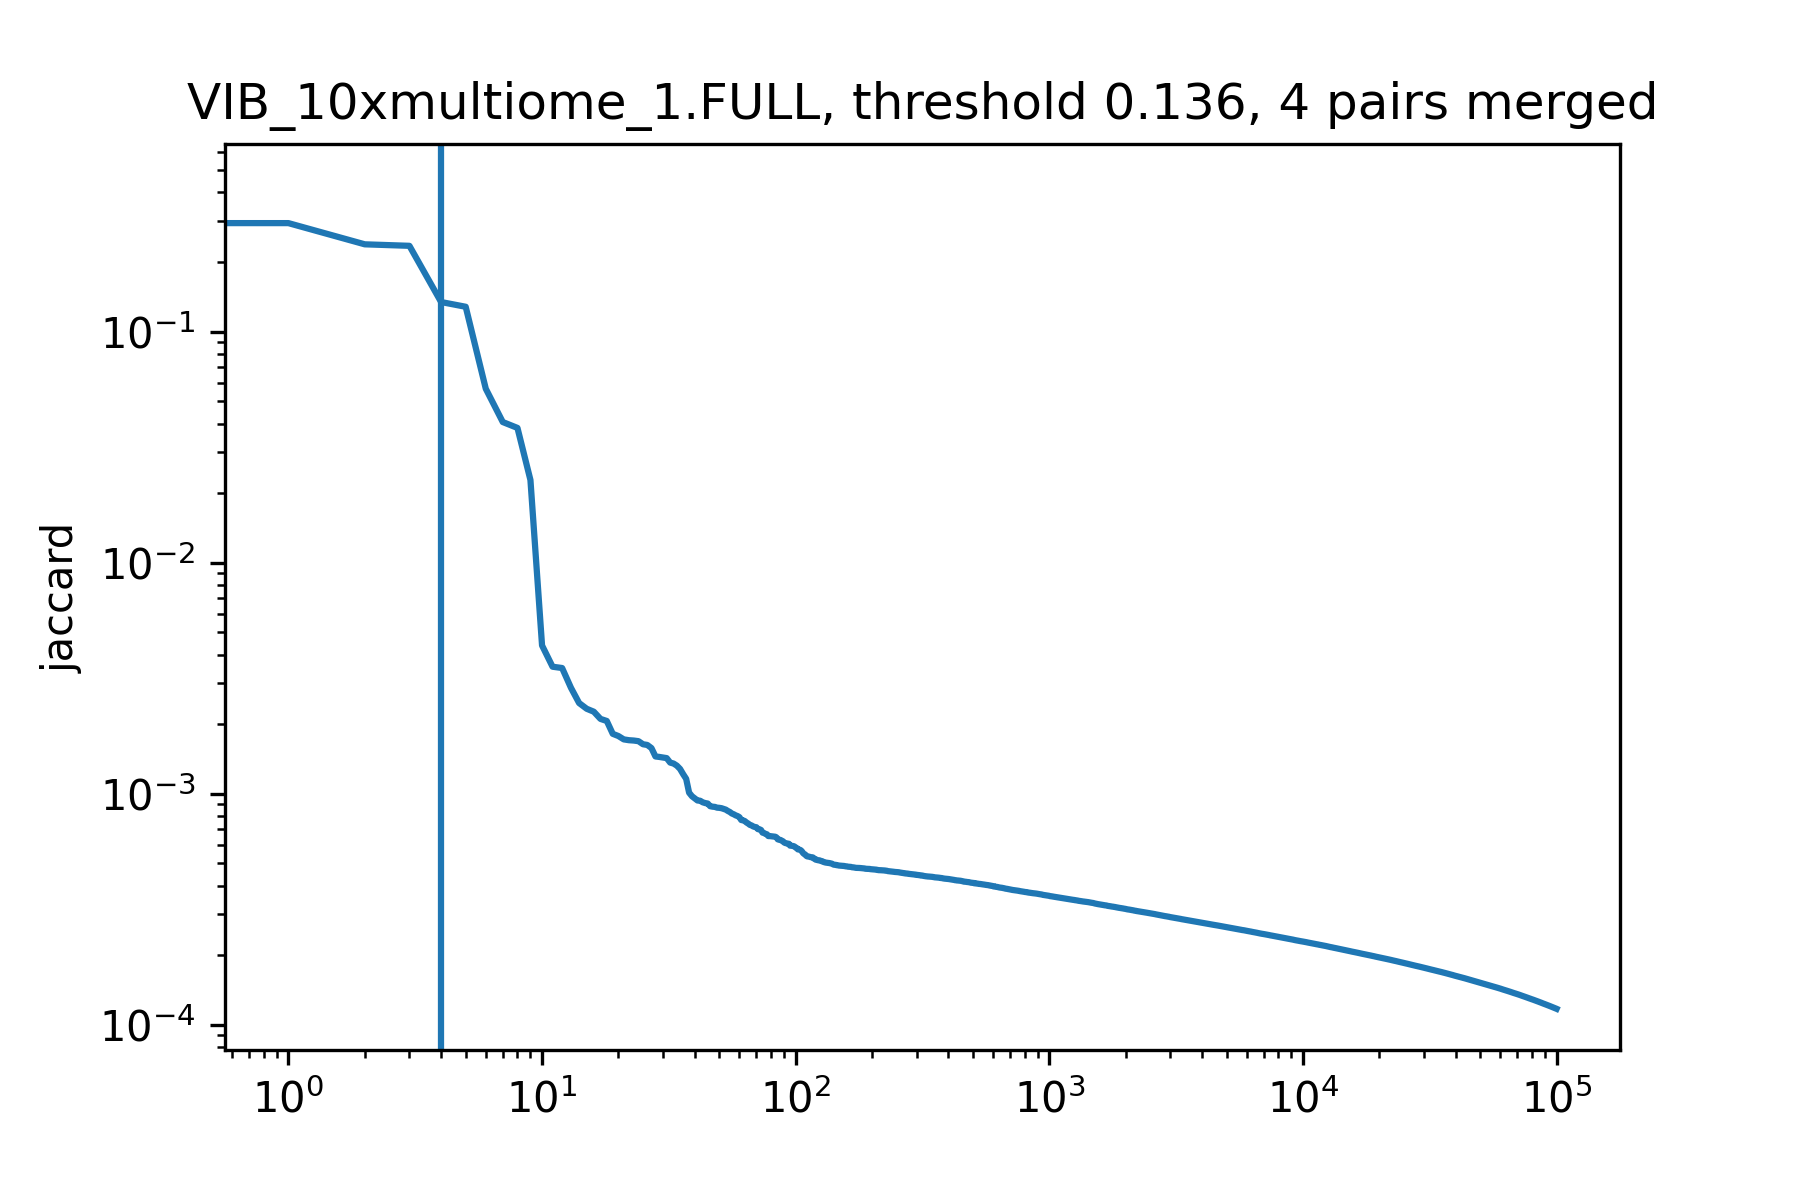

VIB_10xmultiome_2.FULL
plts_scratch/VIB_10xmultiome_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


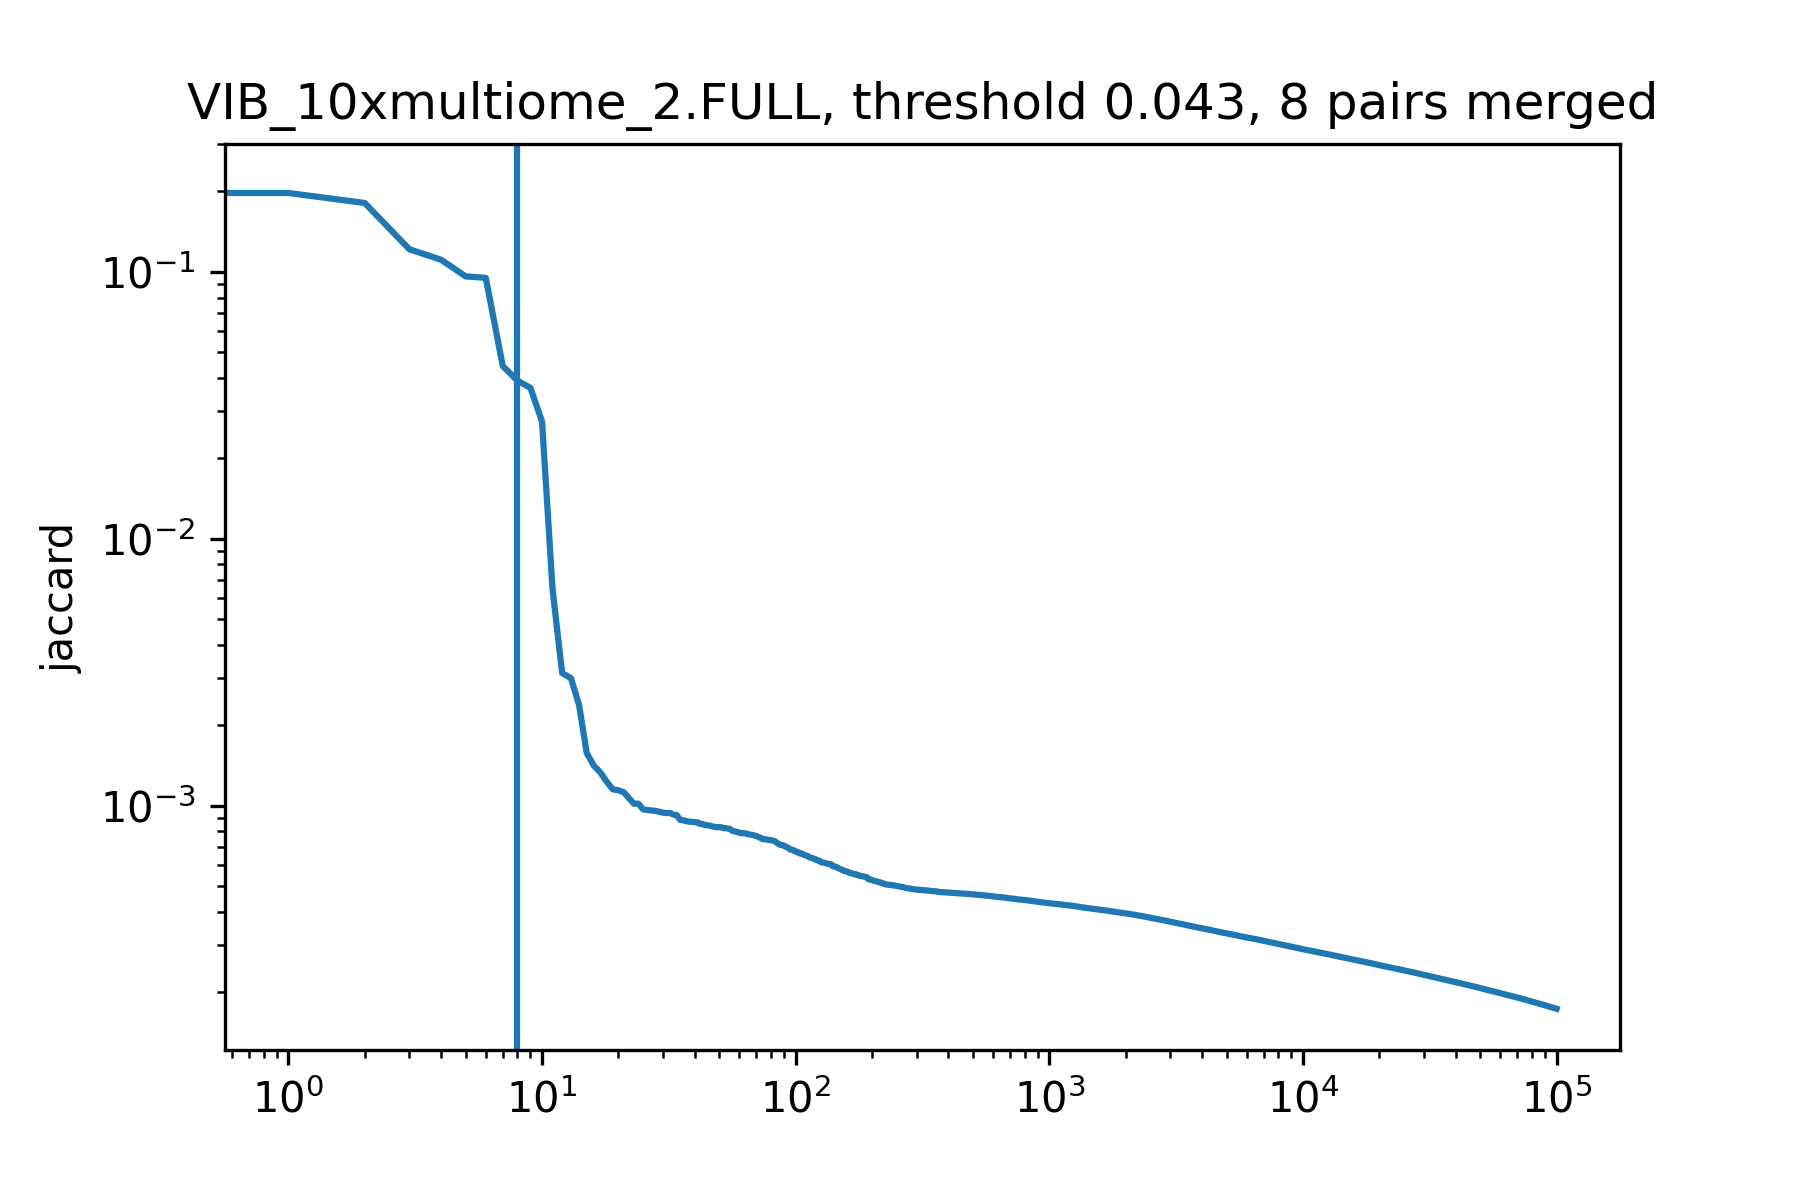

VIB_10xv1_1.FULL
plts_scratch/VIB_10xv1_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


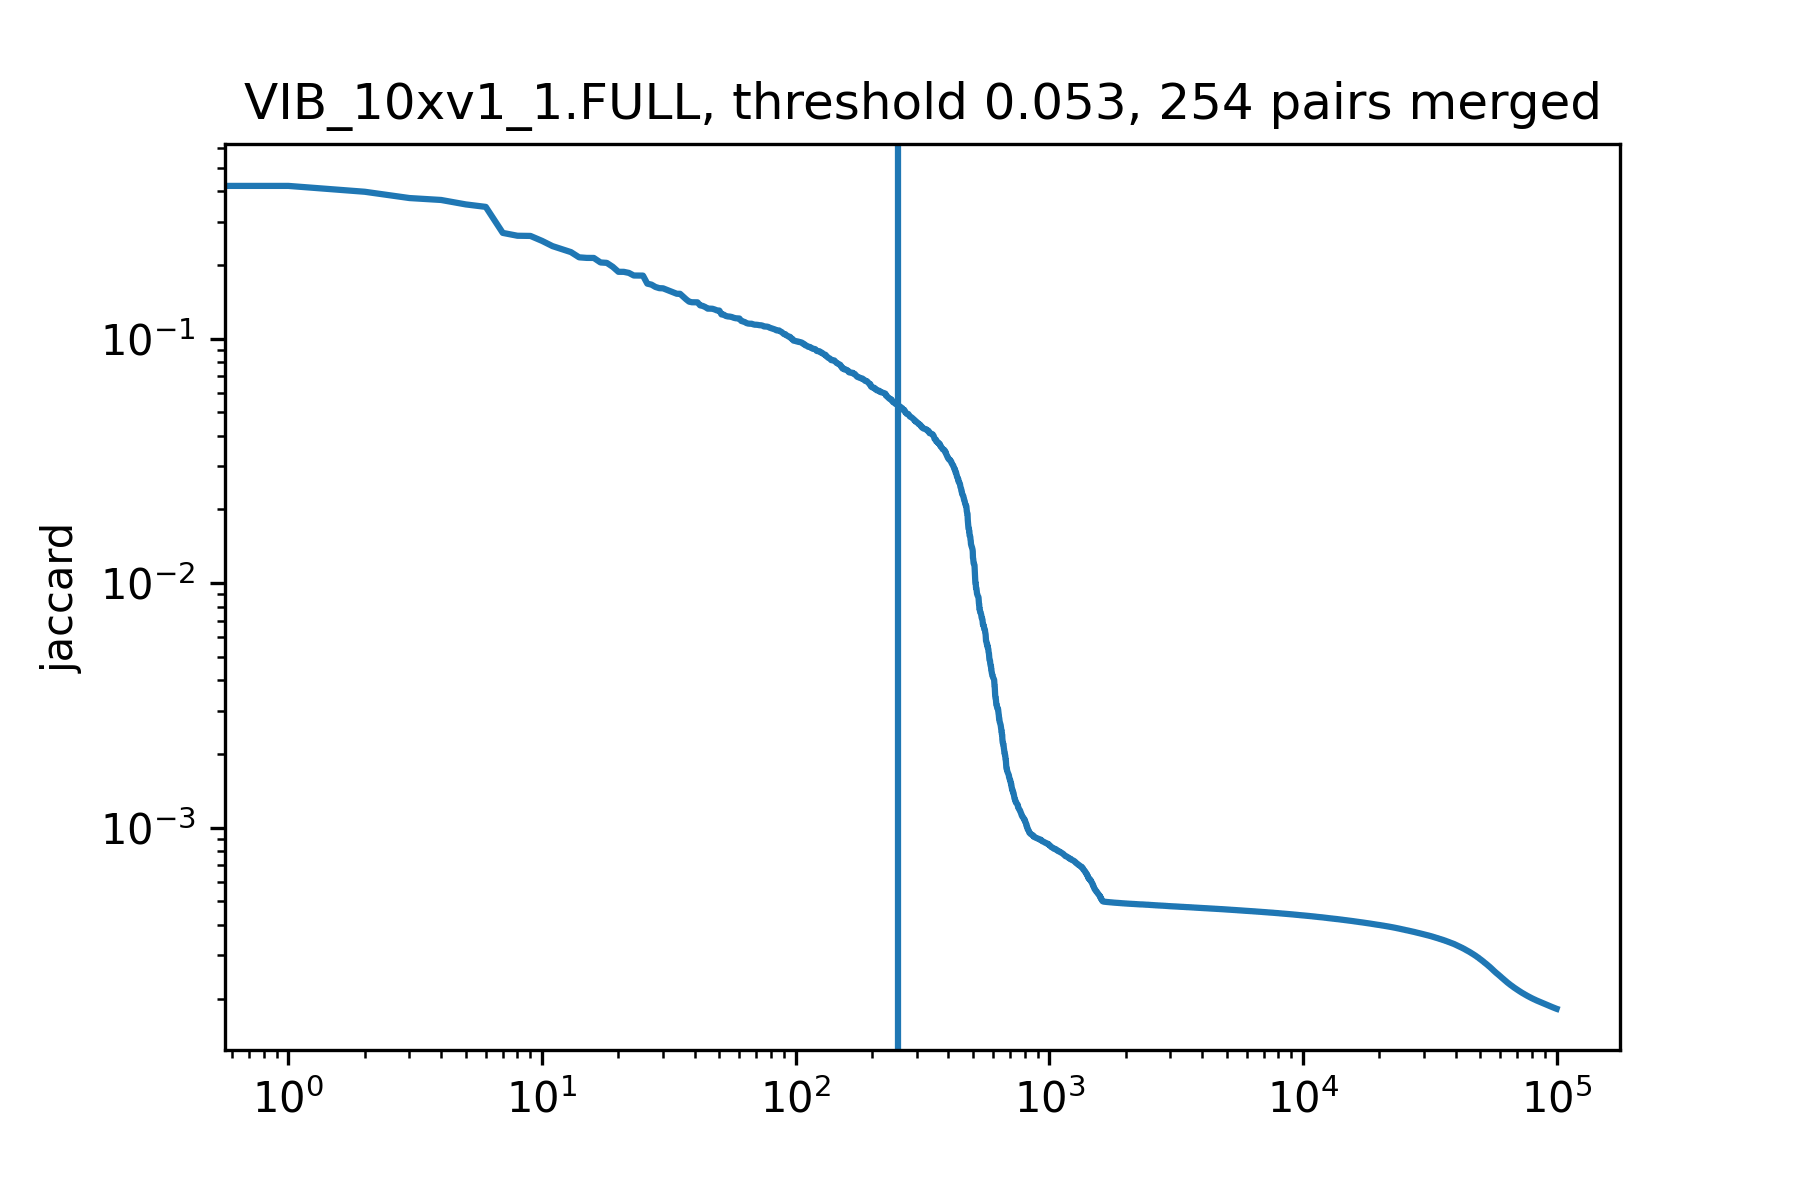

VIB_10xv1_2.FULL
plts_scratch/VIB_10xv1_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


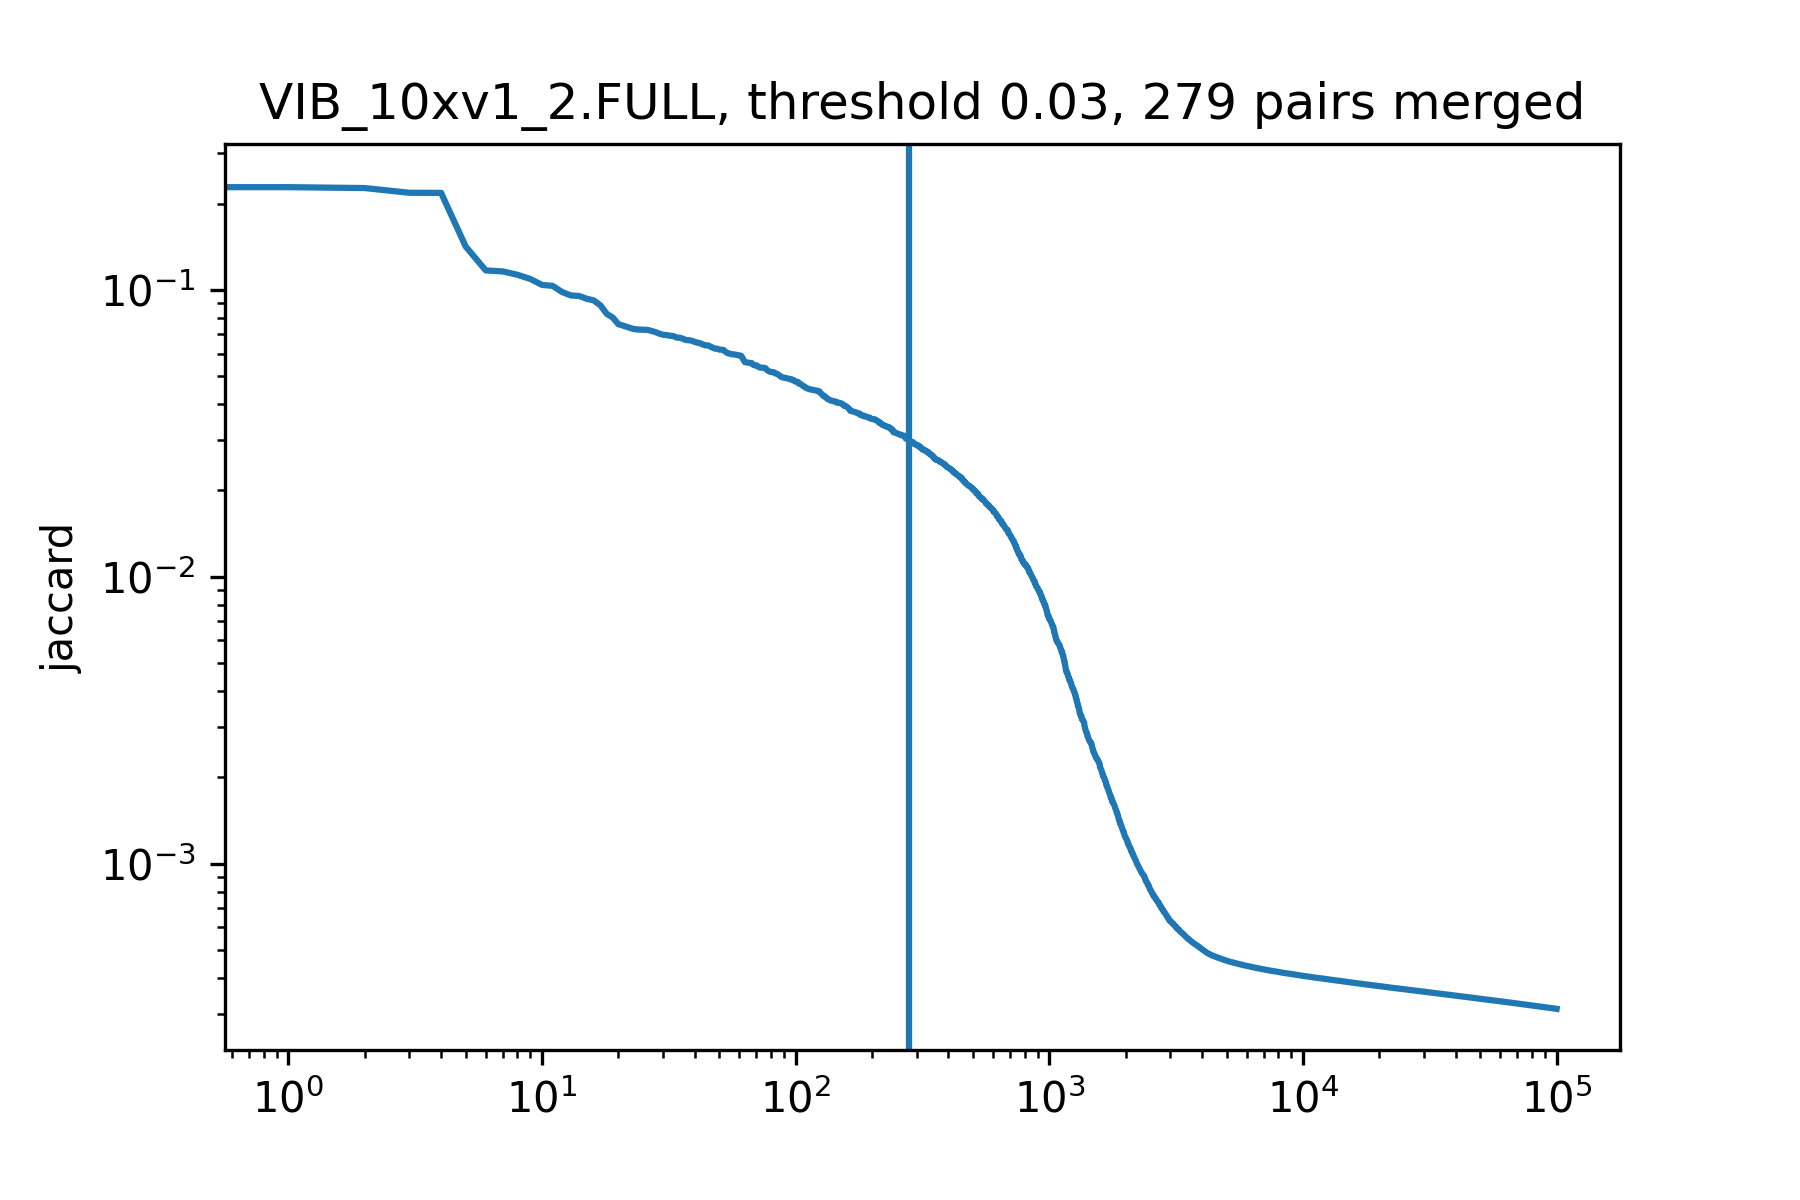

VIB_10xv2_1.FULL
plts_scratch/VIB_10xv2_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


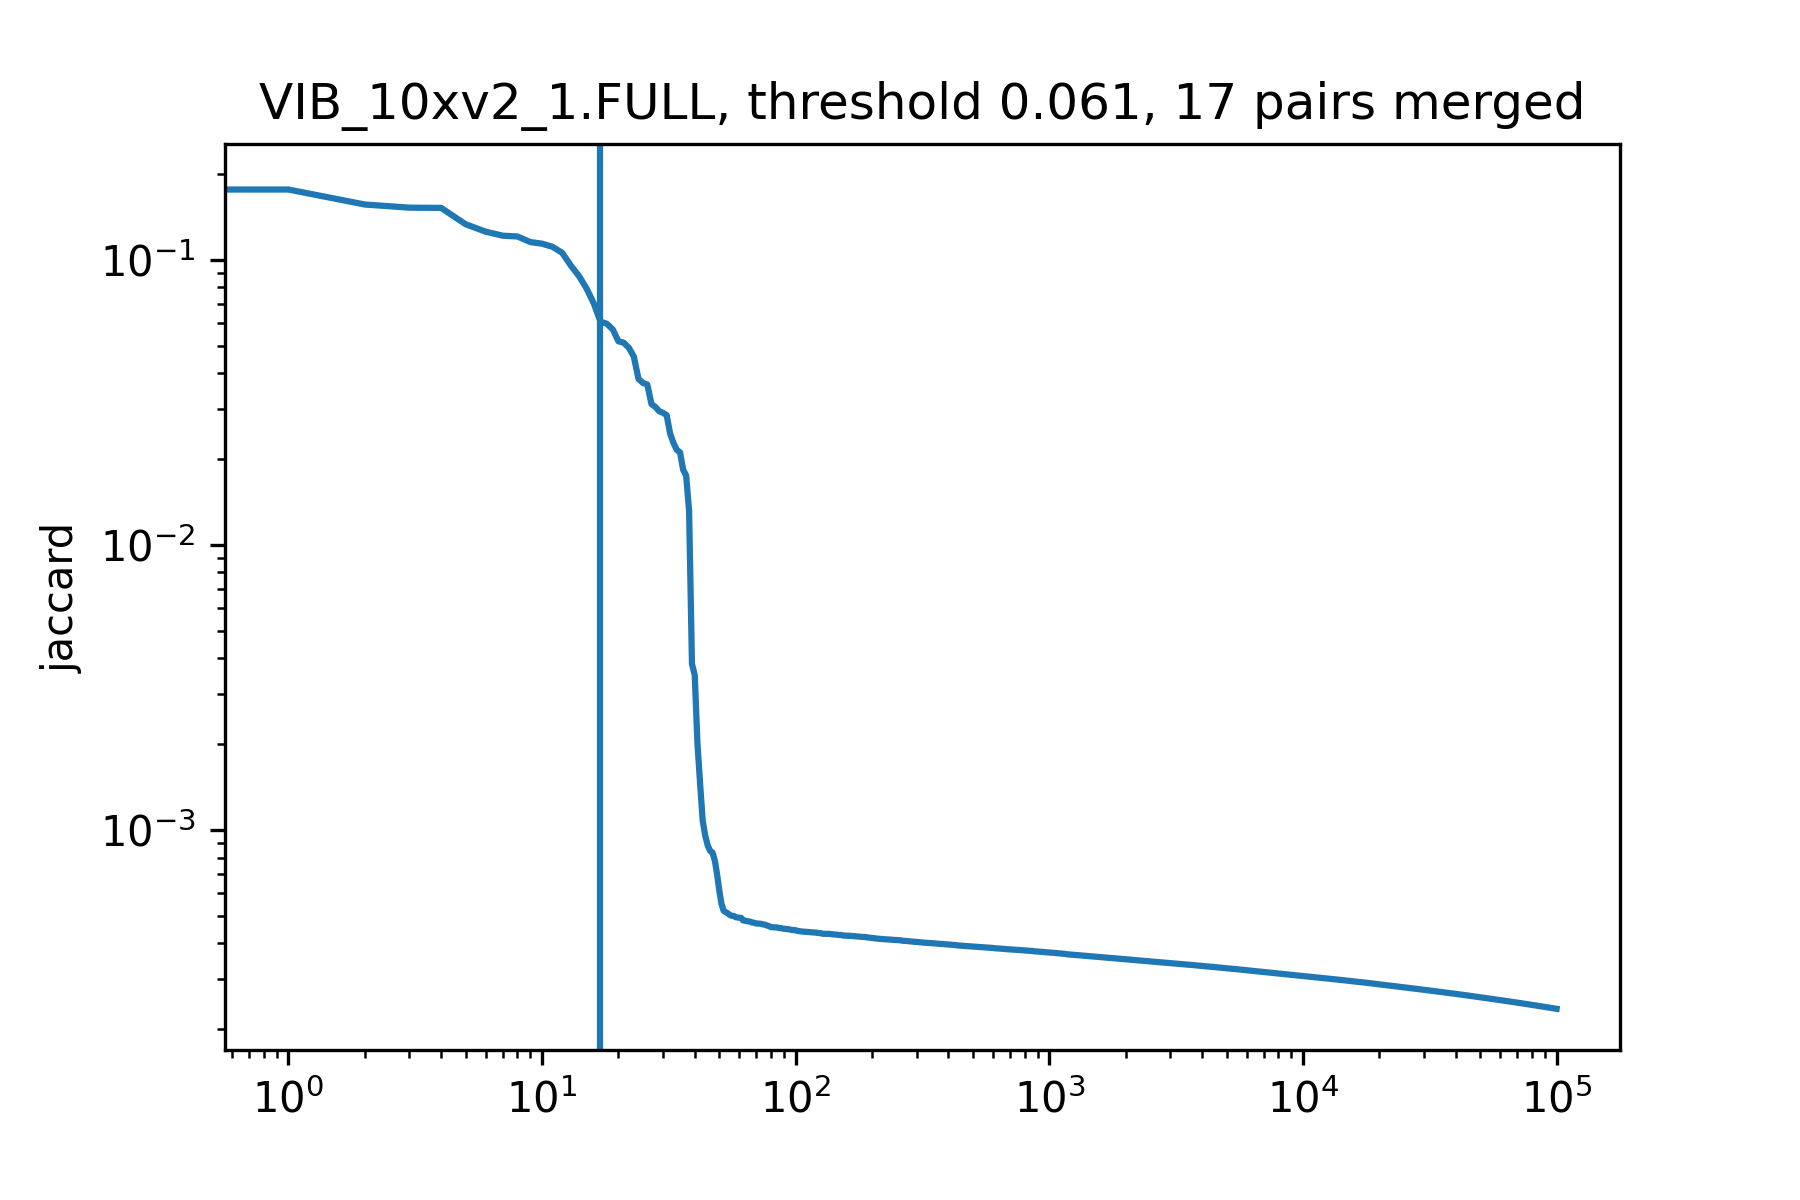

VIB_10xv2_2.FULL
plts_scratch/VIB_10xv2_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


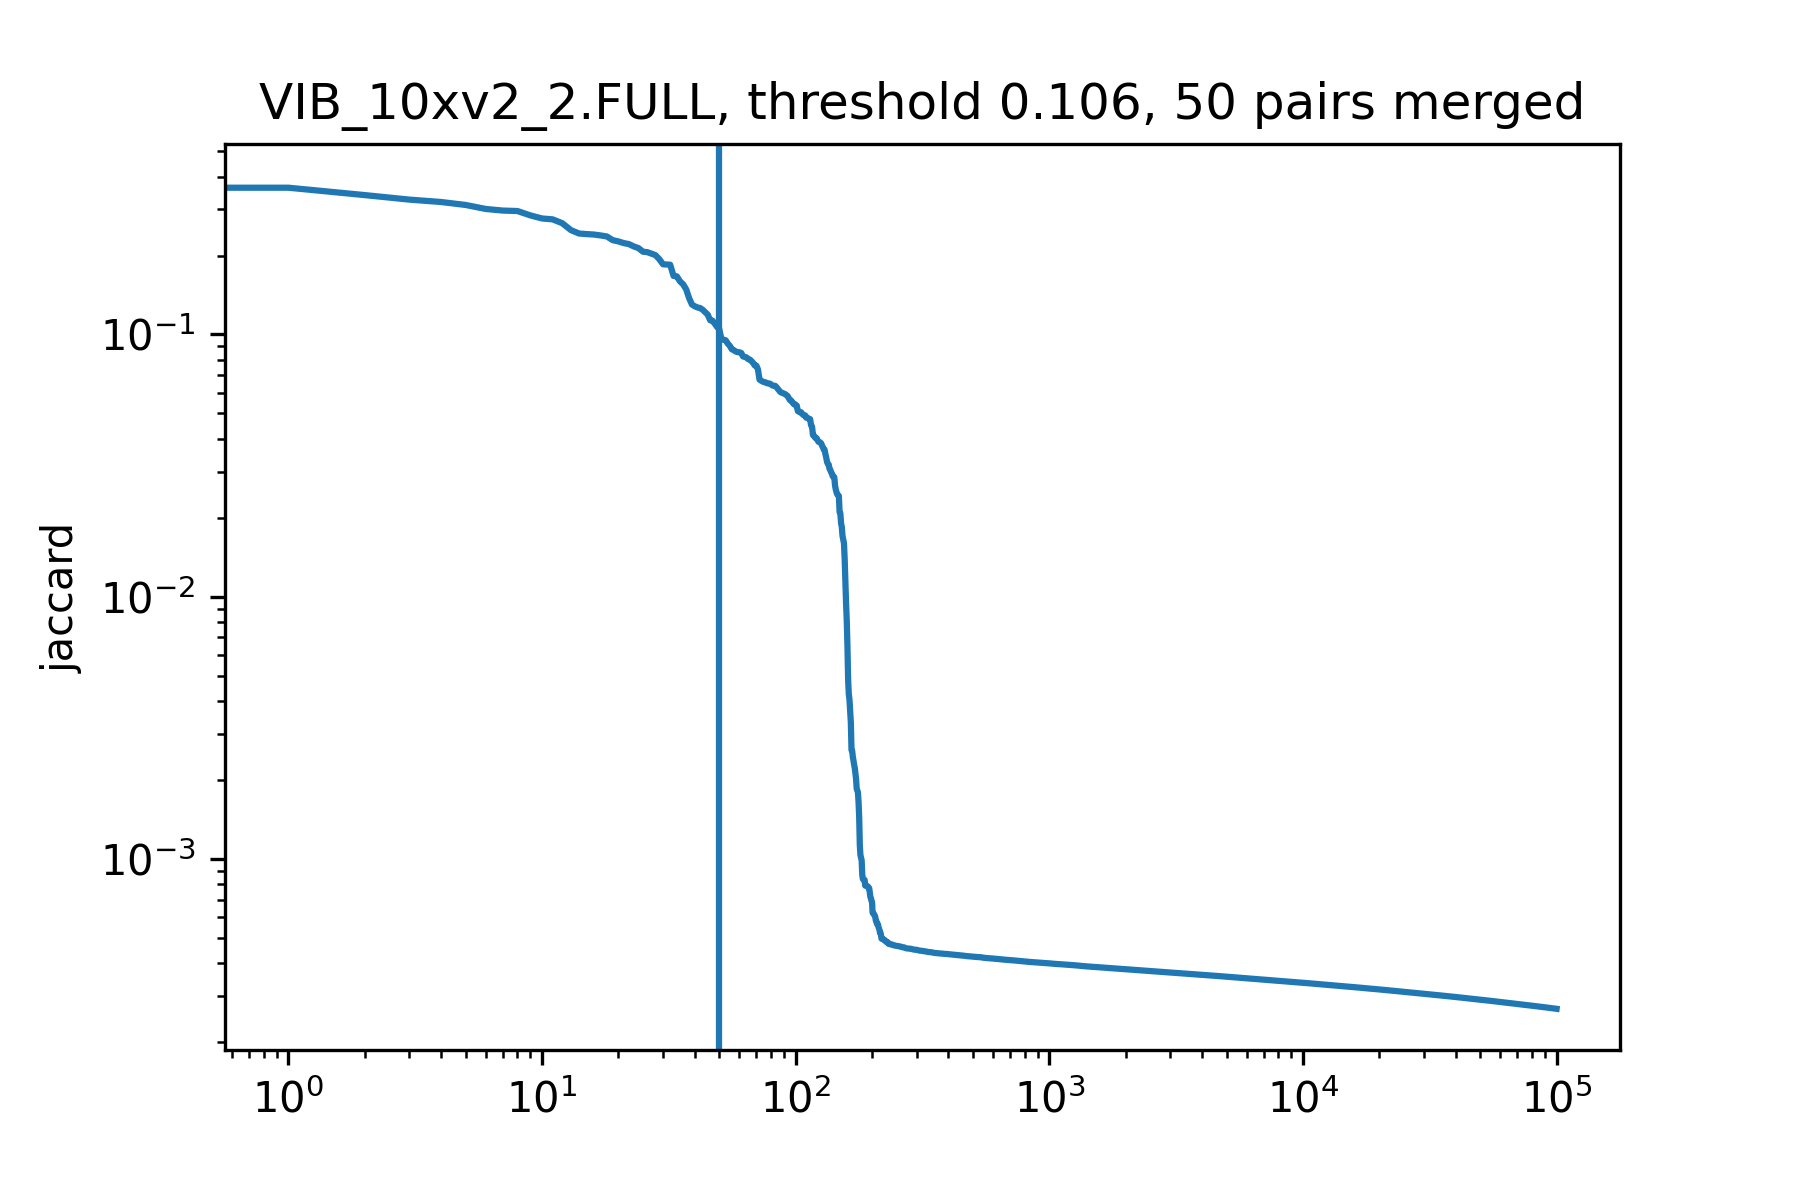

VIB_hydrop_11.FULL
plts_scratch/VIB_hydrop_11.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


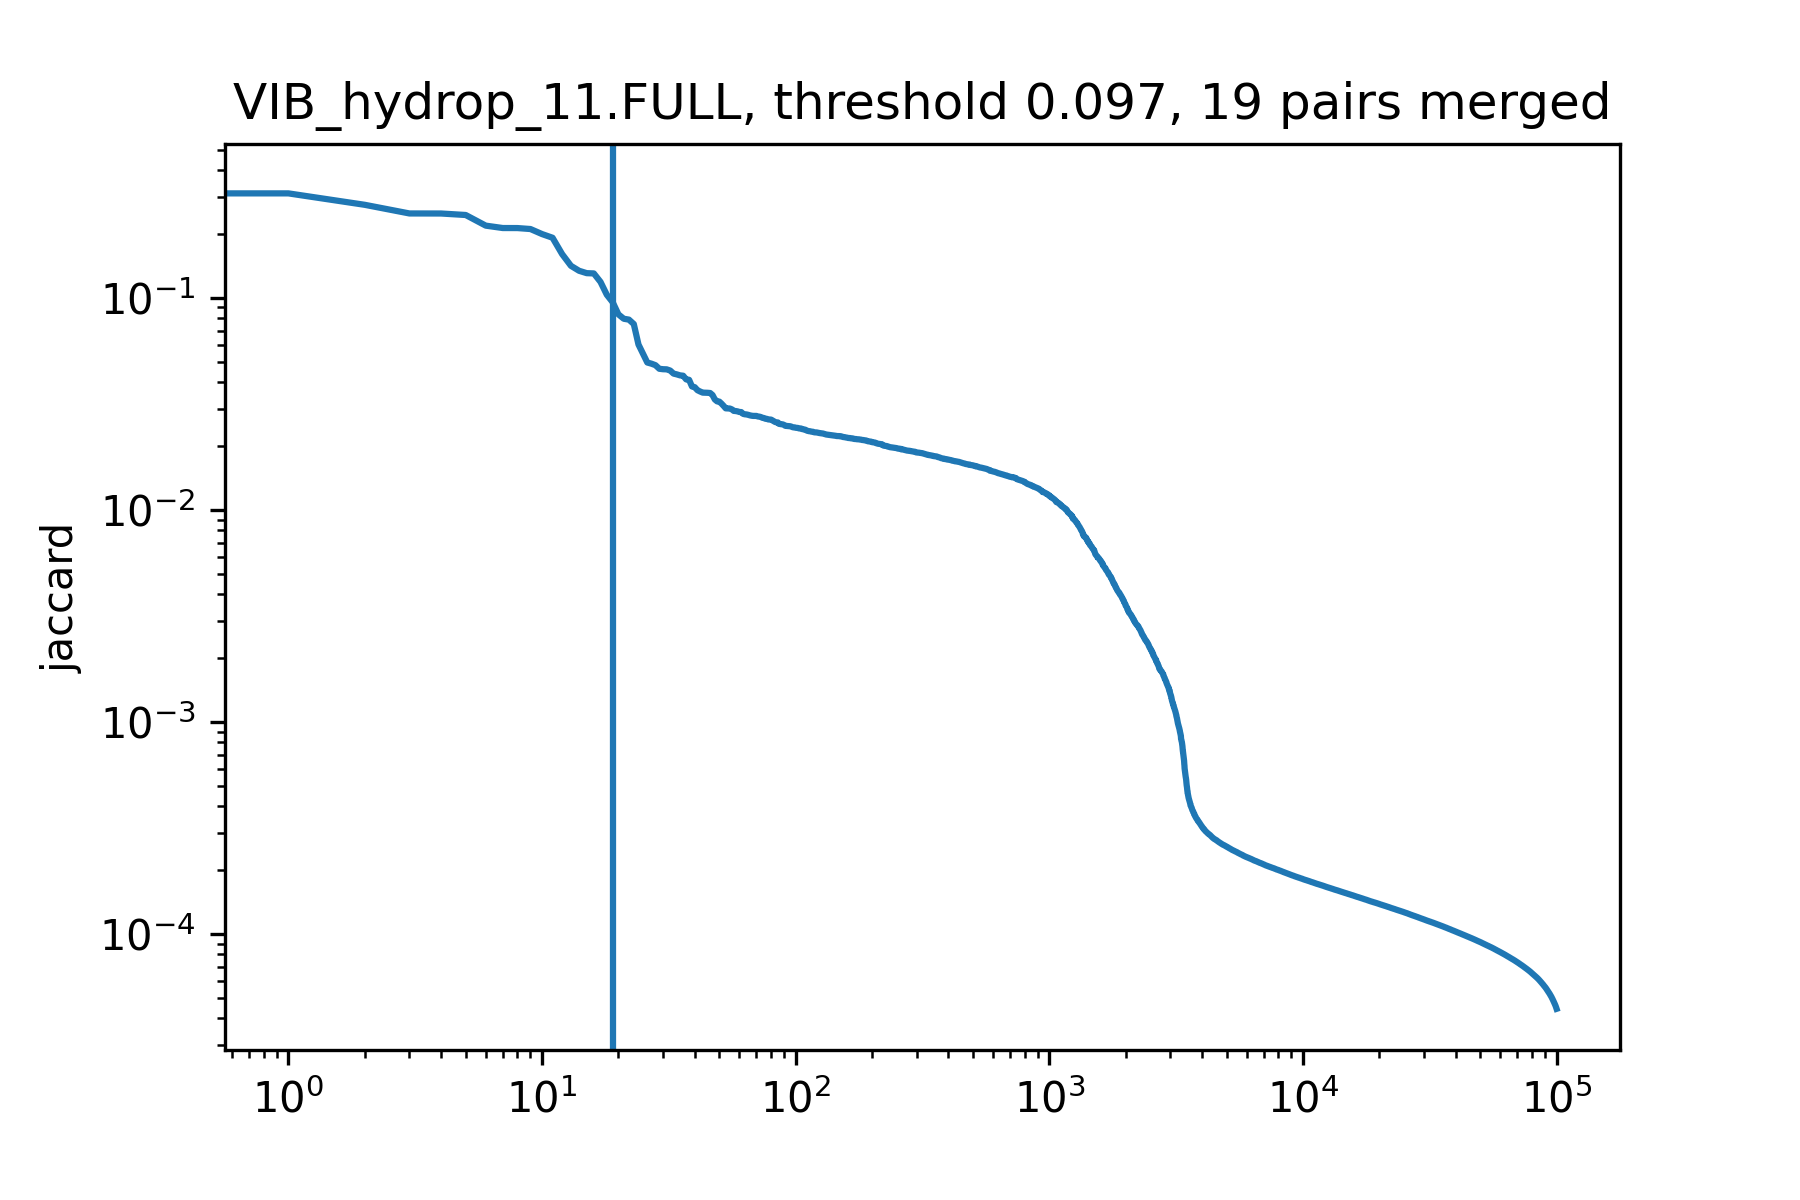

VIB_hydrop_12.FULL
plts_scratch/VIB_hydrop_12.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


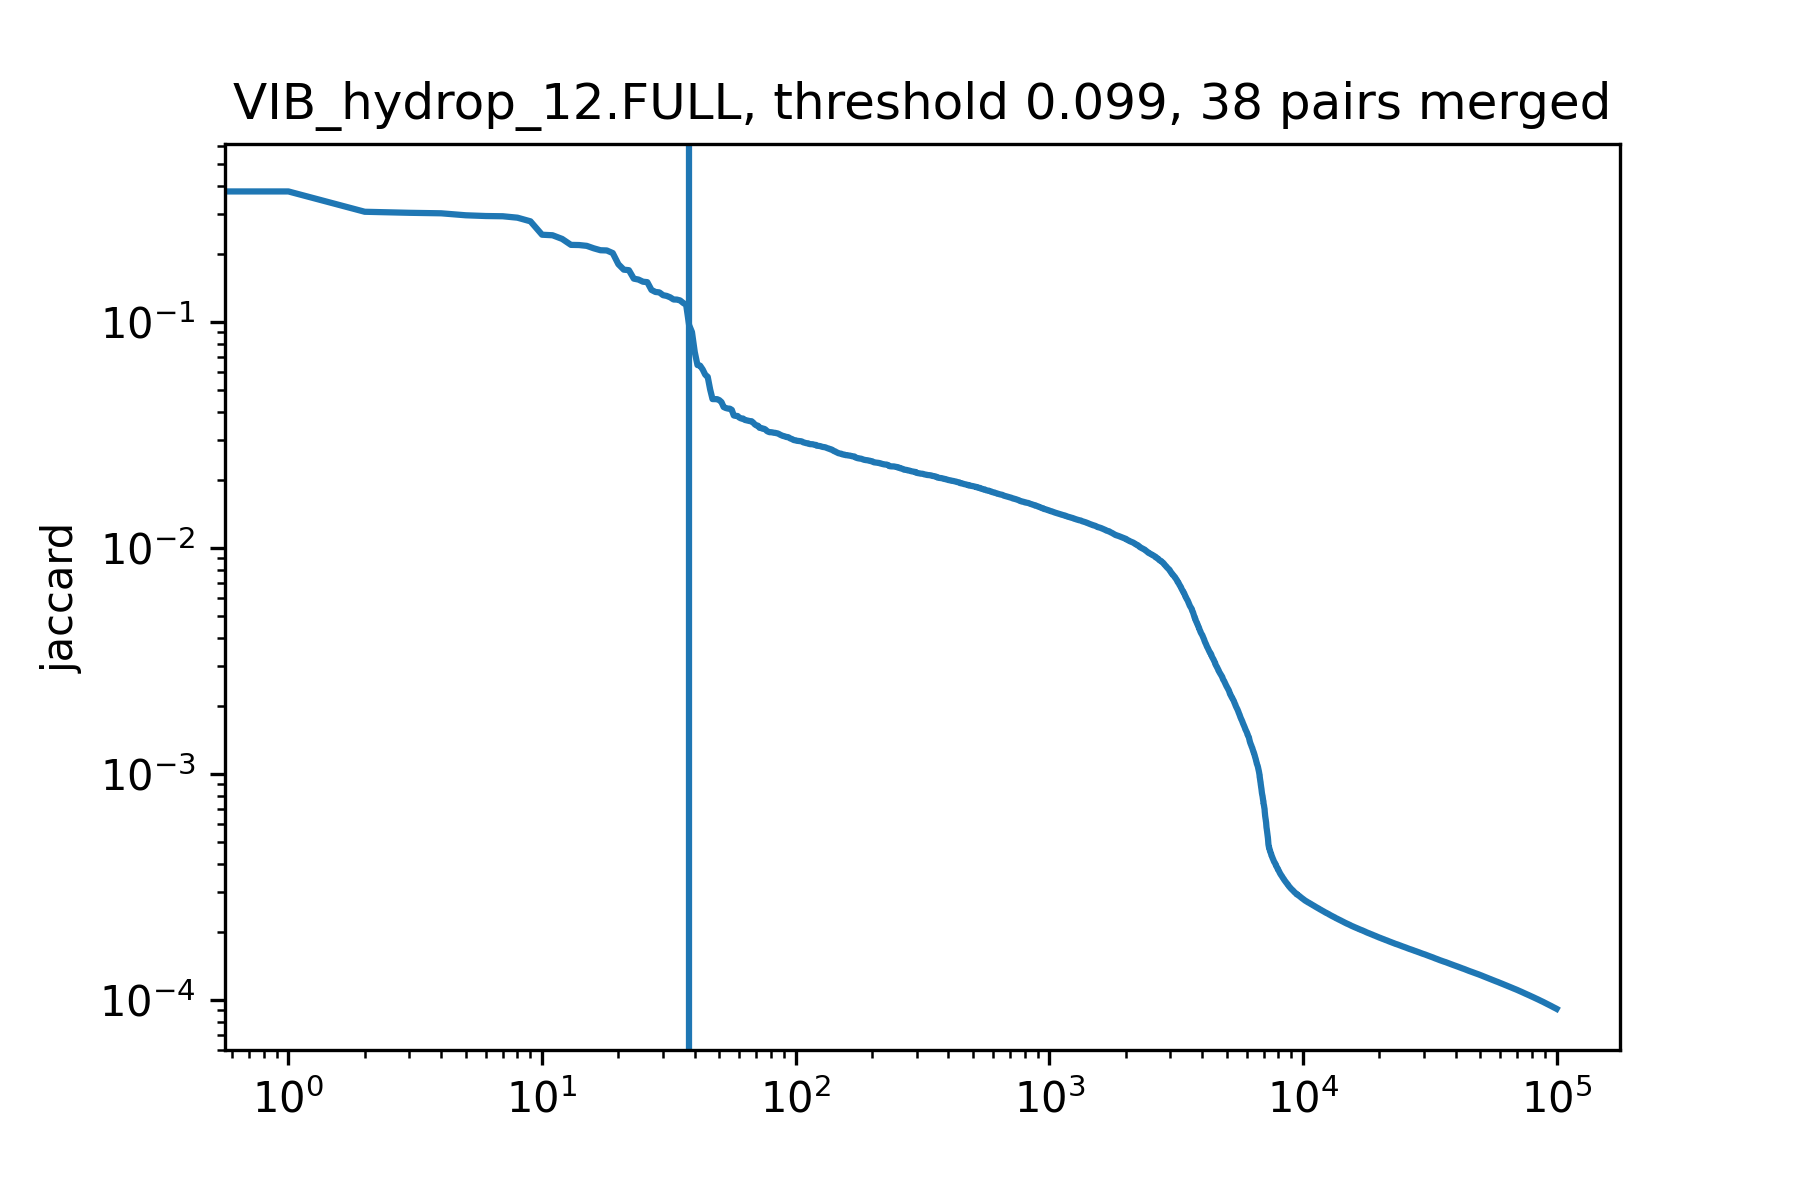

VIB_hydrop_21.FULL
plts_scratch/VIB_hydrop_21.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


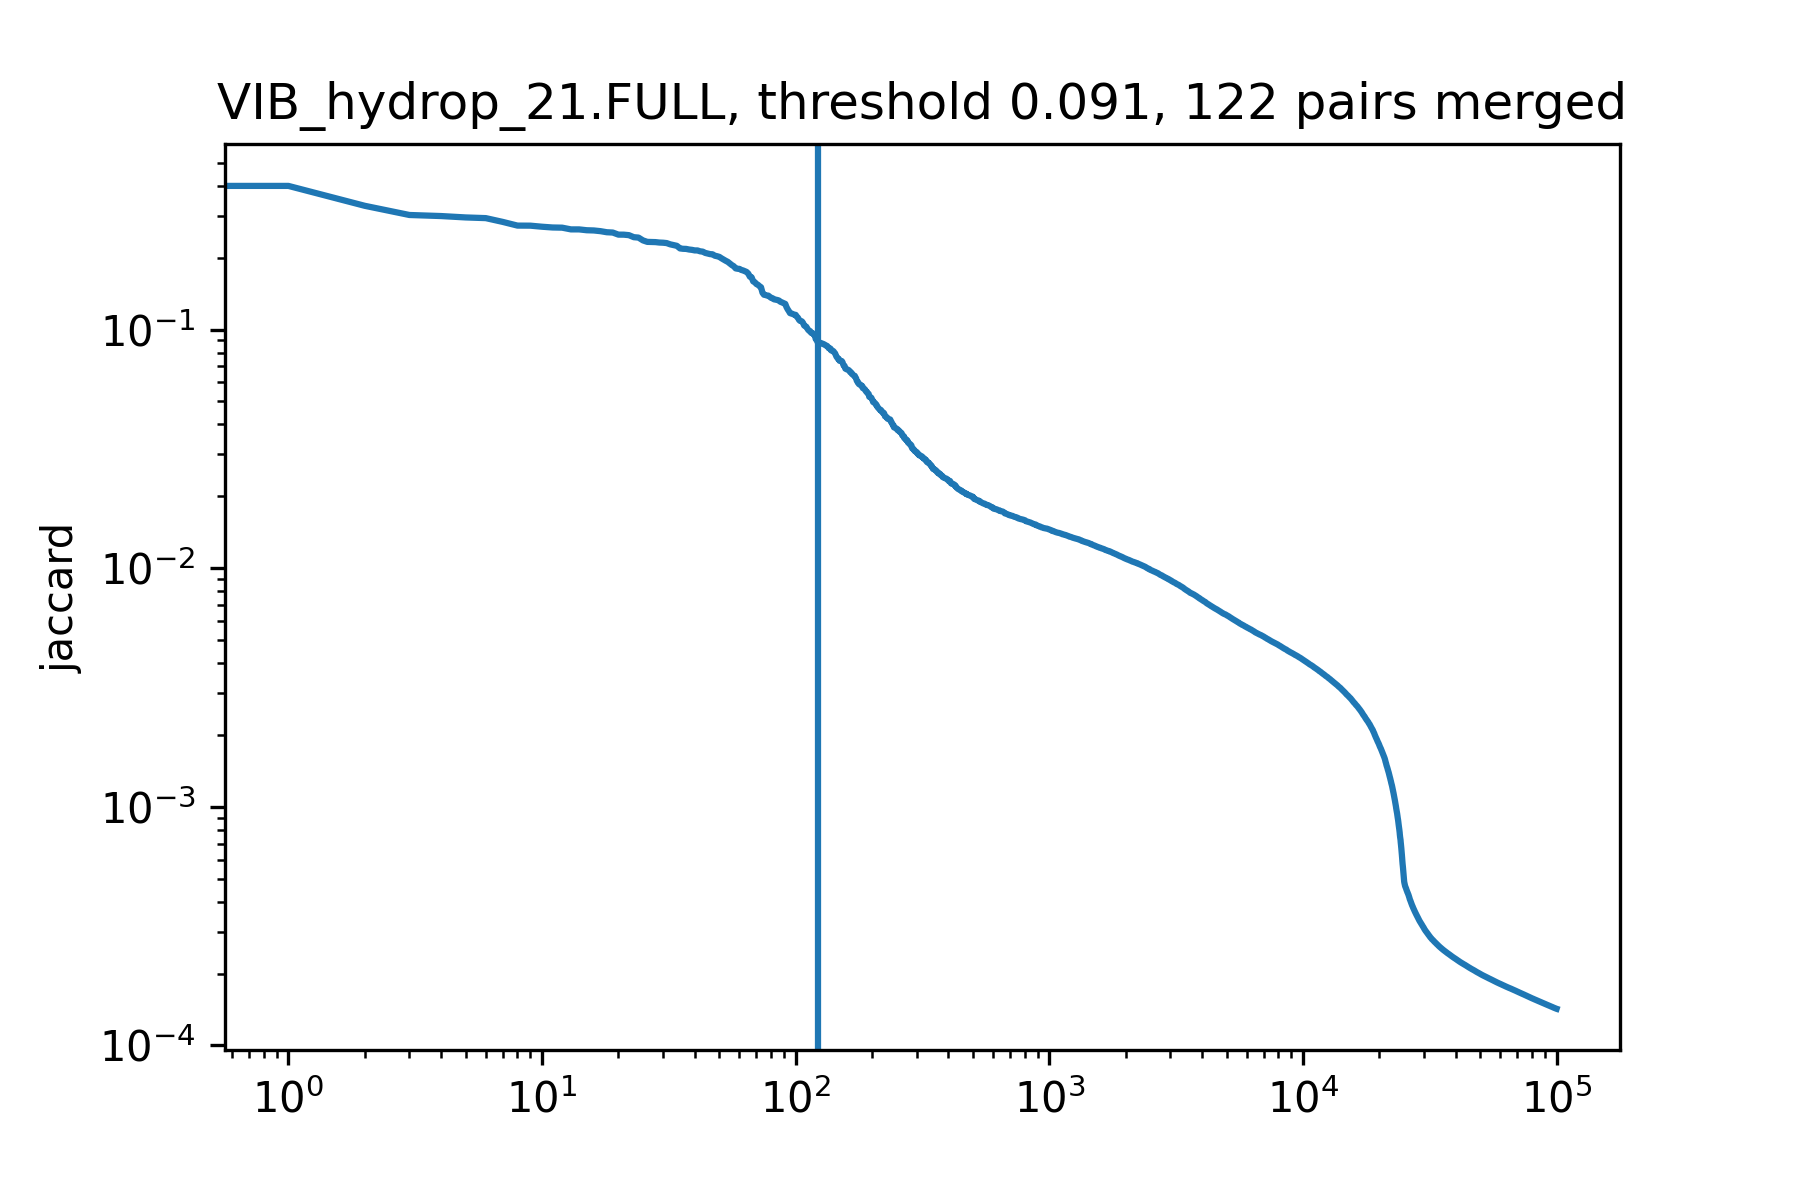

VIB_hydrop_22.FULL
plts_scratch/VIB_hydrop_22.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


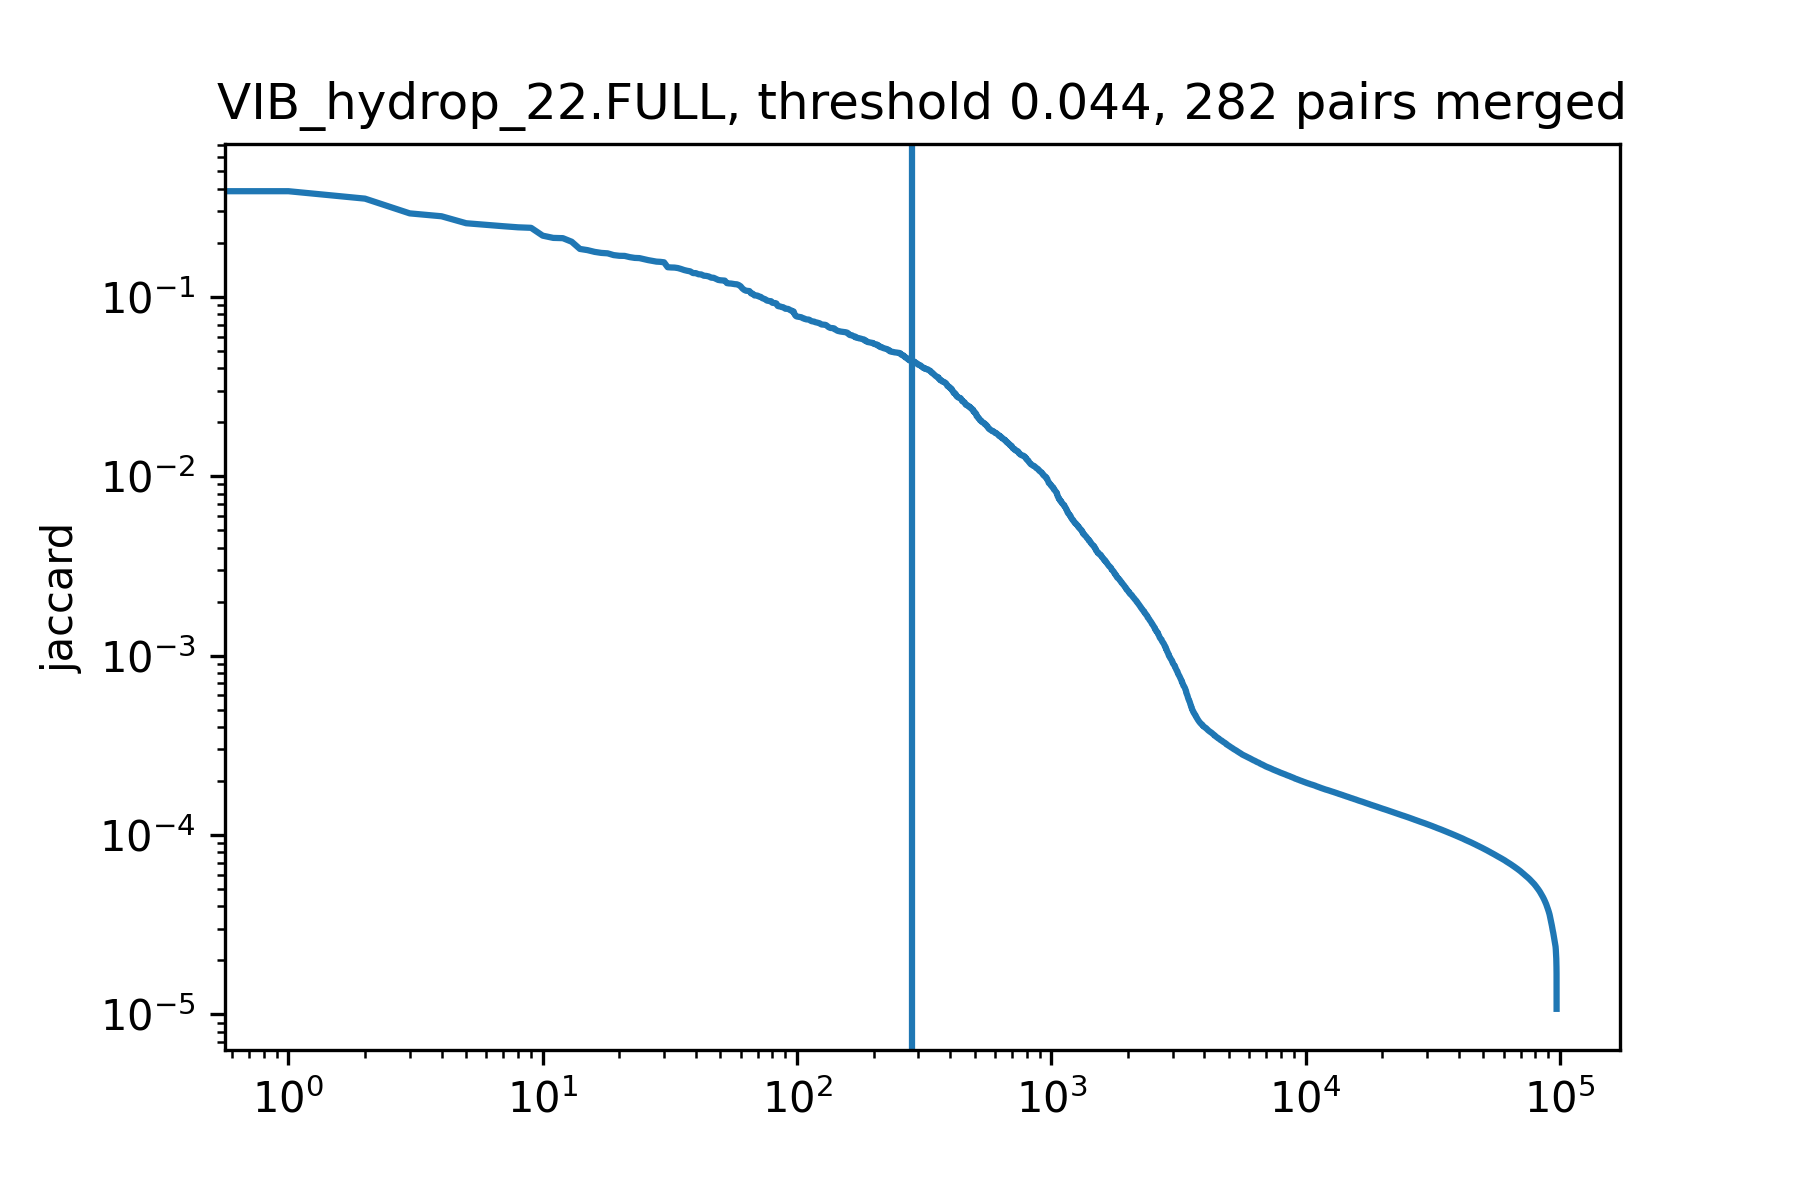

VIB_mtscatac_1.FULL
plts_scratch/VIB_mtscatac_1.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


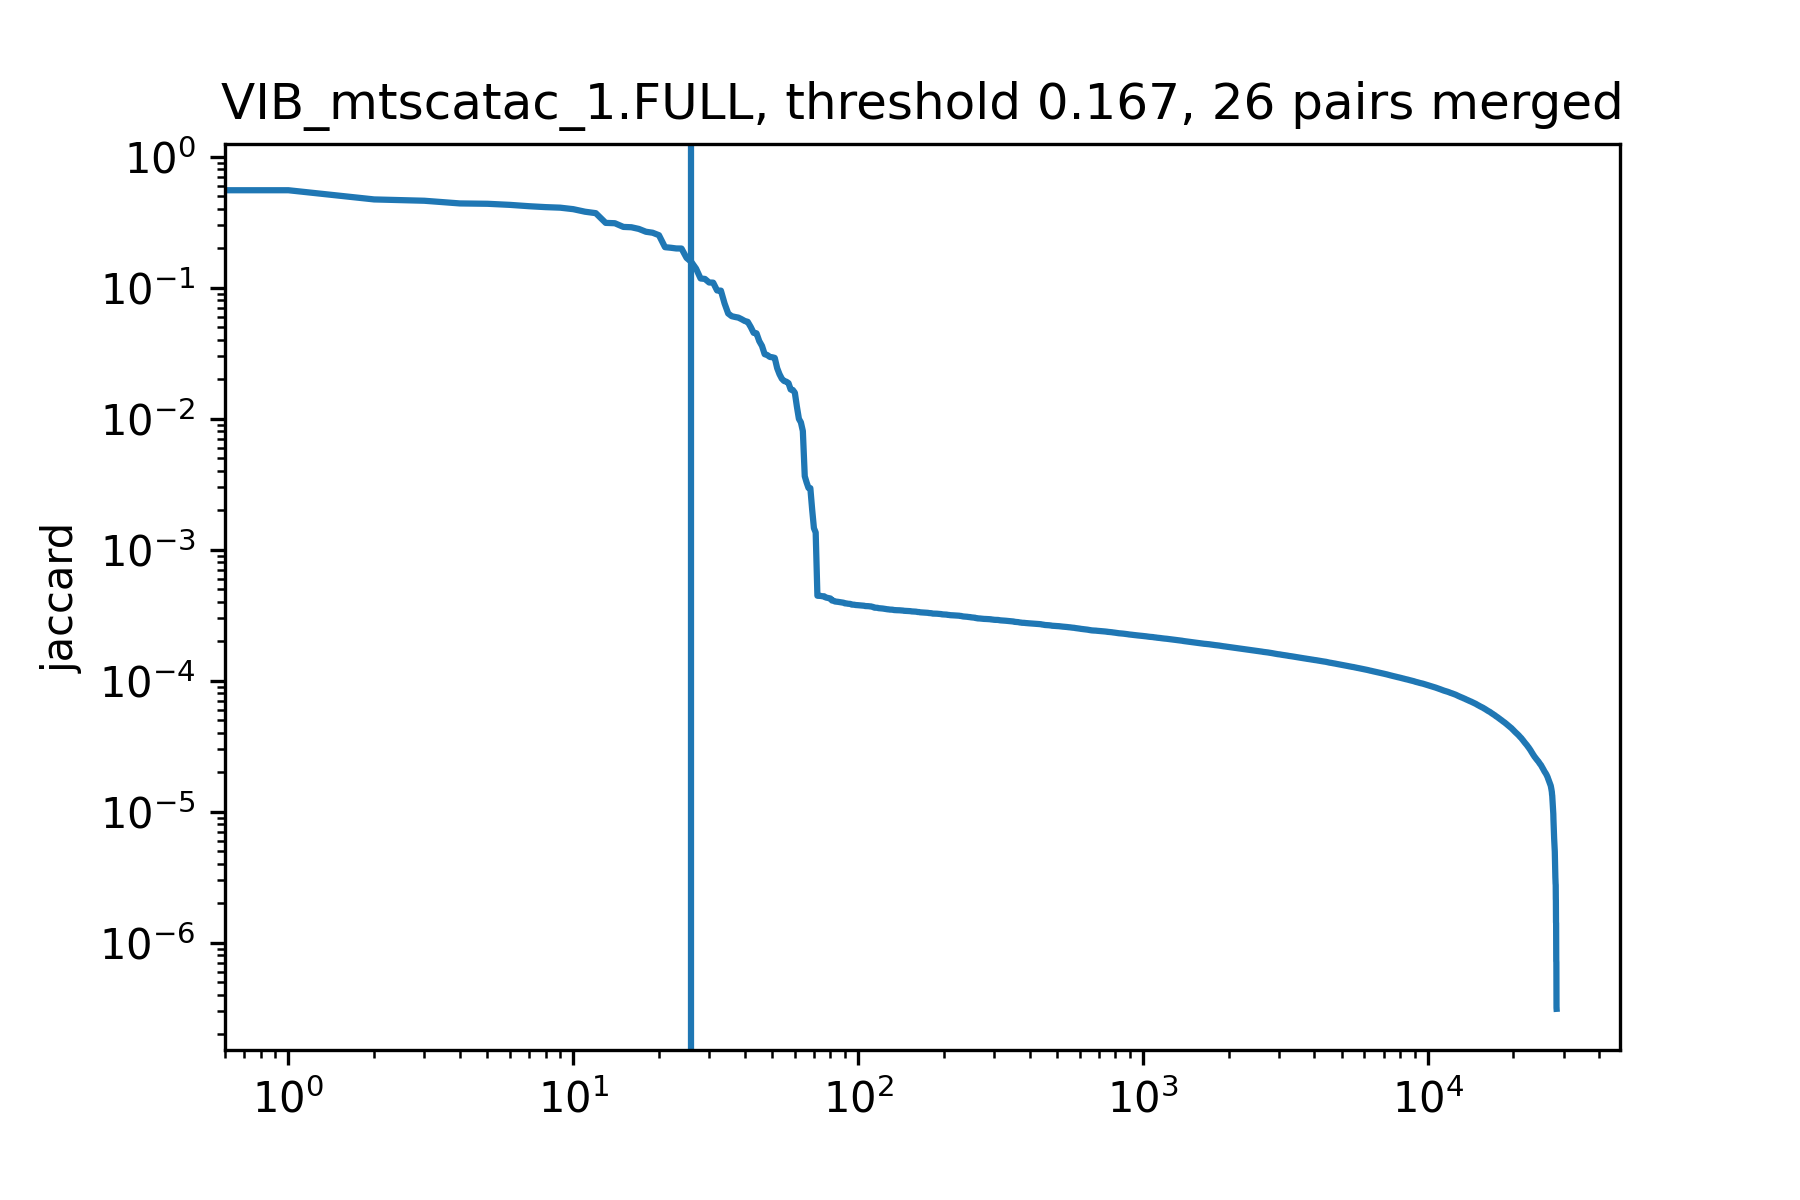

VIB_mtscatac_2.FULL
plts_scratch/VIB_mtscatac_2.FULL.barcard_jaccard_kneeplot.png exists, printing img and skipping


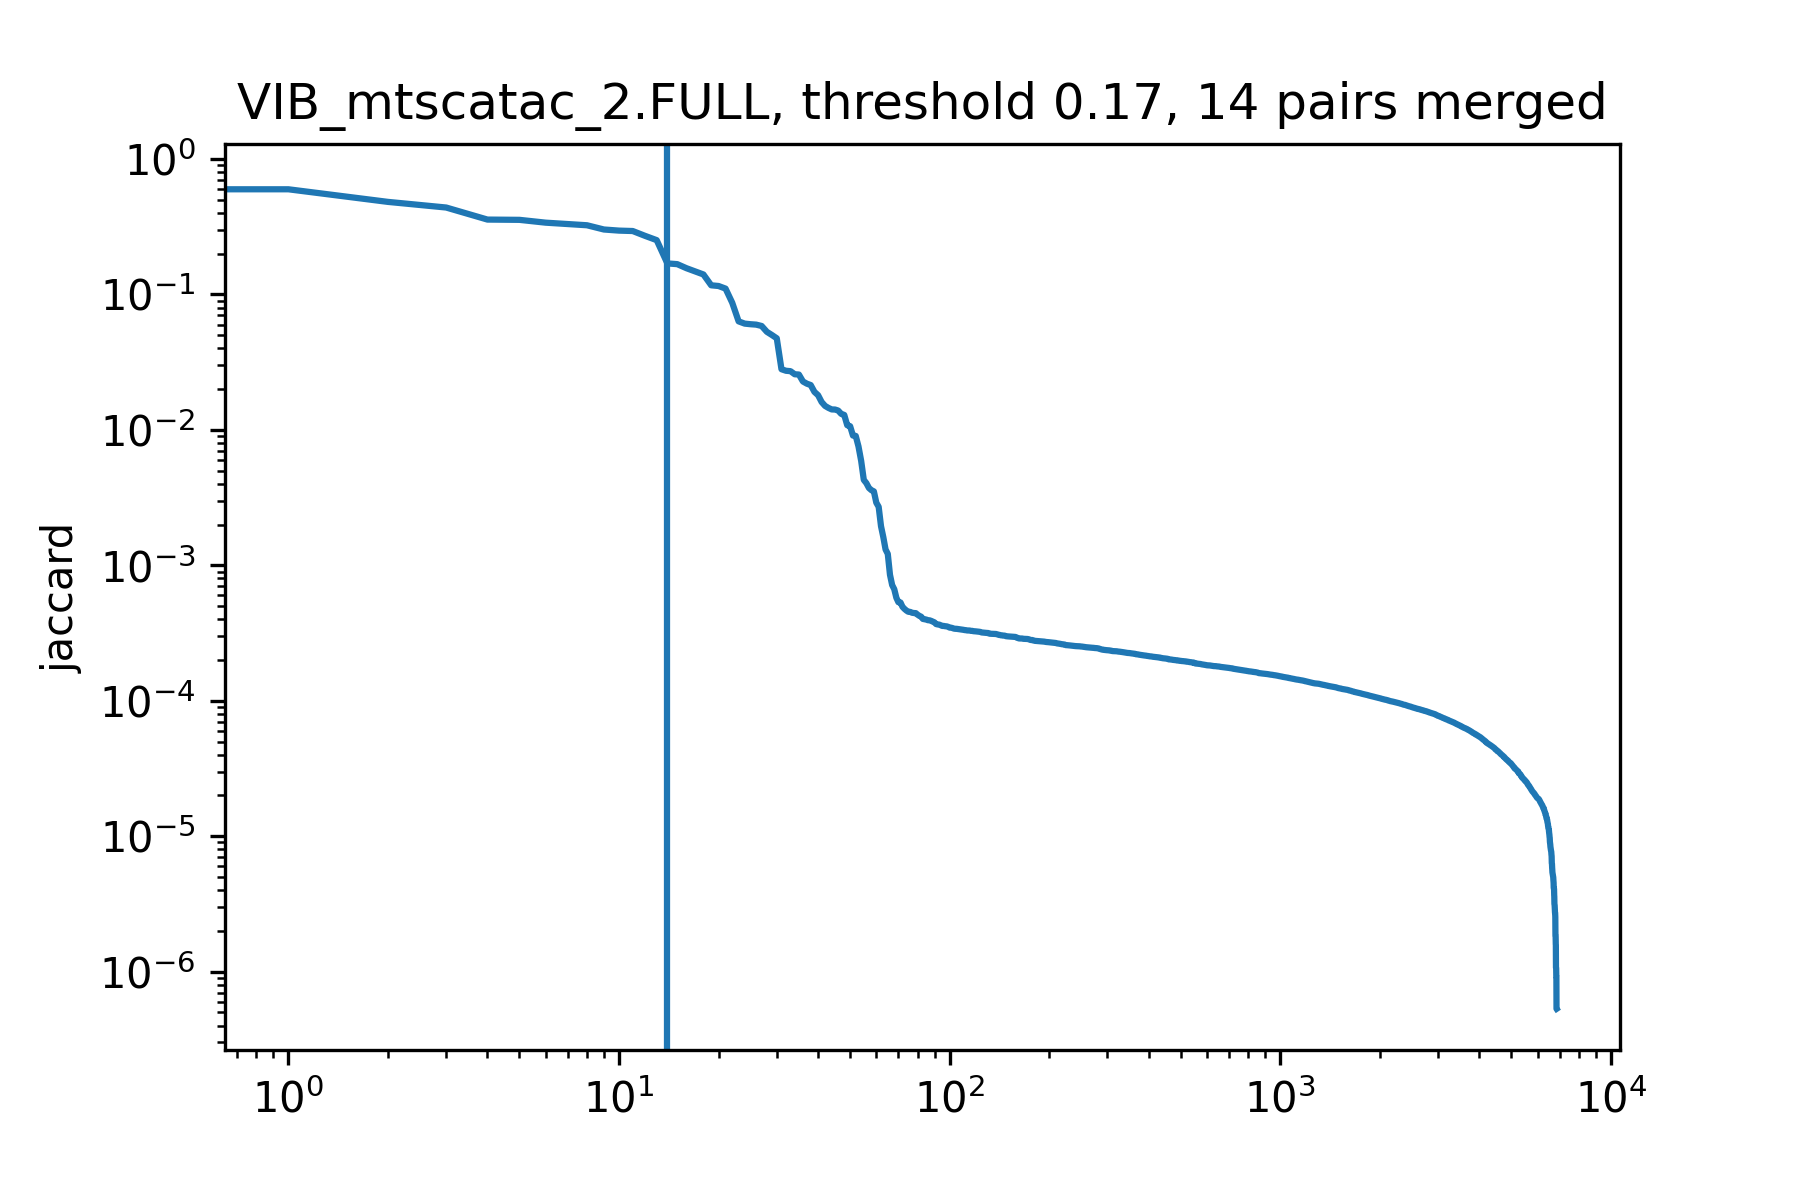

In [3]:
threshold_dict = {}
threshold_rank_dict = {}
threshold_min = 0.03
for file in sorted(
    glob.glob("full_preprocessing_out/data/reports/barcard/*barcard.overlap.tsv")
):
    sample = file.split("/")[-1].split(".barcard.overlap.tsv")[0]
    print(sample)
    plot_path = f"plts_scratch/{sample}.barcard_jaccard_kneeplot.png"

    if not os.path.exists(plot_path):
        df = pd.read_csv(file, header=0, sep="\t")

        df = df.sort_values(by="jaccard", ascending=False)[:100000]
        df.reset_index(inplace=True, drop=True)

        threshold = threshold_otsu(df["jaccard"])
        if threshold < threshold_min:
            threshold = threshold_min
        threshold_dict[sample] = threshold
        threshold_rank = sum(df["jaccard"] > threshold)
        threshold_rank_dict[sample] = threshold_rank
        print(f"\tthreshold: {threshold}")
        print(f"\tnpairs_merged: {threshold_rank}")

        f, ax = plt.subplots(1, 1)
        sns.lineplot(data=df, x=range(len(df)), y="jaccard", ax=ax)
        # ax.axhline(y=threshold, xmin=0, xmax=10000000)
        ax.axvline(x=threshold_rank, ymin=0.0001, ymax=1)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(sample)
        ax.set_title(
            f"{sample}, threshold {round(threshold, 3)}, {threshold_rank} pairs merged"
        )
        # plt.savefig(
        #     plot_path,
        #     dpi=300,
        #     facecolor="white",
        # )
        # df.iloc[:threshold_rank].to_csv(
        #     f"full_preprocessing_out/data/reports/barcard/{sample}.tomerge.tsv",
        #     sep="\t",
        #     index=False,
        # )
        plt.show()
        plt.close()

    else:
        print(f"{plot_path} exists, printing img and skipping")
        display(Image(plot_path))

All seems good. There are some samples where arguably the knee is below 3%, but the number of affected barcode pairs is low, and reducing the global minimum below 3% will introduce artifacts in other samples, so I will keep the global minimum at 3%.

# Make combined plot

In [24]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

sample_id_short_alias_dict = {
    "BIO_ddseq_1.FULL": "ddSEQ Bi1",
    "BIO_ddseq_2.FULL": "ddSEQ Bi2",
    "BIO_ddseq_3.FULL": "ddSEQ Bi3",
    "BIO_ddseq_4.FULL": "ddSEQ Bi4",
    "BRO_mtscatac_1.FULL": "mtscATAC Br1",
    "BRO_mtscatac_2.FULL": "mtscATAC Br2",
    "CNA_10xmultiome_1.FULL": "MO C1",
    "CNA_10xmultiome_2.FULL": "MO C2",
    "CNA_10xv11_1.FULL": "v1.1 C1",
    "CNA_10xv11_2.FULL": "v1.1 C2",
    "CNA_10xv11_3.FULL": "v1.1 C3",
    "CNA_10xv11_4.FULL": "v1.1 C4",
    "CNA_10xv11_5.FULL": "v1.1 C5",
    "CNA_10xv2_1.FULL": "v2 C1",
    "CNA_10xv2_2.FULL": "v2 C2",
    "CNA_hydrop_1.FULL": "HyDrop C1",
    "CNA_hydrop_2.FULL": "HyDrop C2",
    "CNA_hydrop_3.FULL": "HyDrop C3",
    "CNA_mtscatac_1.FULL": "mtscATAC C1",
    "CNA_mtscatac_2.FULL": "mtscATAC C2",
    "EPF_hydrop_1.FULL": "HyDrop E1",
    "EPF_hydrop_2.FULL": "HyDrop E2",
    "EPF_hydrop_3.FULL": "HyDrop E3",
    "EPF_hydrop_4.FULL": "HyDrop E4",
    "HAR_ddseq_1.FULL": "ddSEQ H1",
    "HAR_ddseq_2.FULL": "ddSEQ H2",
    "MDC_mtscatac_1.FULL": "mtscATAC M1",
    "MDC_mtscatac_2.FULL": "mtscATAC M2",
    "OHS_s3atac_1.FULL": "s3 O1",
    "OHS_s3atac_2.FULL": "s3 O2",
    "SAN_10xmultiome_1.FULL": "MO Sa1",
    "SAN_10xmultiome_2.FULL": "MO Sa2",
    "STA_10xv11_1.FULL": "v1.1 St1",
    "STA_10xv11_2.FULL": "v1.1 St2",
    "TXG_10xv11_1.FULL": "v1.1 T1",
    "TXG_10xv2_1.FULL": "v2 T1",
    "TXG_10xv2_2.FULL": "v2 T2",
    "UCS_ddseq_1.FULL": "ddSEQ U1",
    "UCS_ddseq_2.FULL": "ddSEQ U2",
    "VIB_10xmultiome_1.FULL": "MO V1",
    "VIB_10xmultiome_2.FULL": "MO V2",
    "VIB_10xv1_1.FULL": "v1 V1",
    "VIB_10xv1_2.FULL": "v1 V2",
    "VIB_10xv2_1.FULL": "v2 V1",
    "VIB_10xv2_2.FULL": "v2 V2",
    "VIB_hydrop_1.FULL": "HyDrop V1",
    "VIB_hydrop_2.FULL": "HyDrop V2",
    "VIB_hydrop_11.FULL": "HyDrop V1",
    "VIB_hydrop_12.FULL": "HyDrop V1",
    "VIB_hydrop_21.FULL": "HyDrop V2",
    "VIB_hydrop_22.FULL": "HyDrop V2",
}

In [58]:
path_dict = {}
for tech in tech_order:
    path_dict[tech] = sorted(
        glob.glob(
            f"full_preprocessing_out/data/reports/barcard/*{tech}*barcard.overlap.top100000.tsv"
        )
    )
path_dict = {
    "10xv1": [
        "full_preprocessing_out/data/reports/barcard/VIB_10xv1_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/VIB_10xv1_1.FULL.barcard.overlap.top100000.tsv",
    ],
    "10xv11": [
        "full_preprocessing_out/data/reports/barcard/CNA_10xv11_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xv11_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xv11_3.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xv11_4.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xv11_5.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/STA_10xv11_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/STA_10xv11_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/TXG_10xv11_1.FULL.barcard.overlap.top100000.tsv",
    ],
    "10xv2": [
        "full_preprocessing_out/data/reports/barcard/CNA_10xv2_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xv2_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/TXG_10xv2_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/TXG_10xv2_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/VIB_10xv2_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/VIB_10xv2_2.FULL.barcard.overlap.top100000.tsv",
    ],
    "10xmultiome": [
        "full_preprocessing_out/data/reports/barcard/CNA_10xmultiome_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_10xmultiome_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/SAN_10xmultiome_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/SAN_10xmultiome_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/VIB_10xmultiome_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/VIB_10xmultiome_2.FULL.barcard.overlap.top100000.tsv",
    ],
    "mtscatac": [
        "full_preprocessing_out/data/reports/barcard/BRO_mtscatac_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/BRO_mtscatac_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_mtscatac_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_mtscatac_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/MDC_mtscatac_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/MDC_mtscatac_2.FULL.barcard.overlap.top100000.tsv",
    ],
    "ddseq": [
        "full_preprocessing_out/data/reports/barcard/BIO_ddseq_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/BIO_ddseq_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/BIO_ddseq_3.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/BIO_ddseq_4.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/HAR_ddseq_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/HAR_ddseq_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/UCS_ddseq_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/UCS_ddseq_2.FULL.barcard.overlap.top100000.tsv",
    ],
    "s3atac": [
        "full_preprocessing_out/data/reports/barcard/OHS_s3atac_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/OHS_s3atac_2.FULL.barcard.overlap.top100000.tsv",
    ],
    "hydrop": [
        "full_preprocessing_out/data/reports/barcard/CNA_hydrop_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_hydrop_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/CNA_hydrop_3.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/EPF_hydrop_1.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/EPF_hydrop_2.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/EPF_hydrop_3.FULL.barcard.overlap.top100000.tsv",
        "full_preprocessing_out/data/reports/barcard/EPF_hydrop_4.FULL.barcard.overlap.top100000.tsv",
    ],
}

VIB_10xv1_2.FULL
	threshold: 0.03
	npairs_merged: 279
VIB_10xv1_1.FULL
	threshold: 0.053135822724011614
	npairs_merged: 254
CNA_10xv11_1.FULL
	threshold: 0.11420603408105526
	npairs_merged: 47
CNA_10xv11_2.FULL
	threshold: 0.12176841077604247
	npairs_merged: 182
CNA_10xv11_3.FULL
	threshold: 0.04344130160888671
	npairs_merged: 185
CNA_10xv11_4.FULL
	threshold: 0.11399699275169053
	npairs_merged: 44
CNA_10xv11_5.FULL
	threshold: 0.10019522374460132
	npairs_merged: 50
STA_10xv11_1.FULL
	threshold: 0.07645102883337801
	npairs_merged: 149
STA_10xv11_2.FULL
	threshold: 0.03
	npairs_merged: 131
TXG_10xv11_1.FULL
	threshold: 0.042961038200956675
	npairs_merged: 416
CNA_10xv2_1.FULL
	threshold: 0.07044179775425577
	npairs_merged: 65
CNA_10xv2_2.FULL
	threshold: 0.12395583545857095
	npairs_merged: 91
TXG_10xv2_1.FULL
	threshold: 0.08517800820485541
	npairs_merged: 86
TXG_10xv2_2.FULL
	threshold: 0.0717428677343465
	npairs_merged: 82
VIB_10xv2_1.FULL
	threshold: 0.06134294606073233
	npairs_merge

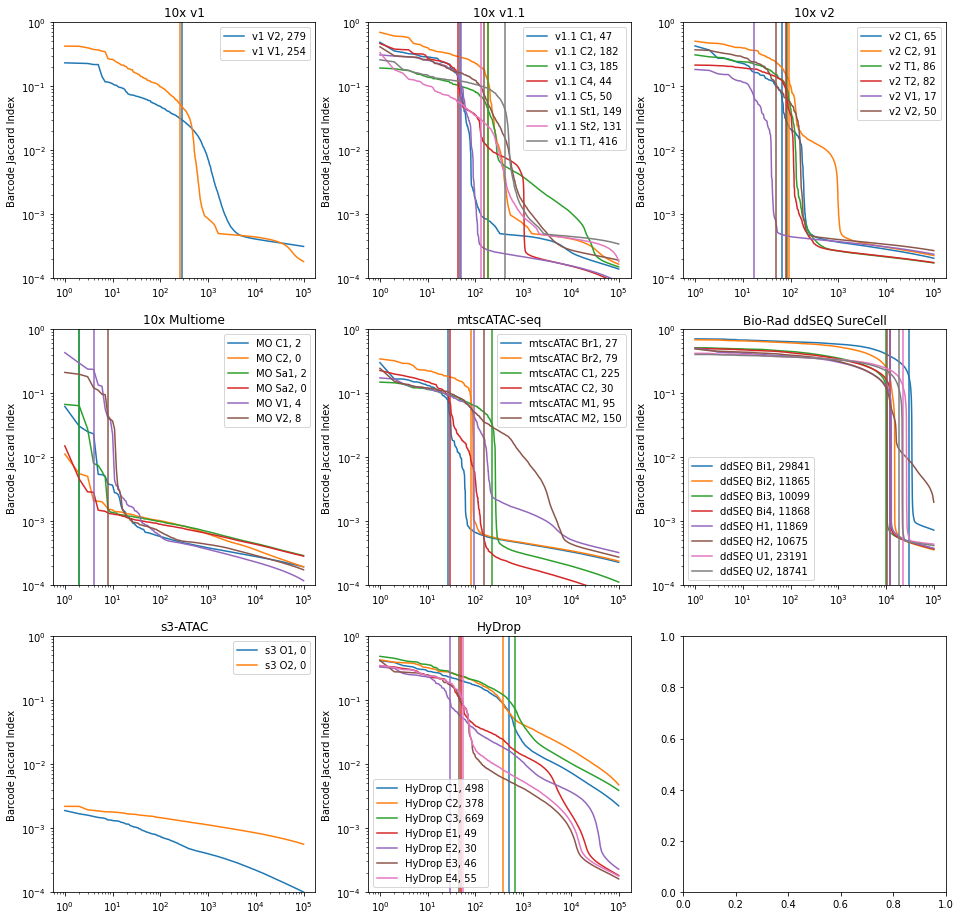

In [61]:
threshold_dict = {}
threshold_rank_dict = {}
threshold_min = 0.03

df_thresholds = pd.DataFrame()
# library
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 3, figsize=(16, 16))  # , sharex=True, sharey=True)

for tech in tech_order:
    # for tech in ["ddseq"]:
    ax = axes.flatten()[list(tech_order).index(tech)]
    colors = sns.color_palette(
        "husl",
        len(
            glob.glob(
                f"full_preprocessing_out/data/reports/barcard/*{tech}*barcard.overlap.top100000.tsv"
            )
        ),
    )
    df_merged = pd.DataFrame()
    palette = {}
    for idx, sample in enumerate(
        [
            x.split("/")[-1].split(".barcard.overlap.top100000.tsv")[0]
            for x in path_dict[tech]
        ]
    ):
        palette[sample] = sns.color_palette("tab10")[idx]

    for idx, file in enumerate(path_dict[tech]):
        sample = file.split("/")[-1].split(".barcard.overlap.top100000.tsv")[0]
        print(sample)
        plot_path = f"plts_scratch/{sample}.barcard_jaccard_kneeplot.png"

        df = pd.read_csv(file, header=0, sep="\t")

        df = df.sort_values(by="jaccard", ascending=False)[:100000]
        df.reset_index(inplace=True, drop=True)

        threshold = threshold_otsu(df["jaccard"])
        if threshold < threshold_min:
            threshold = threshold_min

        threshold_dict[sample] = threshold
        threshold_rank = sum(df["jaccard"] > threshold)
        threshold_rank_dict[sample] = threshold_rank

        df_thresholds.at[sample, "threshold"] = threshold
        df_thresholds.at[sample, "threshold_rank"] = threshold_rank
        df["sample"] = f"{sample_id_short_alias_dict[sample]}, {threshold_rank}"
        df_merged = pd.concat([df_merged, df])
        palette[
            f"{sample_id_short_alias_dict[sample]}, {threshold_rank}"
        ] = sns.color_palette("tab10")[idx]

        print(f"\tthreshold: {threshold}")
        print(f"\tnpairs_merged: {threshold_rank}")
        ax.axvline(x=threshold_rank, ymin=0.0001, ymax=1, color=palette[sample])

        sns.lineplot(
            data=df, x="jaccard_rank", y="jaccard", hue="sample", ax=ax, palette=palette
        )
        # ax.axhline(y=threshold, xmin=0, xmax=10000000)

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim([0.0001, 1])
    ax.legend()
    ax.set_xlabel(None)
    ax.set_ylabel("Barcode Jaccard Index")

    ax.set_title(tech_alias_dict[tech])


plt.savefig("plts_scratch/otsu_filtering_barcard.png", dpi=600, facecolor="white")
plt.show()
plt.close()